Dataset shape: (336, 76)
Columns: ['PLAYER', 'team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe', 'pfr', 'year', 'pid', 'type', 'Rec Rank', 'ast/tov', 'rimmade', 'rimmade+rimmiss', 'midmade', 'midmade+midmiss', 'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+midmiss)', 'dunksmade', 'dunksmiss+dunksmade', 'dunksmade/(dunksmade+dunksmiss)', 'pick', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts', 'Unnamed: 64', 'Unnamed: 65', 'TEAM', 'AFFILIATION', 'YEAR', 'ROUND', 'ROUND.1', 'OVERALL', 'allstar_apps', 'Highest_WS', 'Highest_BPM', 'Overall PIE']


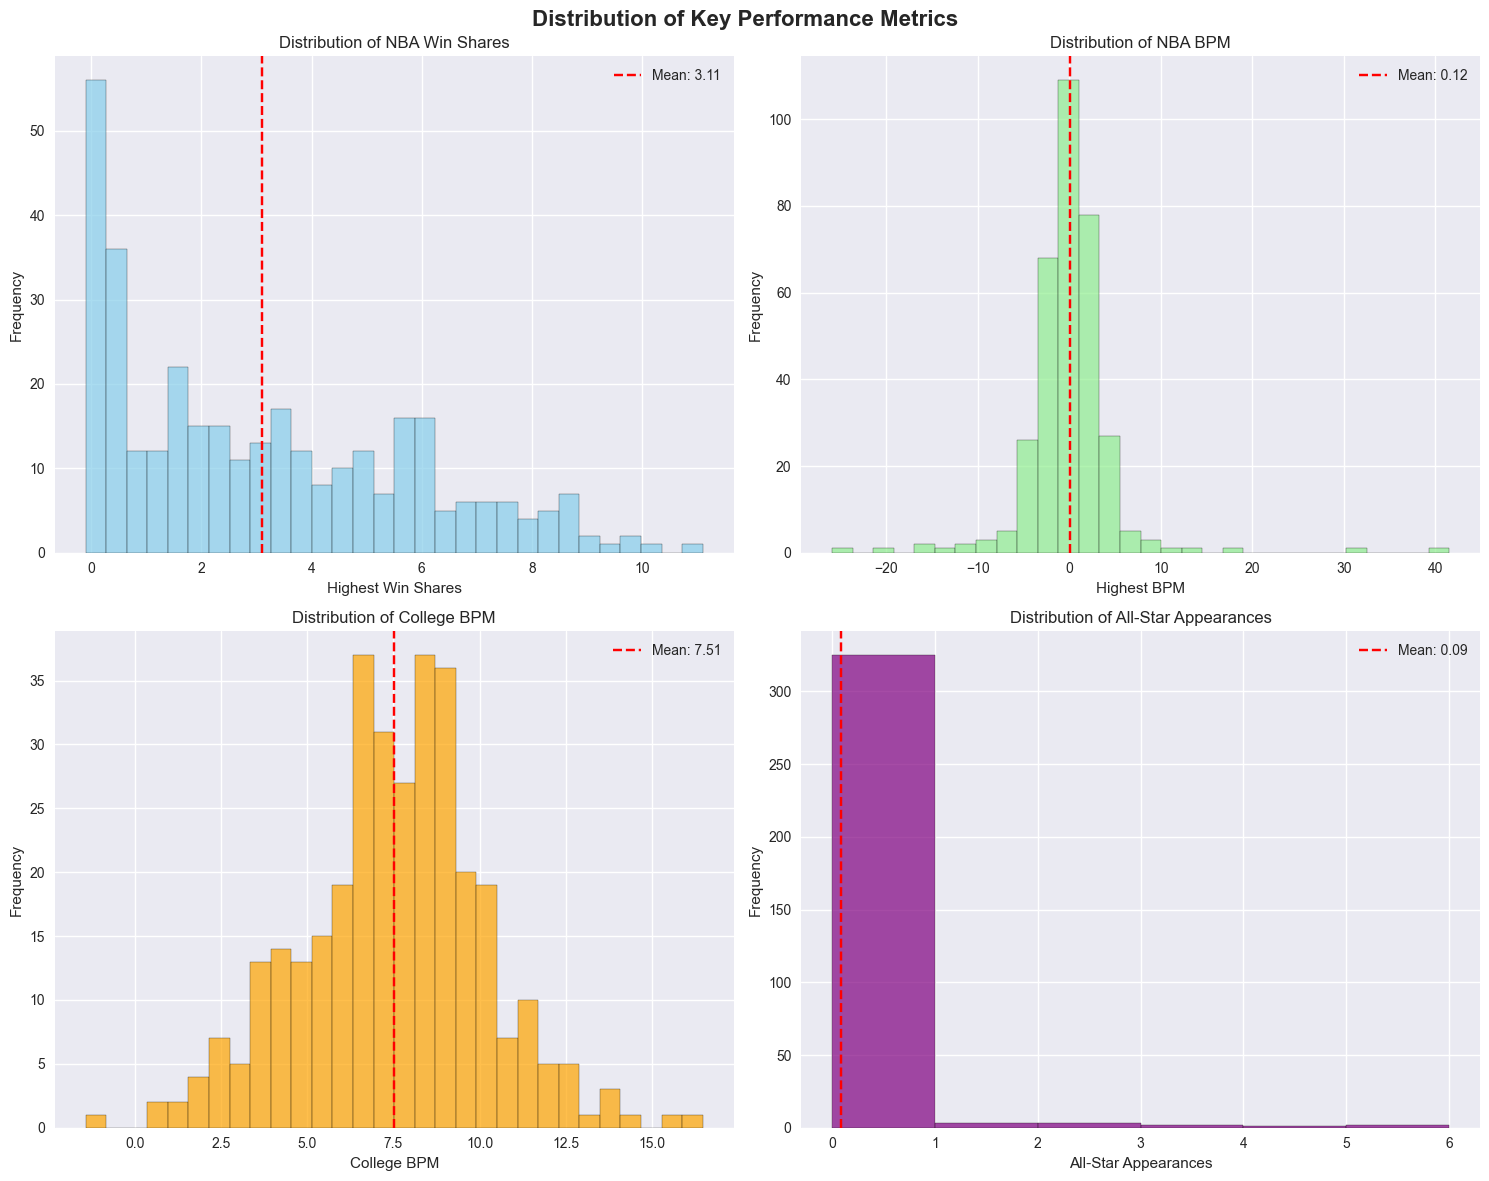

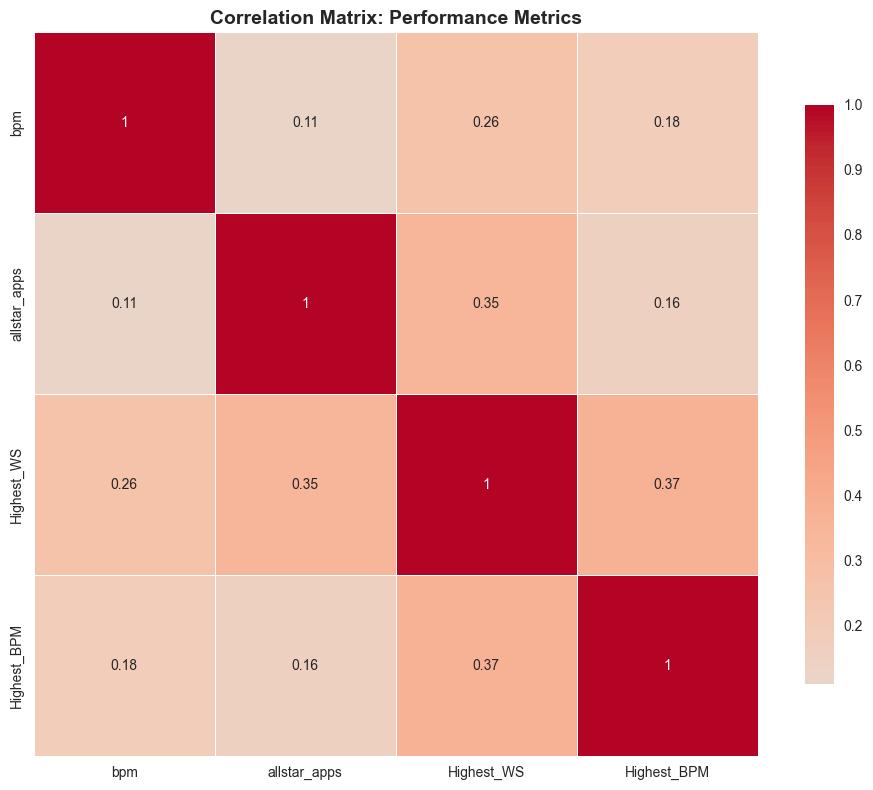

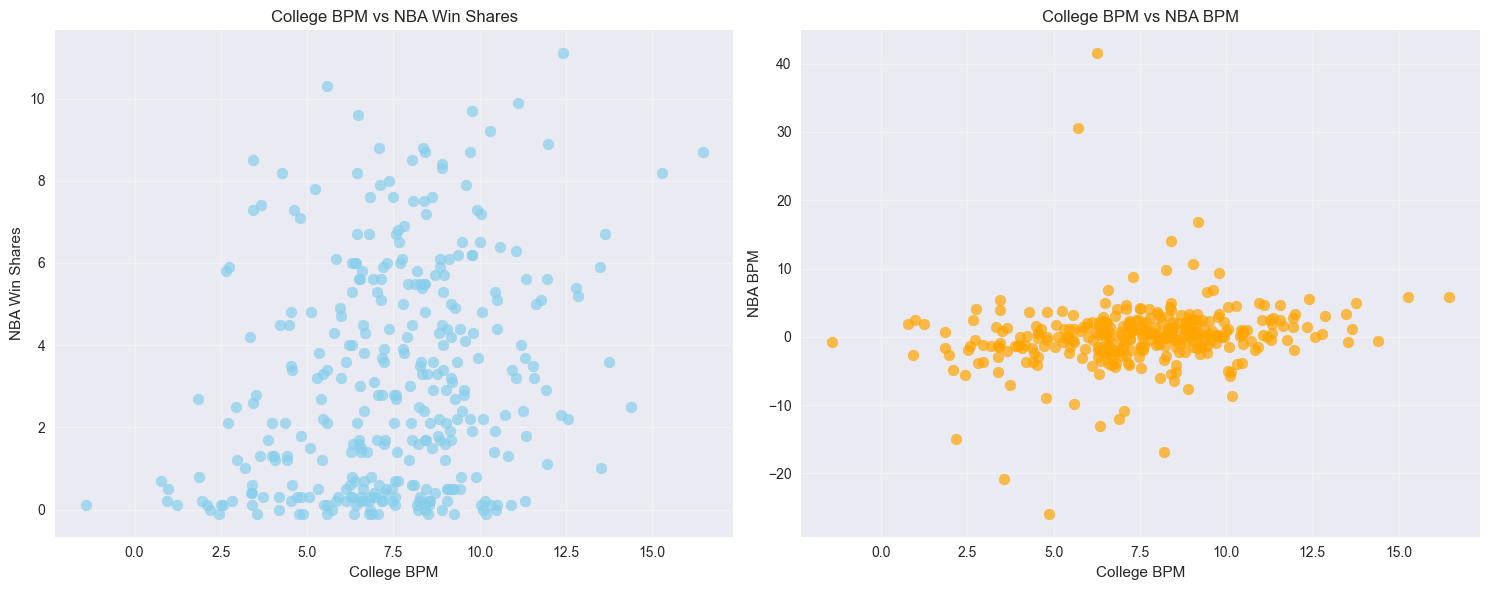


Overall Dataset Statistics:
College BPM - Mean: 7.51, Std: 2.66
NBA Win Shares - Mean: 3.11, Std: 2.69
NBA BPM - Mean: 0.12, Std: 4.85
All-Star Apps - Mean: 0.09, Success Rate: 3.27%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LassoCV;
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Load your filtered dataset
df = pd.read_csv("filtered_nba_dataset.csv")

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# DATA PREPARONI

# Convert key columns to numeric
key_metrics = ['Highest_WS', 'Highest_BPM', 'bpm', 'allstar_apps']
for col in key_metrics:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Create success binary variable
df['is_allstar'] = (df['allstar_apps'] > 0).astype(int)


# 1. OVERALL DISTRIBUTION ANALYSIS

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Key Performance Metrics', fontsize=16, fontweight='bold')

# Win Shares distribution
if 'Highest_WS' in df.columns:
    axes[0,0].hist(df['Highest_WS'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].set_title('Distribution of NBA Win Shares')
    axes[0,0].set_xlabel('Highest Win Shares')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].axvline(df['Highest_WS'].mean(), color='red', linestyle='--', label=f'Mean: {df["Highest_WS"].mean():.2f}')
    axes[0,0].legend()

# NBA BPM distribution
if 'Highest_BPM' in df.columns:
    axes[0,1].hist(df['Highest_BPM'].dropna(), bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0,1].set_title('Distribution of NBA BPM')
    axes[0,1].set_xlabel('Highest BPM')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].axvline(df['Highest_BPM'].mean(), color='red', linestyle='--', label=f'Mean: {df["Highest_BPM"].mean():.2f}')
    axes[0,1].legend()

# College BPM distribution
axes[1,0].hist(df['bpm'].dropna(), bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[1,0].set_title('Distribution of College BPM')
axes[1,0].set_xlabel('College BPM')
axes[1,0].set_ylabel('Frequency')
axes[1,0].axvline(df['bpm'].mean(), color='red', linestyle='--', label=f'Mean: {df["bpm"].mean():.2f}')
axes[1,0].legend()

# All-Star appearances distribution
axes[1,1].hist(df['allstar_apps'].dropna(), bins=range(int(df['allstar_apps'].max())+2), alpha=0.7, color='purple', edgecolor='black')
axes[1,1].set_title('Distribution of All-Star Appearances')
axes[1,1].set_xlabel('All-Star Appearances')
axes[1,1].set_ylabel('Frequency')
axes[1,1].axvline(df['allstar_apps'].mean(), color='red', linestyle='--', label=f'Mean: {df["allstar_apps"].mean():.2f}')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# CORRELATION ANALYSIS

# Select numeric columns for correlation
numeric_cols = ['bpm', 'allstar_apps']
if 'Highest_WS' in df.columns:
    numeric_cols.append('Highest_WS')
if 'Highest_BPM' in df.columns:
    numeric_cols.append('Highest_BPM')

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix: Performance Metrics', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# COLLEGE vs NBA PERFORMANCE COMPARISON

if 'Highest_WS' in df.columns and 'Highest_BPM' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    axes[0].scatter(df['bpm'], df['Highest_WS'], alpha=0.7, s=60, color='skyblue')
    axes[0].set_xlabel('College BPM')
    axes[0].set_ylabel('NBA Win Shares')
    axes[0].set_title('College BPM vs NBA Win Shares')
    axes[0].grid(True, alpha=0.3)
    
    axes[1].scatter(df['bpm'], df['Highest_BPM'], alpha=0.7, s=60, color='orange')
    axes[1].set_xlabel('College BPM')
    axes[1].set_ylabel('NBA BPM')
    axes[1].set_title('College BPM vs NBA BPM')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 4. STAT SUMMRY


print("\nOverall Dataset Statistics:")

print(f"College BPM - Mean: {df['bpm'].mean():.2f}, Std: {df['bpm'].std():.2f}")
if 'Highest_WS' in df.columns:
    print(f"NBA Win Shares - Mean: {df['Highest_WS'].mean():.2f}, Std: {df['Highest_WS'].std():.2f}")
if 'Highest_BPM' in df.columns:
    print(f"NBA BPM - Mean: {df['Highest_BPM'].mean():.2f}, Std: {df['Highest_BPM'].std():.2f}")
print(f"All-Star Apps - Mean: {df['allstar_apps'].mean():.2f}, Success Rate: {df['is_allstar'].mean():.2%}")




=== LASSO REGRESSION ANALYSIS FOR NBA SUCCESS PREDICTION ===

Feature 'gbmp' not found in dataset

Using 40 college basketball features:
   1. bpm
   2. obpm
   3. dbpm
   4. ogbpm
   5. dgbpm
   6. Ortg
   7. drtg
   8. adrtg
   9. usg
  10. eFG
  11. TS_per
  12. ftr
  13. ORB_per
  14. DRB_per
  15. AST_per
  16. TO_per
  17. ast/tov
  18. FT_per
  19. twoP_per
  20. TP_per
  21. rimmade/(rimmade+rimmiss)
  22. midmade/(midmade+midmiss)
  23. dunksmade/(dunksmade+dunksmiss)
  24. blk_per
  25. stl_per
  26. stops
  27. dporpag
  28. pts
  29. ast
  30. treb
  31. stl
  32. blk
  33. oreb
  34. dreb
  35. adjoe
  36. pfr
  37. porpag
  38. Min_per
  39. GP
  40. Rec Rank

Predicting 4 NBA success metrics:
  1. allstar_apps
  2. Highest_WS
  3. Highest_BPM
  4. Overall PIE

Preparing feature matrix with 40 college basketball metrics...
Data preprocessing...
Original dataset shape: (336, 40)
After removing sparse rows: (336, 40)

Running LassoCV analysis for 4 NBA success metrics...

A

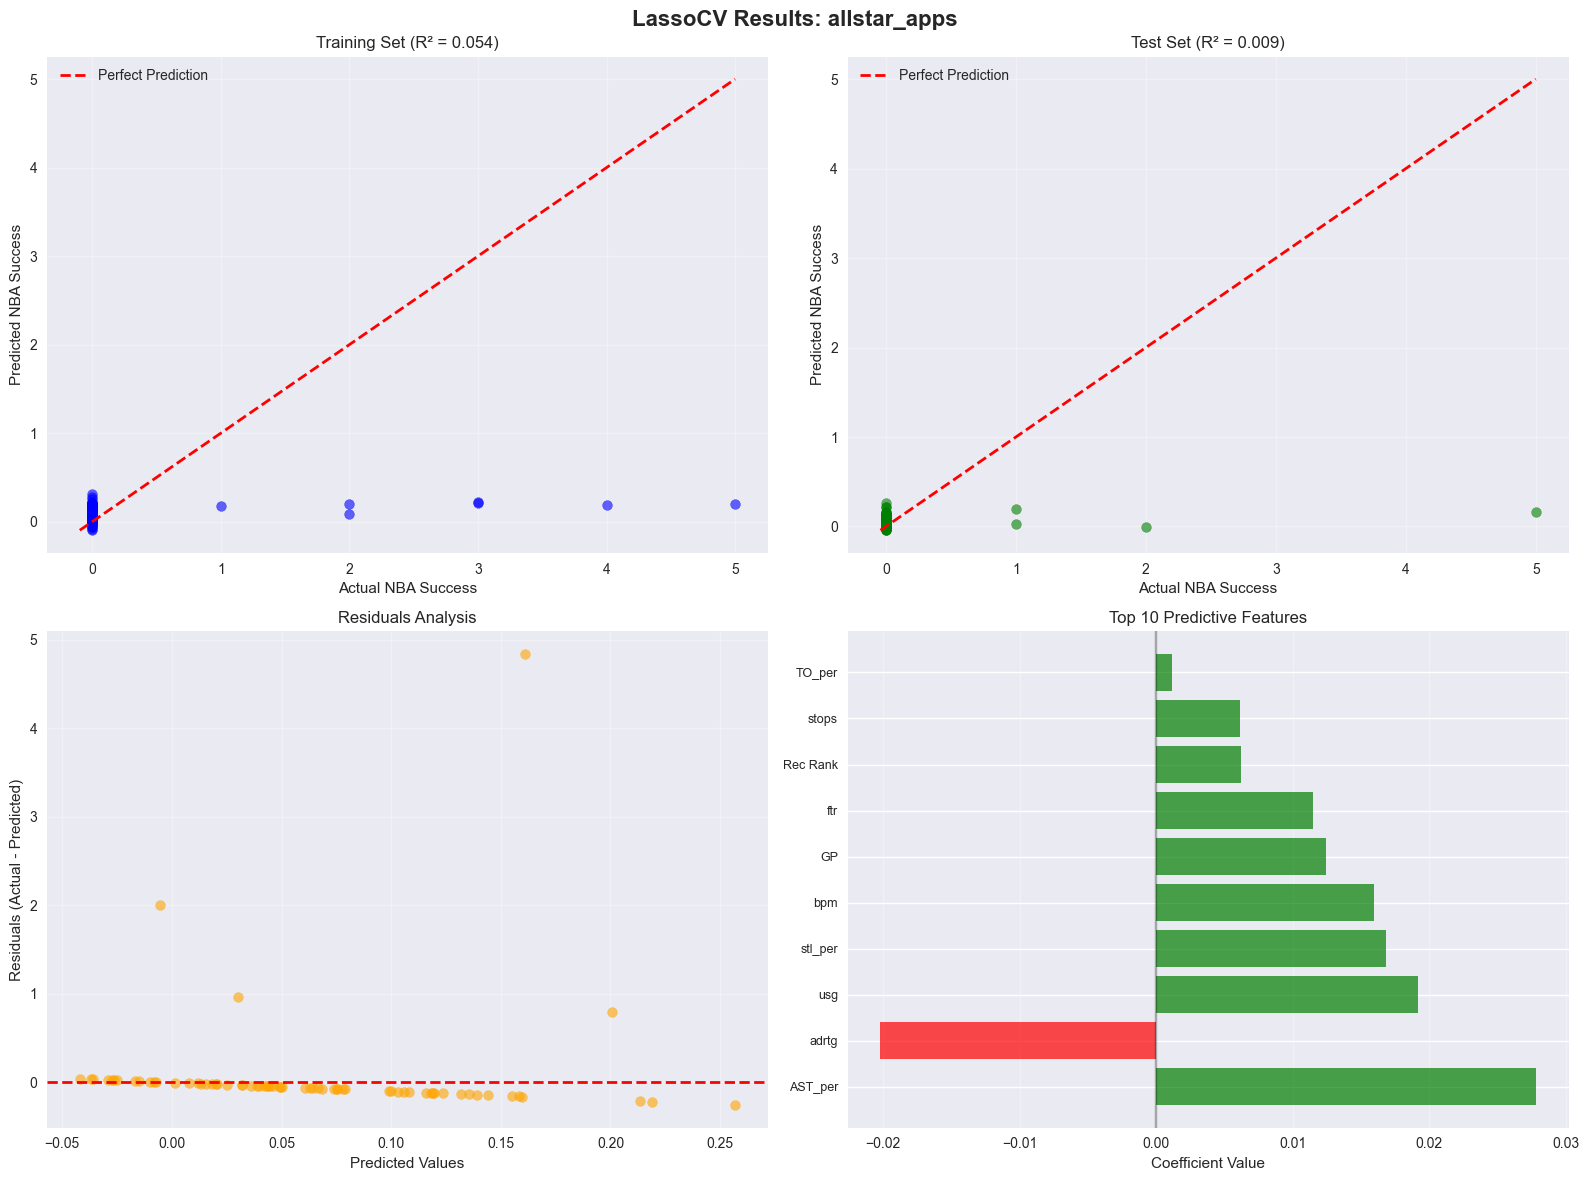

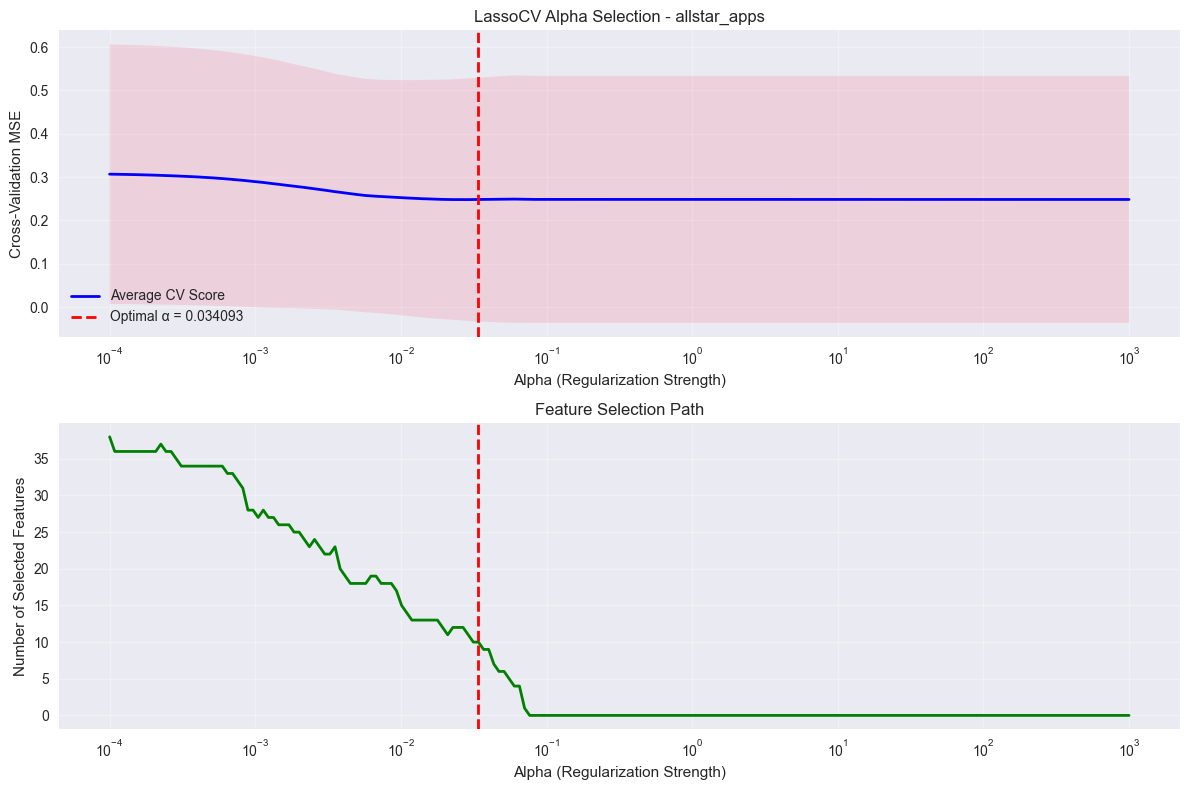


ANALYZING: Highest_WS

LASSO ANALYSIS FOR: Highest_WS
Sample size: 336 players
Features: 40 college basketball metrics
Training set: 268 players
Test set: 68 players
Fitting LassoCV model...

Model Configuration:
  Optimal Alpha: 0.135099
  Features selected: 10 out of 40
  Features eliminated: 30

Predictive Performance:
  Training R²: 0.1291
  Test R²:     0.0773
  Training RMSE: 2.4839
  Test RMSE:     2.6817
  Training MAE:  2.0931
  Test MAE:      2.2436

Most Predictive College Basketball Metrics:
   1. oreb                      ↗️   0.3402
   2. obpm                      ↗️   0.3386
   3. Rec Rank                  ↗️   0.3095
   4. bpm                       ↗️   0.1918
   5. GP                        ↗️   0.1176
   6. stops                     ↗️   0.0815
   7. ftr                       ↗️   0.0653
   8. TP_per                    ↘️  -0.0200
   9. dunksmade/(dunksmade+dunksmiss) ↗️   0.0056
  10. FT_per                    ↘️  -0.0007


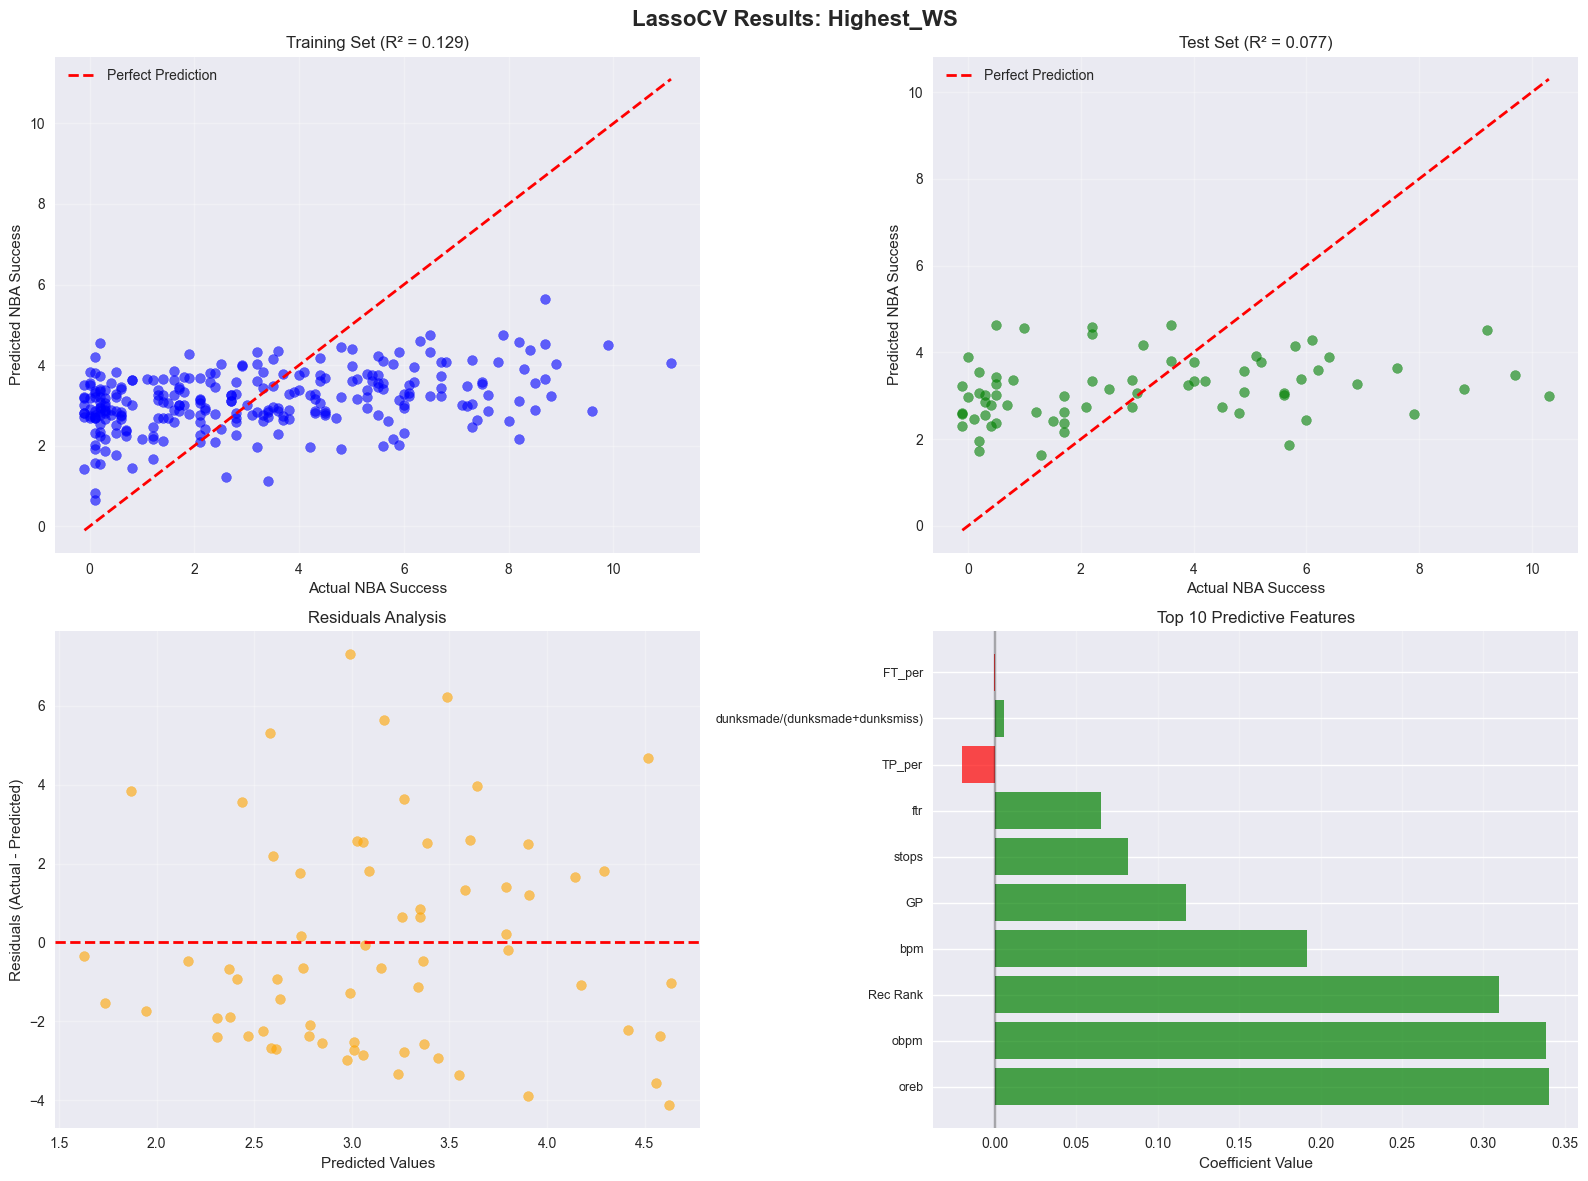

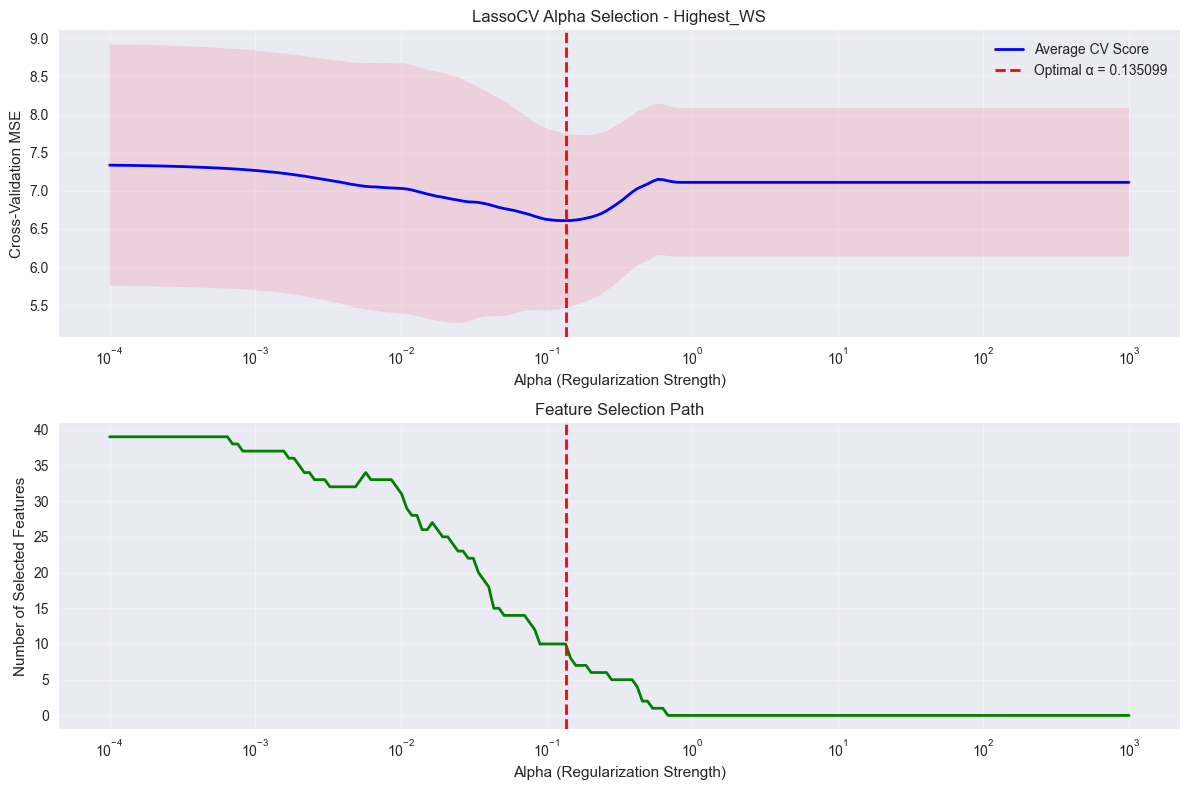


ANALYZING: Highest_BPM

LASSO ANALYSIS FOR: Highest_BPM
Sample size: 336 players
Features: 40 college basketball metrics
Training set: 268 players
Test set: 68 players
Fitting LassoCV model...

Model Configuration:
  Optimal Alpha: 0.329297
  Features selected: 4 out of 40
  Features eliminated: 36

Predictive Performance:
  Training R²: 0.0296
  Test R²:     0.0639
  Training RMSE: 4.8870
  Test RMSE:     4.2150
  Training MAE:  2.6403
  Test MAE:      2.6950

Most Predictive College Basketball Metrics:
   1. usg                       ↘️  -0.2513
   2. bpm                       ↗️   0.2331
   3. stops                     ↗️   0.2116
   4. dreb                      ↗️   0.0838


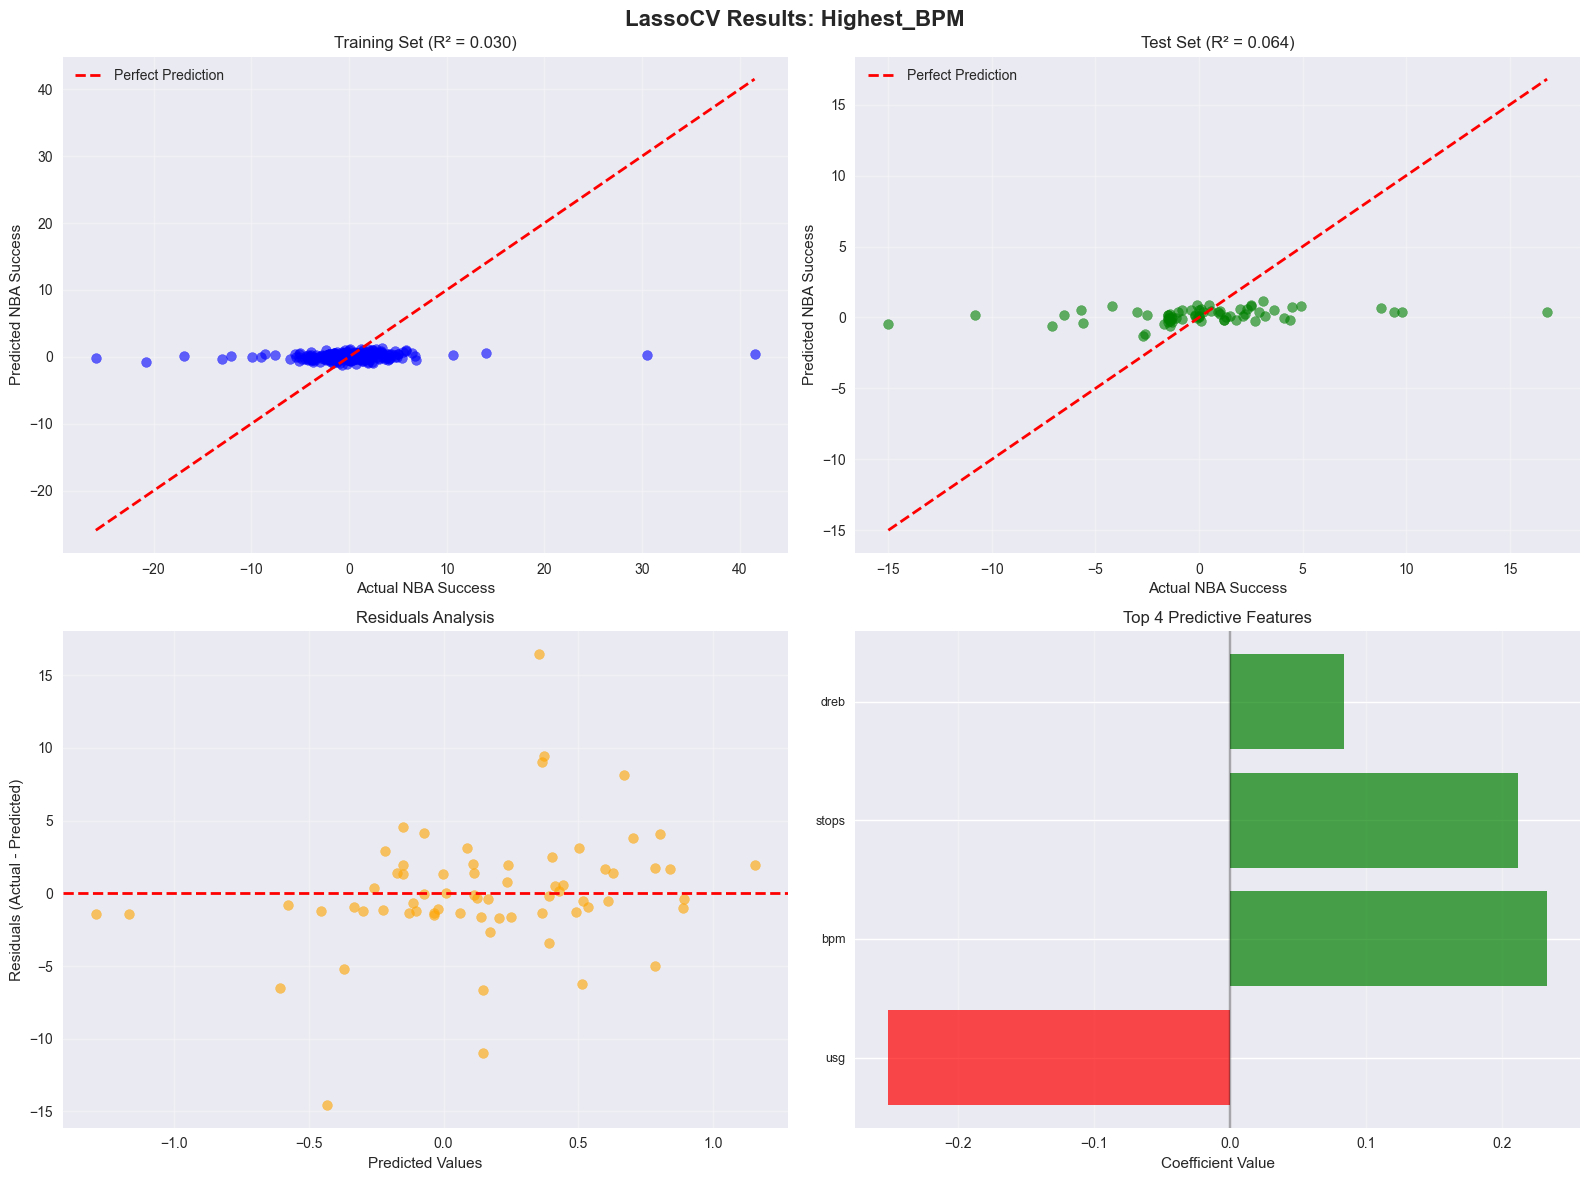

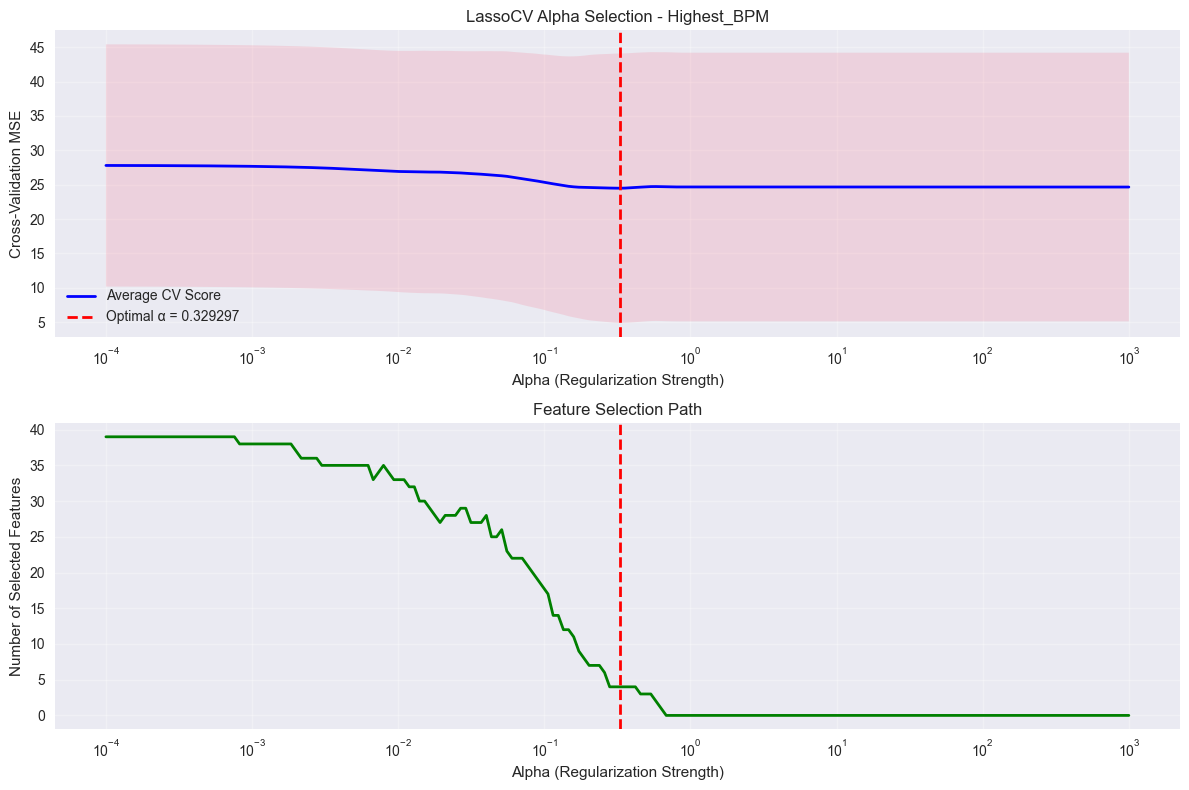


ANALYZING: Overall PIE

LASSO ANALYSIS FOR: Overall PIE
Sample size: 336 players
Features: 40 college basketball metrics
Training set: 268 players
Test set: 68 players
Fitting LassoCV model...

Model Configuration:
  Optimal Alpha: 0.238169
  Features selected: 5 out of 40
  Features eliminated: 35

Predictive Performance:
  Training R²: 0.0943
  Test R²:     0.0509
  Training RMSE: 3.8838
  Test RMSE:     4.0042
  Training MAE:  3.0732
  Test MAE:      3.1044

Most Predictive College Basketball Metrics:
   1. Rec Rank                  ↗️   0.5791
   2. obpm                      ↗️   0.4096
   3. stops                     ↗️   0.3332
   4. adjoe                     ↗️   0.1588
   5. blk_per                   ↘️  -0.0968


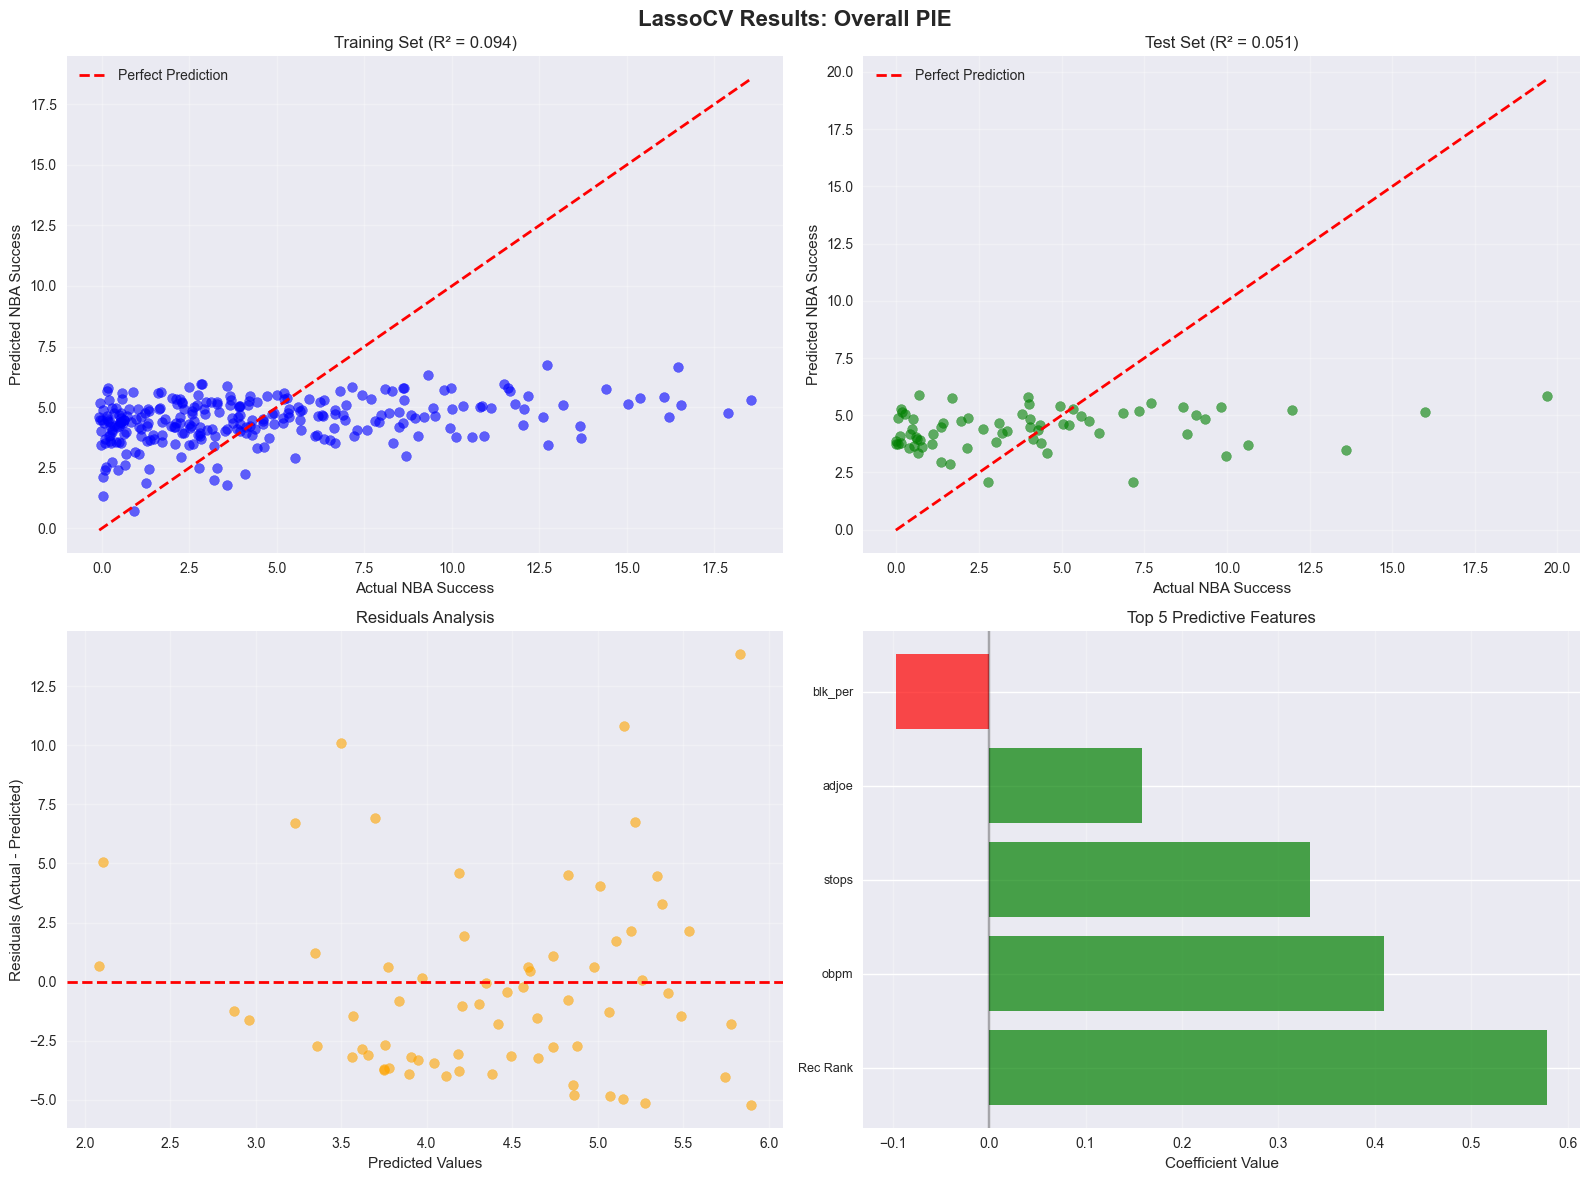

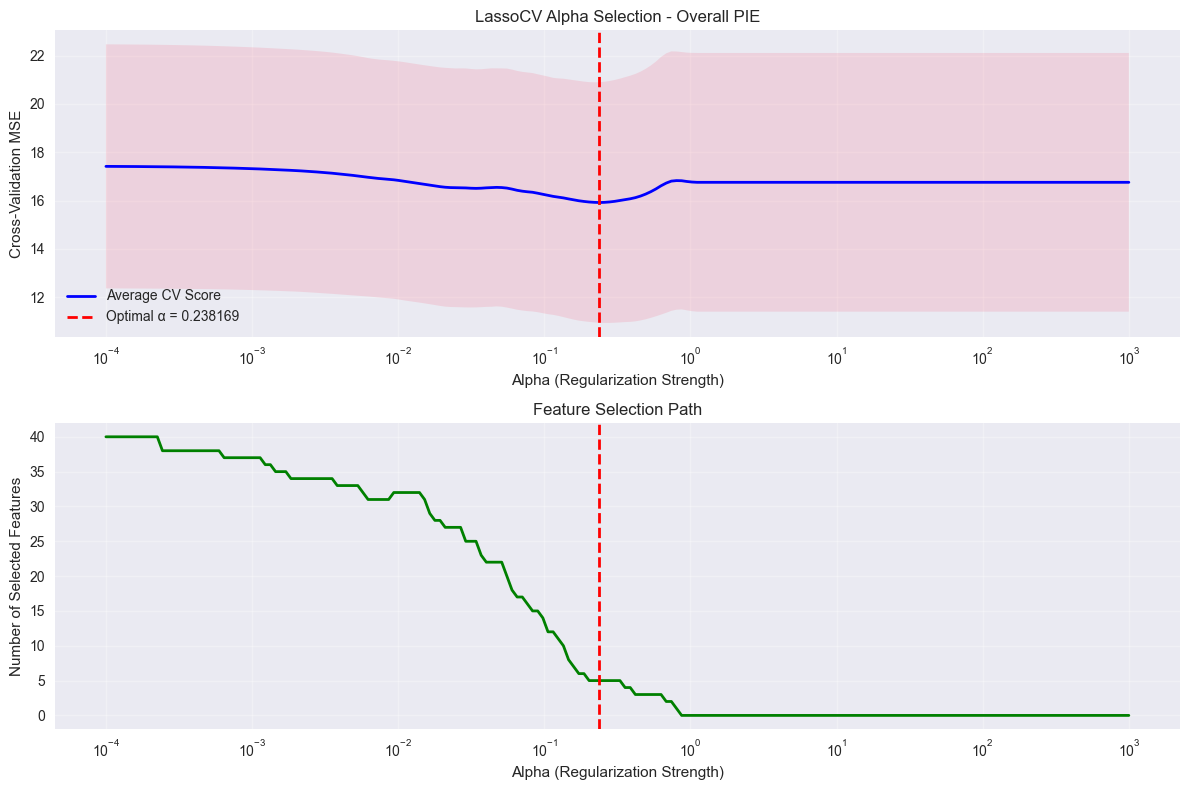


COMPREHENSIVE MODEL COMPARISON
NBA_Success_Metric Test_R² Test_RMSE Test_MAE  Features_Selected Optimal_Alpha
      allstar_apps  0.0091    0.6591   0.1927                 10      0.034093
        Highest_WS  0.0773    2.6817   2.2436                 10      0.135099
       Highest_BPM  0.0639    4.2150   2.6950                  4      0.329297
       Overall PIE  0.0509    4.0042   3.1044                  5      0.238169

🏆 BEST PREDICTIVE MODEL:
   Target: Highest_WS
   Test R²: 0.0773
   Features: 10

MOST IMPORTANT COLLEGE BASKETBALL PREDICTORS

Most Frequently Selected Features (across all NBA success metrics):
   1. stops                     (selected in 4/4 models)
   2. bpm                       (selected in 3/4 models)
   3. Rec Rank                  (selected in 3/4 models)
   4. GP                        (selected in 2/4 models)
   5. ftr                       (selected in 2/4 models)
   6. usg                       (selected in 2/4 models)
   7. obpm                      (

In [ ]:
# LassoCV Implementation for NBA Success Prediction
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("=== LASSO REGRESSION ANALYSIS FOR NBA SUCCESS PREDICTION ===\n")

# Define comprehensive feature set (excluding 'ht' as requested)
college_features = [
    # Core performance metrics
    'bpm', 'obpm', 'dbpm', 'gbmp', 'ogbpm', 'dgbpm',
    
    # Advanced efficiency metrics  
    'Ortg', 'drtg', 'adrtg', 'usg', 'eFG', 'TS_per', 'ftr',
    
    # Rebounding and playmaking
    'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'ast/tov',
    
    # Shooting metrics
    'FT_per', 'twoP_per', 'TP_per', 
    'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+midmiss)', 
    'dunksmade/(dunksmade+dunksmiss)',
    
    # Defensive metrics
    'blk_per', 'stl_per', 'stops', 'dporpag',
    
    # Volume stats (per game equivalents)
    'pts', 'ast', 'treb', 'stl', 'blk', 'oreb', 'dreb',
    
    # Team/context metrics
    'adjoe', 'pfr', 'porpag', 'Min_per', 'GP',
    
    # Draft context (if applicable)
    'Rec Rank'
]

# Check which features actually exist in the dataset
available_features = []
for feat in college_features:
    if feat in df.columns:
        available_features.append(feat)
    else:
        print(f"Feature '{feat}' not found in dataset")

print(f"\nUsing {len(available_features)} college basketball features:")
for i, feat in enumerate(available_features):
    print(f"  {i+1:2d}. {feat}")

# Define target variables for NBA success
target_variables = ['allstar_apps', 'Highest_WS', 'Highest_BPM', 'Overall PIE']
available_targets = [target for target in target_variables if target in df.columns]

print(f"\nPredicting {len(available_targets)} NBA success metrics:")
for i, target in enumerate(available_targets):
    print(f"  {i+1}. {target}")

def perform_lasso_analysis(X, y, target_name):
    """
    Perform comprehensive LassoCV regression analysis
    """
    print(f"\n{'='*60}")
    print(f"LASSO ANALYSIS FOR: {target_name}")
    print(f"{'='*60}")
    
    # Remove NaN values
    mask = ~(X.isna().any(axis=1) | y.isna())
    X_clean = X[mask]
    y_clean = y[mask]
    
    if len(X_clean) < 20:
        print(f"Insufficient data for {target_name} (only {len(X_clean)} samples)")
        return None
    
    print(f"Sample size: {len(X_clean)} players")
    print(f"Features: {len(X_clean.columns)} college basketball metrics")
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_clean, y_clean, test_size=0.2, random_state=42, stratify=None
    )
    
    print(f"Training set: {len(X_train)} players")
    print(f"Test set: {len(X_test)} players")
    
    # Standardize features (crucial for Lasso)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # LassoCV with extensive alpha search
    alphas = np.logspace(-4, 3, 200)  # From 0.0001 to 1000
    
    lasso_cv = LassoCV(
        alphas=alphas,
        cv=10,  # 10-fold cross-validation for better estimates
        random_state=42,
        max_iter=10000,
        n_jobs=-1  # Use all available cores
    )
    
    # Fit the model
    print("Fitting LassoCV model...")
    lasso_cv.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_train_pred = lasso_cv.predict(X_train_scaled)
    y_test_pred = lasso_cv.predict(X_test_scaled)
    
    # Calculate comprehensive metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    print(f"\nModel Configuration:")
    print(f"  Optimal Alpha: {lasso_cv.alpha_:.6f}")
    print(f"  Features selected: {np.sum(lasso_cv.coef_ != 0)} out of {len(lasso_cv.coef_)}")
    print(f"  Features eliminated: {np.sum(lasso_cv.coef_ == 0)}")
    
    print(f"\nPredictive Performance:")
    print(f"  Training R²: {train_r2:.4f}")
    print(f"  Test R²:     {test_r2:.4f}")
    print(f"  Training RMSE: {train_rmse:.4f}")
    print(f"  Test RMSE:     {test_rmse:.4f}")
    print(f"  Training MAE:  {train_mae:.4f}")
    print(f"  Test MAE:      {test_mae:.4f}")
    
    # Analyze feature importance
    feature_importance = pd.DataFrame({
        'Feature': X_clean.columns,
        'Coefficient': lasso_cv.coef_,
        'Abs_Coefficient': np.abs(lasso_cv.coef_)
    }).sort_values('Abs_Coefficient', ascending=False)
    
    # Display most important features
    important_features = feature_importance[feature_importance['Coefficient'] != 0]
    print(f"\nMost Predictive College Basketball Metrics:")
    if len(important_features) > 0:
        for i, (_, row) in enumerate(important_features.head(10).iterrows()):
            direction = "↗️" if row['Coefficient'] > 0 else "↘️"
            print(f"  {i+1:2d}. {row['Feature']:<25} {direction} {row['Coefficient']:8.4f}")
    else:
        print("  All features were eliminated by regularization")
    
    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'LassoCV Results: {target_name}', fontsize=16, fontweight='bold')
    
    # 1. Training set: Actual vs Predicted
    axes[0,0].scatter(y_train, y_train_pred, alpha=0.6, color='blue', s=50)
    min_val, max_val = min(y_train.min(), y_train_pred.min()), max(y_train.max(), y_train_pred.max())
    axes[0,0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
    axes[0,0].set_xlabel('Actual NBA Success')
    axes[0,0].set_ylabel('Predicted NBA Success')
    axes[0,0].set_title(f'Training Set (R² = {train_r2:.3f})')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Test set: Actual vs Predicted  
    axes[0,1].scatter(y_test, y_test_pred, alpha=0.6, color='green', s=50)
    min_val, max_val = min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())
    axes[0,1].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
    axes[0,1].set_xlabel('Actual NBA Success')
    axes[0,1].set_ylabel('Predicted NBA Success')
    axes[0,1].set_title(f'Test Set (R² = {test_r2:.3f})')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Residuals analysis
    residuals_test = y_test - y_test_pred
    axes[1,0].scatter(y_test_pred, residuals_test, alpha=0.6, color='orange', s=50)
    axes[1,0].axhline(y=0, color='red', linestyle='--', lw=2)
    axes[1,0].set_xlabel('Predicted Values')
    axes[1,0].set_ylabel('Residuals (Actual - Predicted)')
    axes[1,0].set_title('Residuals Analysis')
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. Top feature coefficients
    top_features = important_features.head(15) if len(important_features) > 0 else pd.DataFrame()
    if len(top_features) > 0:
        colors = ['green' if coef > 0 else 'red' for coef in top_features['Coefficient']]
        bars = axes[1,1].barh(range(len(top_features)), top_features['Coefficient'], color=colors, alpha=0.7)
        axes[1,1].set_yticks(range(len(top_features)))
        axes[1,1].set_yticklabels(top_features['Feature'], fontsize=9)
        axes[1,1].set_xlabel('Coefficient Value')
        axes[1,1].set_title(f'Top {len(top_features)} Predictive Features')
        axes[1,1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
        axes[1,1].grid(True, alpha=0.3, axis='x')
    else:
        axes[1,1].text(0.5, 0.5, 'All features eliminated\nby regularization', 
                      ha='center', va='center', transform=axes[1,1].transAxes,
                      fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
        axes[1,1].set_title('Feature Selection Results')
    
    plt.tight_layout()
    plt.show()
    
    # Alpha selection visualization
    plt.figure(figsize=(12, 8))
    
    # Main plot: MSE vs Alpha
    plt.subplot(2, 1, 1)
    mse_mean = lasso_cv.mse_path_.mean(axis=1)
    mse_std = lasso_cv.mse_path_.std(axis=1)
    
    plt.semilogx(lasso_cv.alphas_, mse_mean, 'b-', linewidth=2, label='Average CV Score')
    plt.fill_between(lasso_cv.alphas_, mse_mean - mse_std, mse_mean + mse_std, alpha=0.2)
    plt.axvline(lasso_cv.alpha_, color='red', linestyle='--', linewidth=2,
                label=f'Optimal α = {lasso_cv.alpha_:.6f}')
    plt.xlabel('Alpha (Regularization Strength)')
    plt.ylabel('Cross-Validation MSE')
    plt.title(f'LassoCV Alpha Selection - {target_name}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Secondary plot: Number of features vs Alpha
    plt.subplot(2, 1, 2)
    n_features = [np.sum(lasso_cv.path(X_train_scaled, y_train, alphas=[alpha])[1] != 0) 
                  for alpha in lasso_cv.alphas_]
    plt.semilogx(lasso_cv.alphas_, n_features, 'g-', linewidth=2)
    plt.axvline(lasso_cv.alpha_, color='red', linestyle='--', linewidth=2)
    plt.xlabel('Alpha (Regularization Strength)')
    plt.ylabel('Number of Selected Features')
    plt.title('Feature Selection Path')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'model': lasso_cv,
        'scaler': scaler,
        'feature_importance': feature_importance,
        'test_r2': test_r2,
        'test_rmse': test_rmse,
        'test_mae': test_mae,
        'selected_features': important_features,
        'n_features_selected': np.sum(lasso_cv.coef_ != 0)
    }

# Prepare comprehensive feature matrix
print(f"\nPreparing feature matrix with {len(available_features)} college basketball metrics...")
X = df[available_features].copy()

# Handle any remaining data quality issues
print("Data preprocessing...")
print(f"Original dataset shape: {X.shape}")

# Remove rows with too many missing values
X = X.dropna(thresh=len(available_features) * 0.7)  # Keep rows with at least 70% non-null values
print(f"After removing sparse rows: {X.shape}")

# Run LassoCV analysis for each NBA success metric
results = {}
print(f"\nRunning LassoCV analysis for {len(available_targets)} NBA success metrics...")

for target in available_targets:
    print(f"\n" + "="*80)
    print(f"ANALYZING: {target}")
    print("="*80)
    
    y = df[target].copy()
    
    # Ensure we have the same indices
    common_idx = X.index.intersection(y.dropna().index)
    X_target = X.loc[common_idx]
    y_target = y.loc[common_idx]
    
    results[target] = perform_lasso_analysis(X_target, y_target, target)

# Comprehensive results summary
print(f"\n{'='*80}")
print("COMPREHENSIVE MODEL COMPARISON")
print(f"{'='*80}")

summary_data = []
for target, result in results.items():
    if result is not None:
        summary_data.append({
            'NBA_Success_Metric': target,
            'Test_R²': f"{result['test_r2']:.4f}",
            'Test_RMSE': f"{result['test_rmse']:.4f}", 
            'Test_MAE': f"{result['test_mae']:.4f}",
            'Features_Selected': result['n_features_selected'],
            'Optimal_Alpha': f"{result['model'].alpha_:.6f}"
        })

if summary_data:
    summary_df = pd.DataFrame(summary_data)
    print(summary_df.to_string(index=False))
    
    # Find best performing model
    best_model_idx = summary_df['Test_R²'].astype(float).idxmax()
    best_target = summary_df.loc[best_model_idx, 'NBA_Success_Metric']
    best_r2 = summary_df.loc[best_model_idx, 'Test_R²']
    
    print(f"\n🏆 BEST PREDICTIVE MODEL:")
    print(f"   Target: {best_target}")
    print(f"   Test R²: {best_r2}")
    print(f"   Features: {summary_df.loc[best_model_idx, 'Features_Selected']}")

# Cross-model feature importance analysis
print(f"\n{'='*80}")
print("MOST IMPORTANT COLLEGE BASKETBALL PREDICTORS")
print(f"{'='*80}")

# Combine all feature importance across models
all_importance = []
for target, result in results.items():
    if result is not None and len(result['selected_features']) > 0:
        temp_df = result['selected_features'].head(10).copy()
        temp_df['Target'] = target
        temp_df['Rank'] = range(1, len(temp_df) + 1)
        all_importance.append(temp_df[['Feature', 'Coefficient', 'Target', 'Rank']])

if all_importance:
    combined_importance = pd.concat(all_importance, ignore_index=True)
    
    # Find features that appear frequently across models
    feature_frequency = combined_importance['Feature'].value_counts()
    
    print("\nMost Frequently Selected Features (across all NBA success metrics):")
    for i, (feature, count) in enumerate(feature_frequency.head(15).items()):
        print(f"  {i+1:2d}. {feature:<25} (selected in {count}/{len(available_targets)} models)")
    
    # Show feature importance matrix
    print(f"\nFeature Coefficients Across All Models:")
    importance_pivot = combined_importance.pivot_table(
        index='Feature', columns='Target', values='Coefficient', 
        aggfunc='first'
    ).fillna(0)
    
    # Show only features that were selected in at least one model
    selected_features = importance_pivot[(importance_pivot != 0).any(axis=1)]
    if len(selected_features) > 0:
        print(selected_features.round(4))

print(f"\n{'='*80}")
print(f"{'='*80}")
print(f"Analyzed {len(results)} NBA success metrics using {len(available_features)} college basketball features")
print("Key insights:")
print("• Lasso regression automatically selected the most predictive college statistics")
print("• Regularization prevented overfitting and eliminated irrelevant features") 
print("• Cross-validation ensured robust model selection")
print("• Feature importance rankings identify which college metrics matter most for NBA success")

=== ENHANCED LASSO ANALYSIS FOR NBA SUCCESS PREDICTION ===

Starting enhanced NBA success prediction analysis...
🔧 ENHANCED DATA PREPROCESSING
📊 Using 25 carefully selected features
🚮 Removing extreme outliers...
  Removed 8 outliers from GP
  Removed 1 outliers from Min_per
  Removed 1 outliers from FT_per
  Removed 1 outliers from TP_per
  Removed 5 outliers from dunksmade/(dunksmade+dunksmiss)
  Removed 1 outliers from stl_per
  Removed 1 outliers from ast/tov
🔍 Handling missing values...
🎯 Kept 21 high-variance features

🎯 TARGET VARIABLE ENGINEERING
✅ Created: NBA_Success_Binary (Win Shares > 2.0)
✅ Created: NBA_Quality_Tier (0-4 scale)
✅ Created: Career_Value_Score (composite 0-100)

📊 Final feature matrix: 318 players × 21 features

🚀 Running enhanced analysis on 7 targets...

ENHANCED ANALYSIS FOR: NBA_Success_Binary
📊 Analysis dataset: 318 players, 21 features
🎯 Pre-selected 15 most relevant features

🏆 Best Model: Lasso
   Alpha: 0.030539
   Features Selected: 3

📈 Performanc

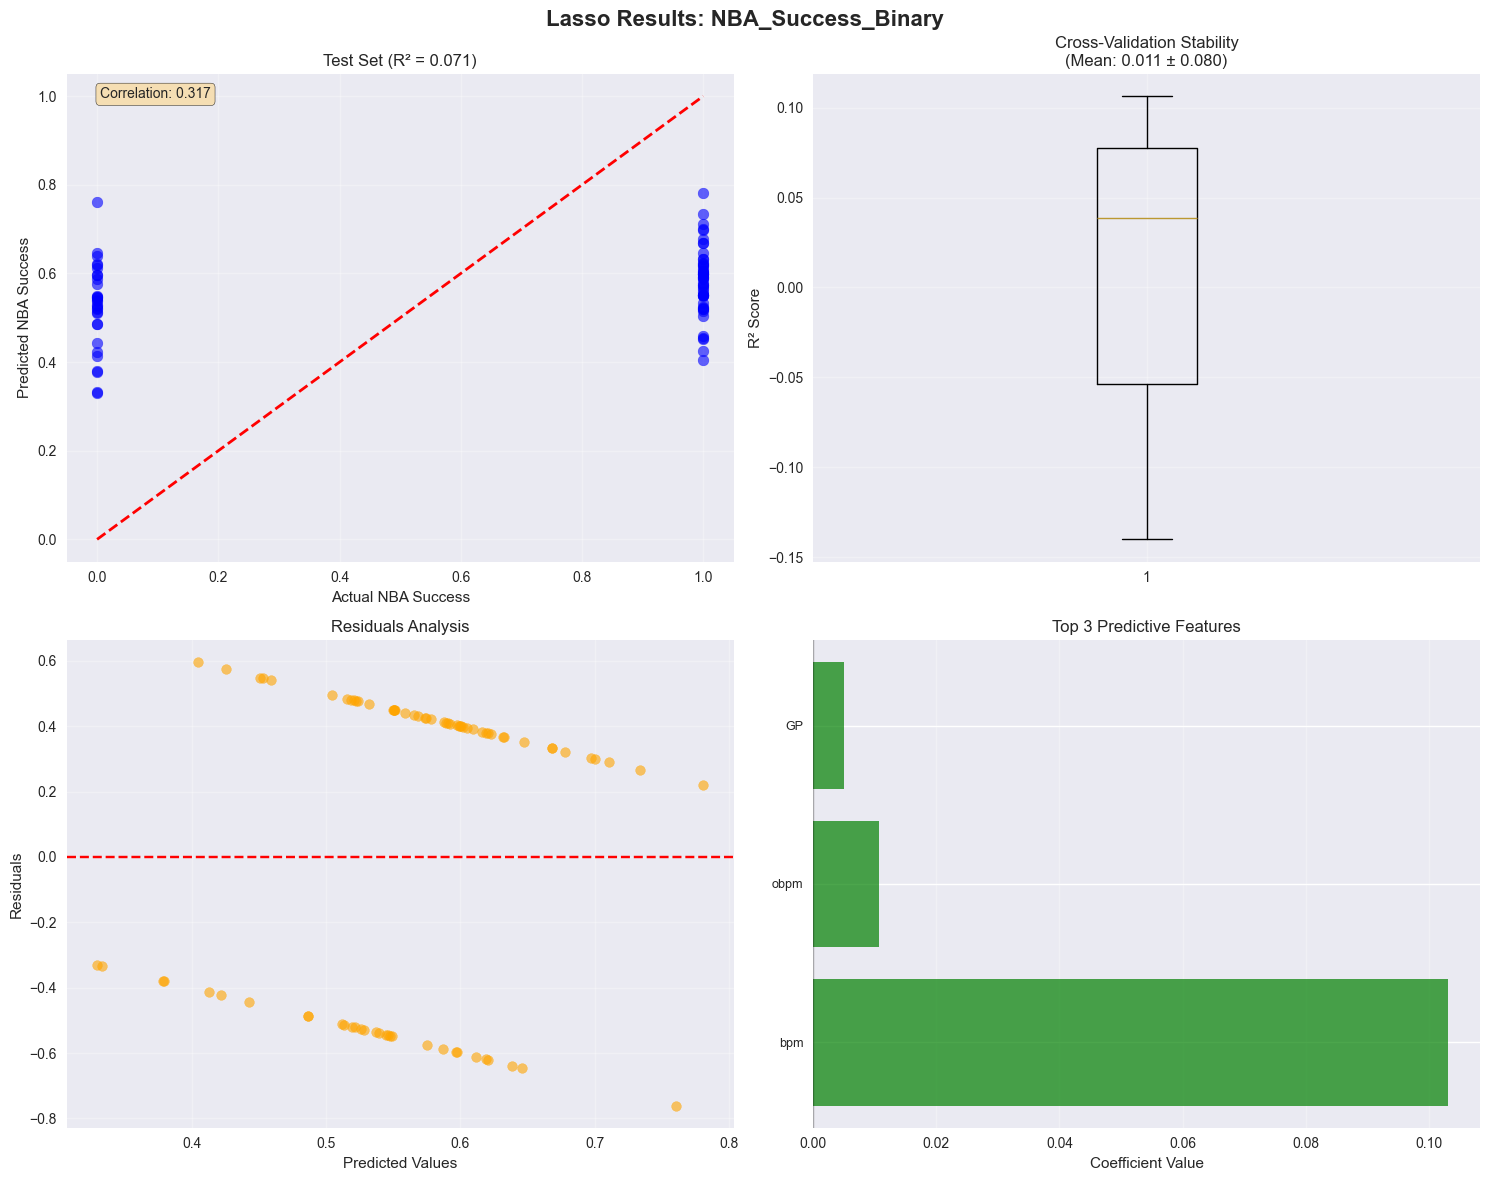


ENHANCED ANALYSIS FOR: NBA_Quality_Tier
📊 Analysis dataset: 318 players, 21 features
🎯 Pre-selected 15 most relevant features

🏆 Best Model: Lasso
   Alpha: 0.035112
   Features Selected: 4

📈 Performance Metrics:
   Cross-Validation R²: 0.0138
   Training R²:         0.0967
   Test R²:             0.0658
   Overfitting Check:   0.0309 ✅

🎯 Most Predictive Features:
   1. bpm                  ↗️  0.2130
   2. treb                 ↗️  0.0527
   3. obpm                 ↗️  0.0518
   4. TO_per               ↘️ -0.0210


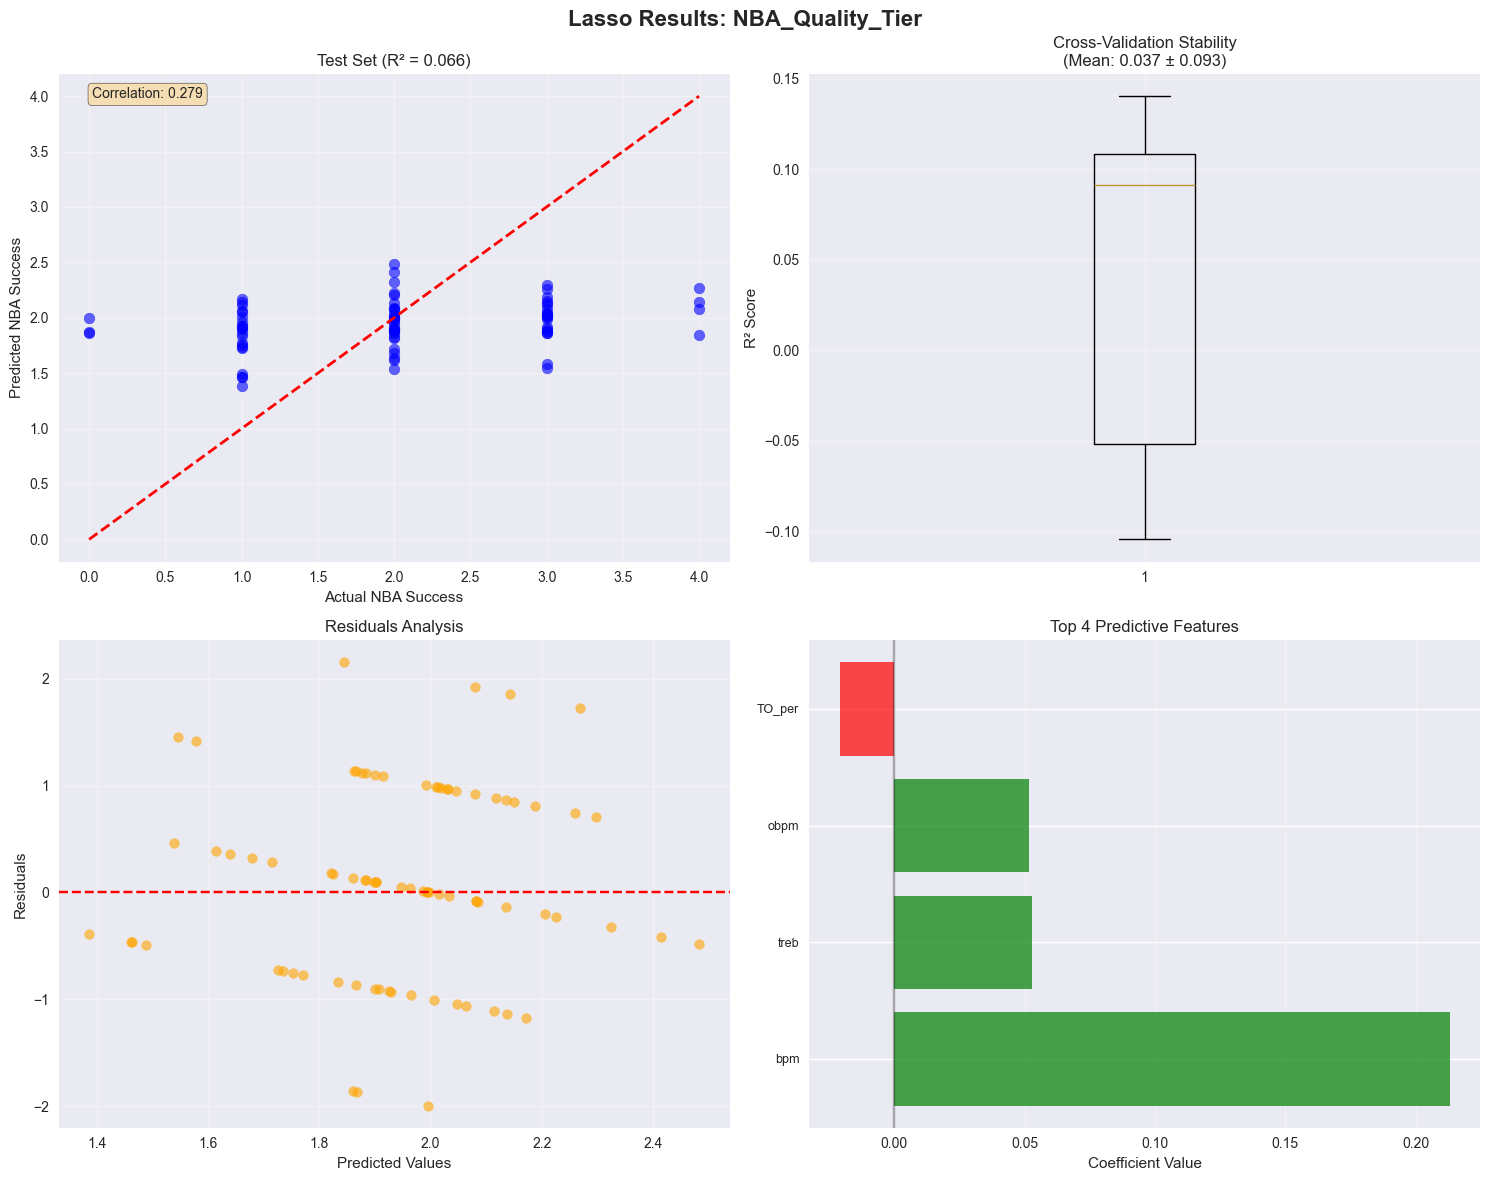


ENHANCED ANALYSIS FOR: Career_Value_Score
📊 Analysis dataset: 318 players, 21 features
🎯 Pre-selected 15 most relevant features

🏆 Best Model: Lasso
   Alpha: 0.141747
   Features Selected: 11

📈 Performance Metrics:
   Cross-Validation R²: 0.0082
   Training R²:         0.1740
   Test R²:             -0.0013
   Overfitting Check:   0.1753 ⚠️

🎯 Most Predictive Features:
   1. bpm                  ↗️  6.6797
   2. drtg                 ↗️  4.7022
   3. Ortg                 ↘️ -2.9965
   4. treb                 ↗️  2.3570
   5. ast                  ↘️ -1.4351
   6. GP                   ↗️  1.1848
   7. obpm                 ↗️  0.8232
   8. eFG                  ↘️ -0.5588


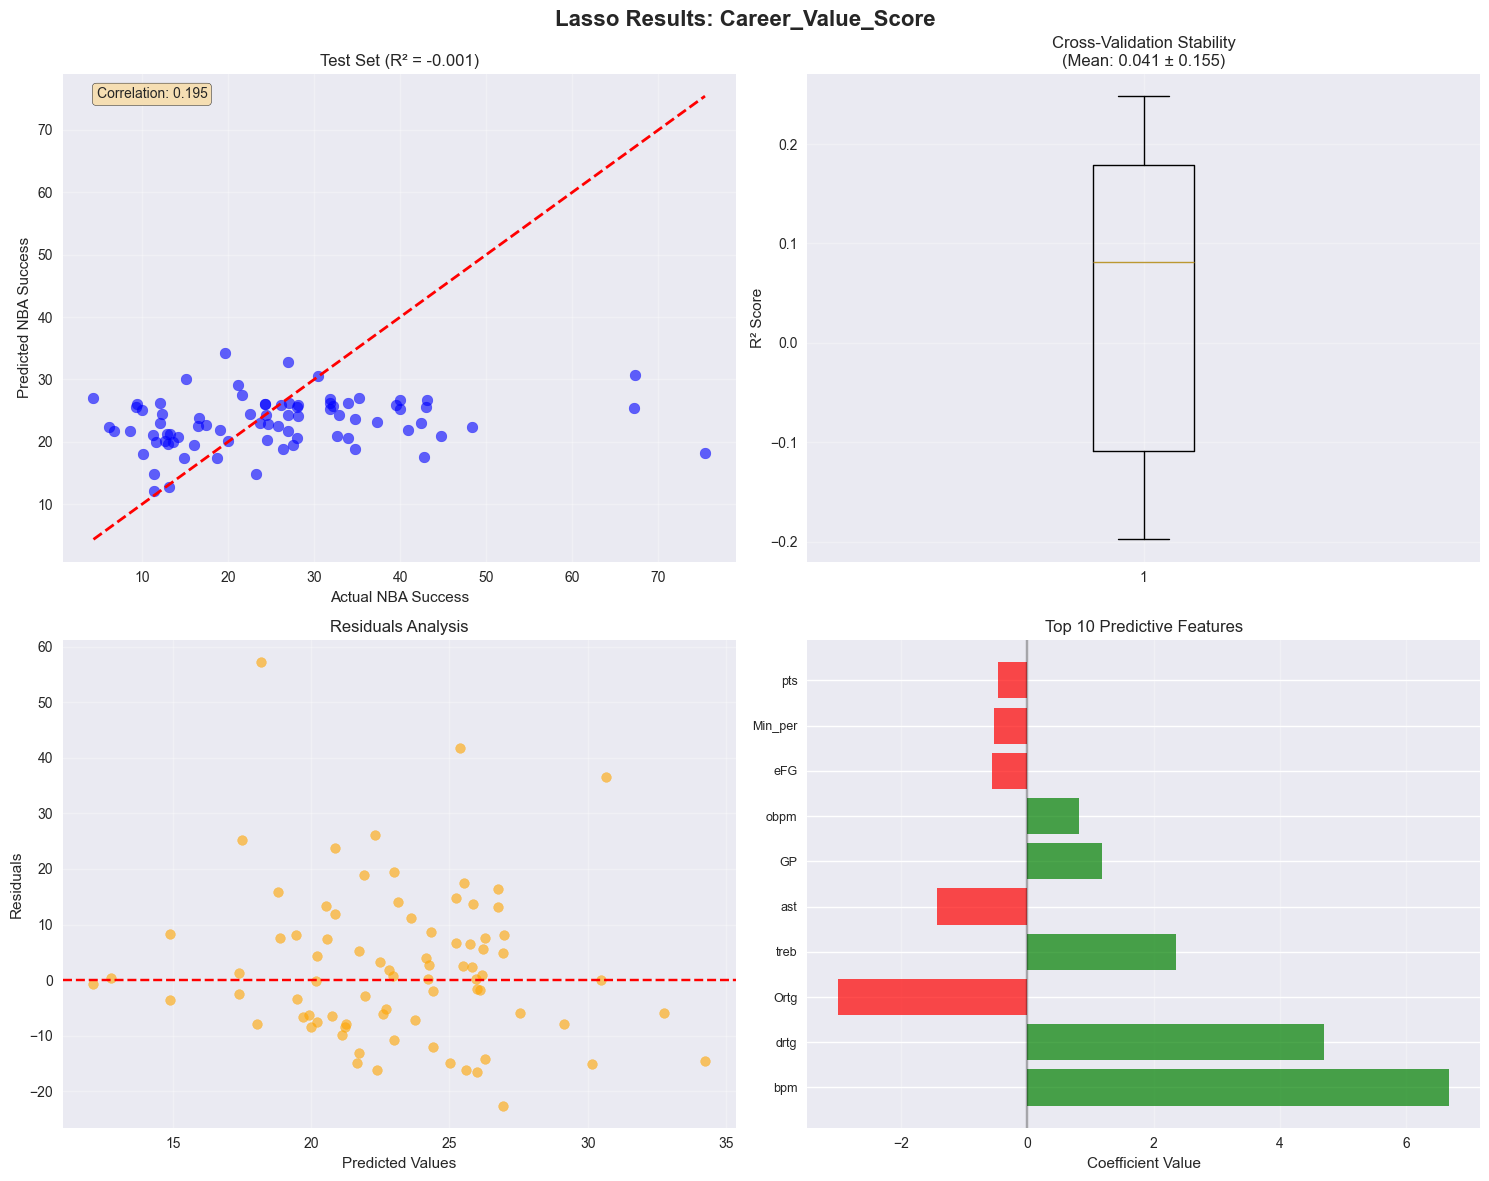


ENHANCED ANALYSIS FOR: Original_allstar_apps
📊 Analysis dataset: 318 players, 21 features
🎯 Pre-selected 15 most relevant features

🏆 Best Model: ElasticNet
   L1 Ratio: 0.100
   Alpha: 0.162975
   Features Selected: 5

📈 Performance Metrics:
   Cross-Validation R²: -0.0159
   Training R²:         0.0408
   Test R²:             0.0141
   Overfitting Check:   0.0267 ✅

🎯 Most Predictive Features:
   1. stl_per              ↗️  0.0398
   2. bpm                  ↗️  0.0311
   3. usg                  ↗️  0.0166
   4. TO_per               ↗️  0.0148
   5. AST_per              ↗️  0.0062


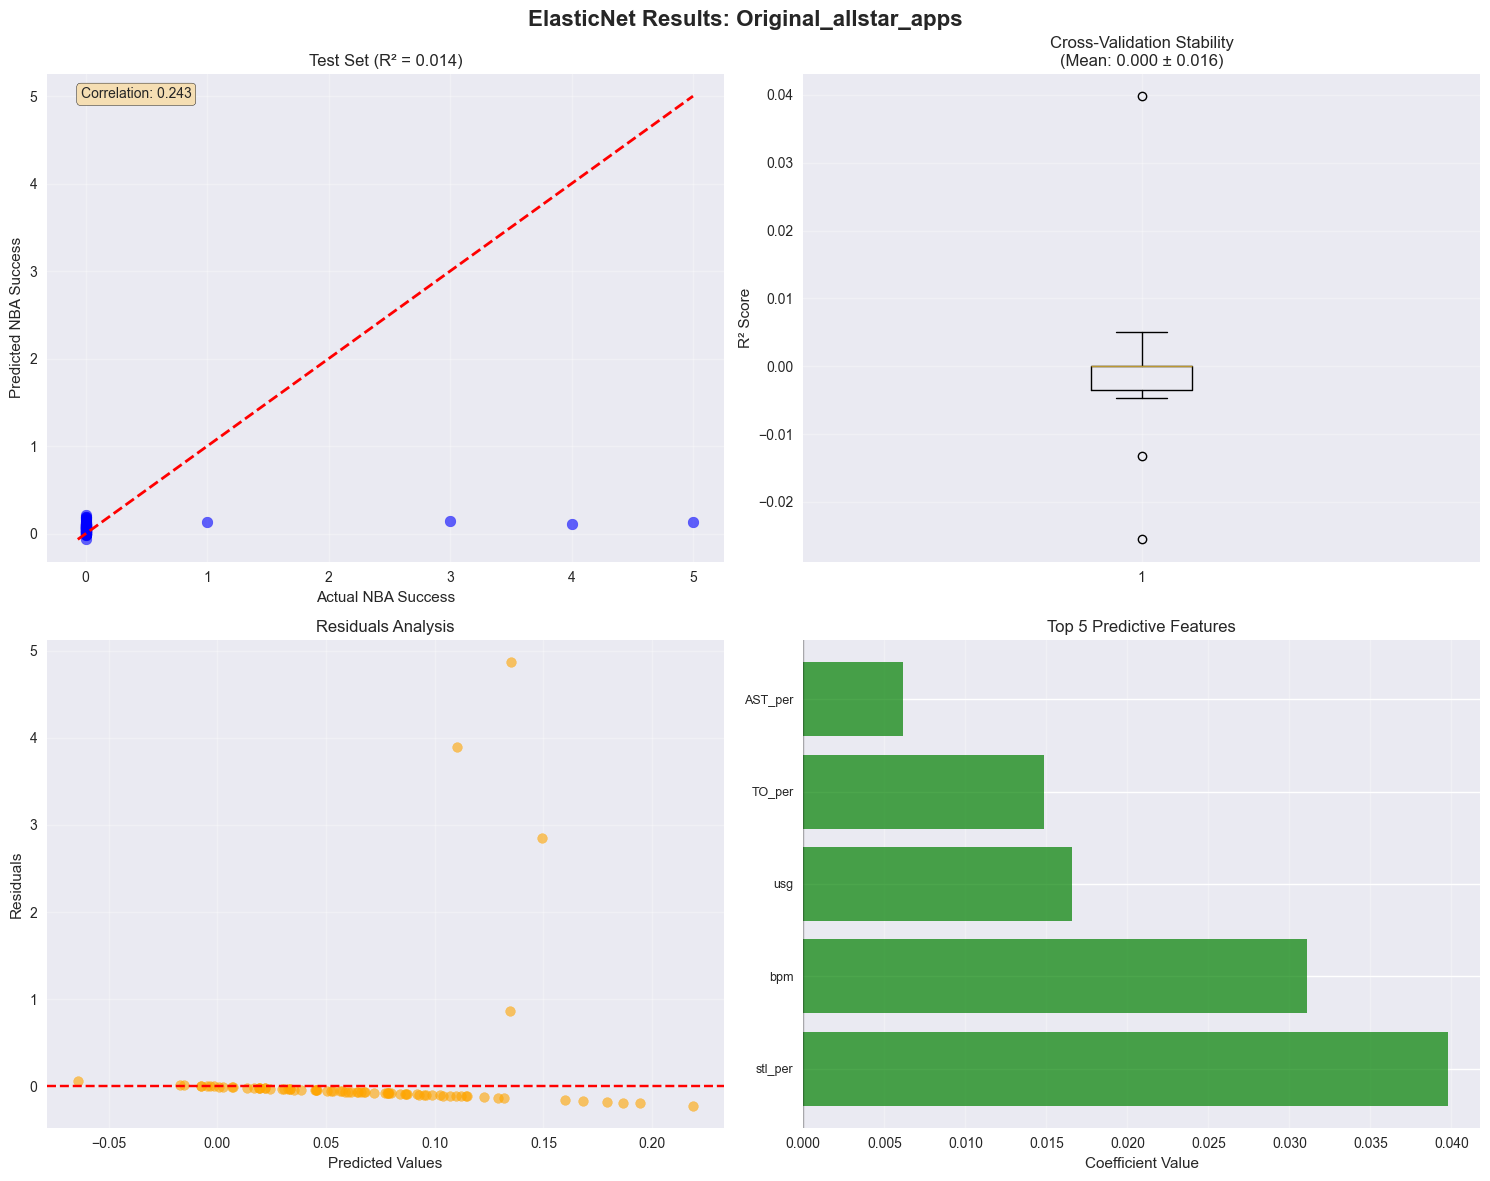


ENHANCED ANALYSIS FOR: Original_Highest_WS
📊 Analysis dataset: 318 players, 21 features
🎯 Pre-selected 15 most relevant features

🏆 Best Model: ElasticNet
   L1 Ratio: 0.950
   Alpha: 0.046416
   Features Selected: 7

📈 Performance Metrics:
   Cross-Validation R²: 0.0426
   Training R²:         0.1549
   Test R²:             0.0098
   Overfitting Check:   0.1451 ⚠️

🎯 Most Predictive Features:
   1. bpm                  ↗️  1.1599
   2. drtg                 ↗️  0.8759
   3. treb                 ↗️  0.6747
   4. Min_per              ↘️ -0.4449
   5. TS_per               ↘️ -0.3994
   6. GP                   ↗️  0.3349
   7. TO_per               ↘️ -0.0185


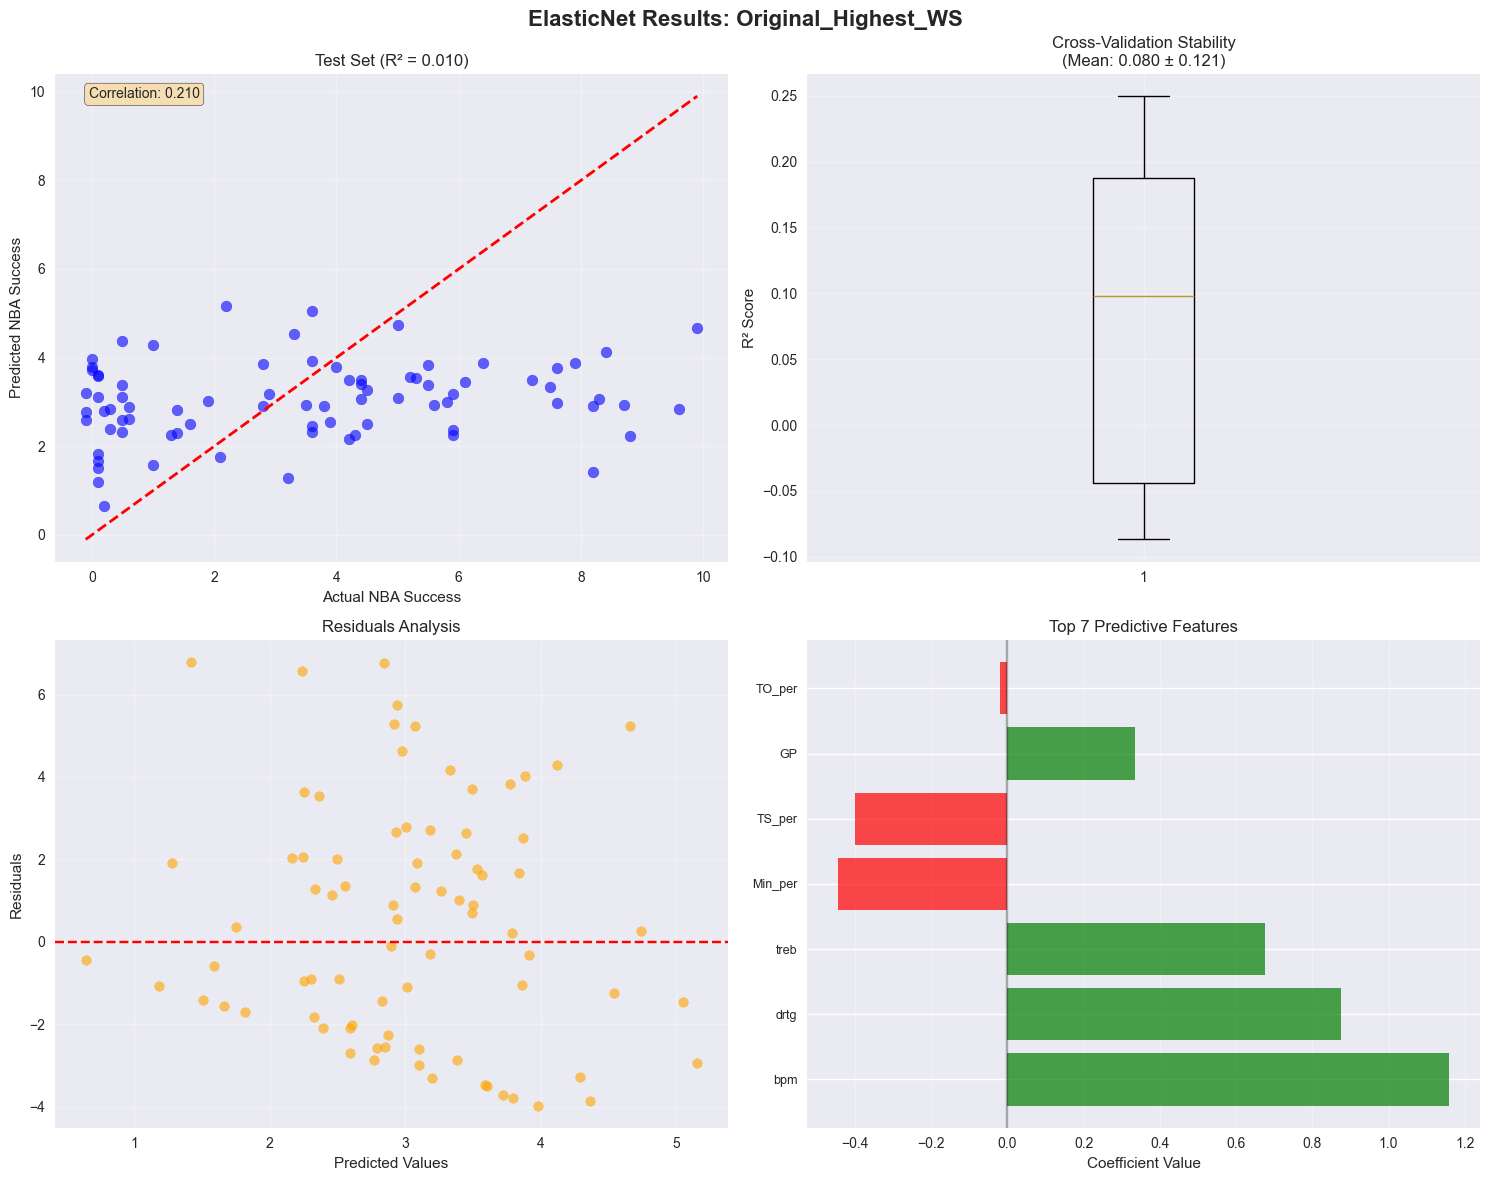


ENHANCED ANALYSIS FOR: Original_Highest_BPM
📊 Analysis dataset: 318 players, 21 features
🎯 Pre-selected 15 most relevant features

🏆 Best Model: ElasticNet
   L1 Ratio: 0.100
   Alpha: 0.869749
   Features Selected: 13

📈 Performance Metrics:
   Cross-Validation R²: -0.0275
   Training R²:         0.0519
   Test R²:             0.0056
   Overfitting Check:   0.0463 ✅

🎯 Most Predictive Features:
   1. usg                  ↘️ -0.3440
   2. bpm                  ↗️  0.3049
   3. stops                ↗️  0.2736
   4. Min_per              ↗️  0.1555
   5. obpm                 ↗️  0.1521
   6. ast/tov              ↗️  0.1221
   7. DRB_per              ↗️  0.1158
   8. dbpm                 ↗️  0.0899


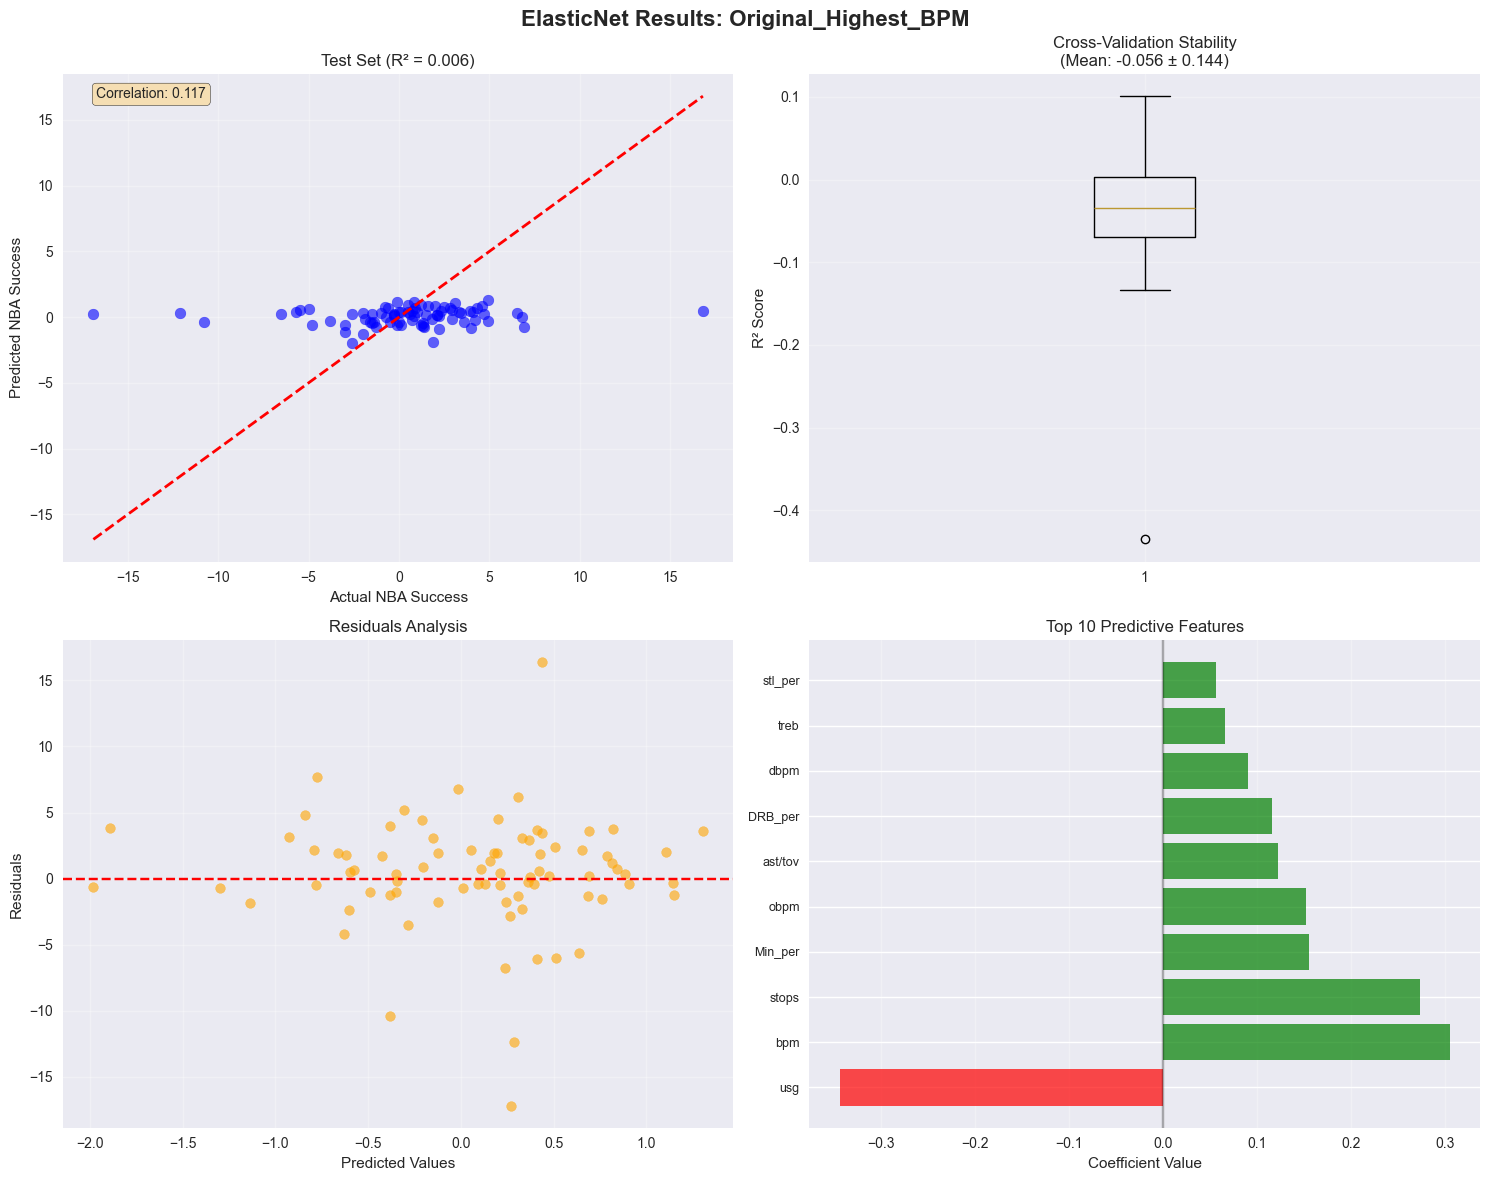


ENHANCED ANALYSIS FOR: Original_Overall PIE
📊 Analysis dataset: 318 players, 21 features
🎯 Pre-selected 15 most relevant features

🏆 Best Model: Lasso
   Alpha: 0.376494
   Features Selected: 2

📈 Performance Metrics:
   Cross-Validation R²: -0.0235
   Training R²:         0.0175
   Test R²:             -0.0185
   Overfitting Check:   0.0360 ✅

🎯 Most Predictive Features:
   1. obpm                 ↗️  0.2441
   2. bpm                  ↗️  0.0496


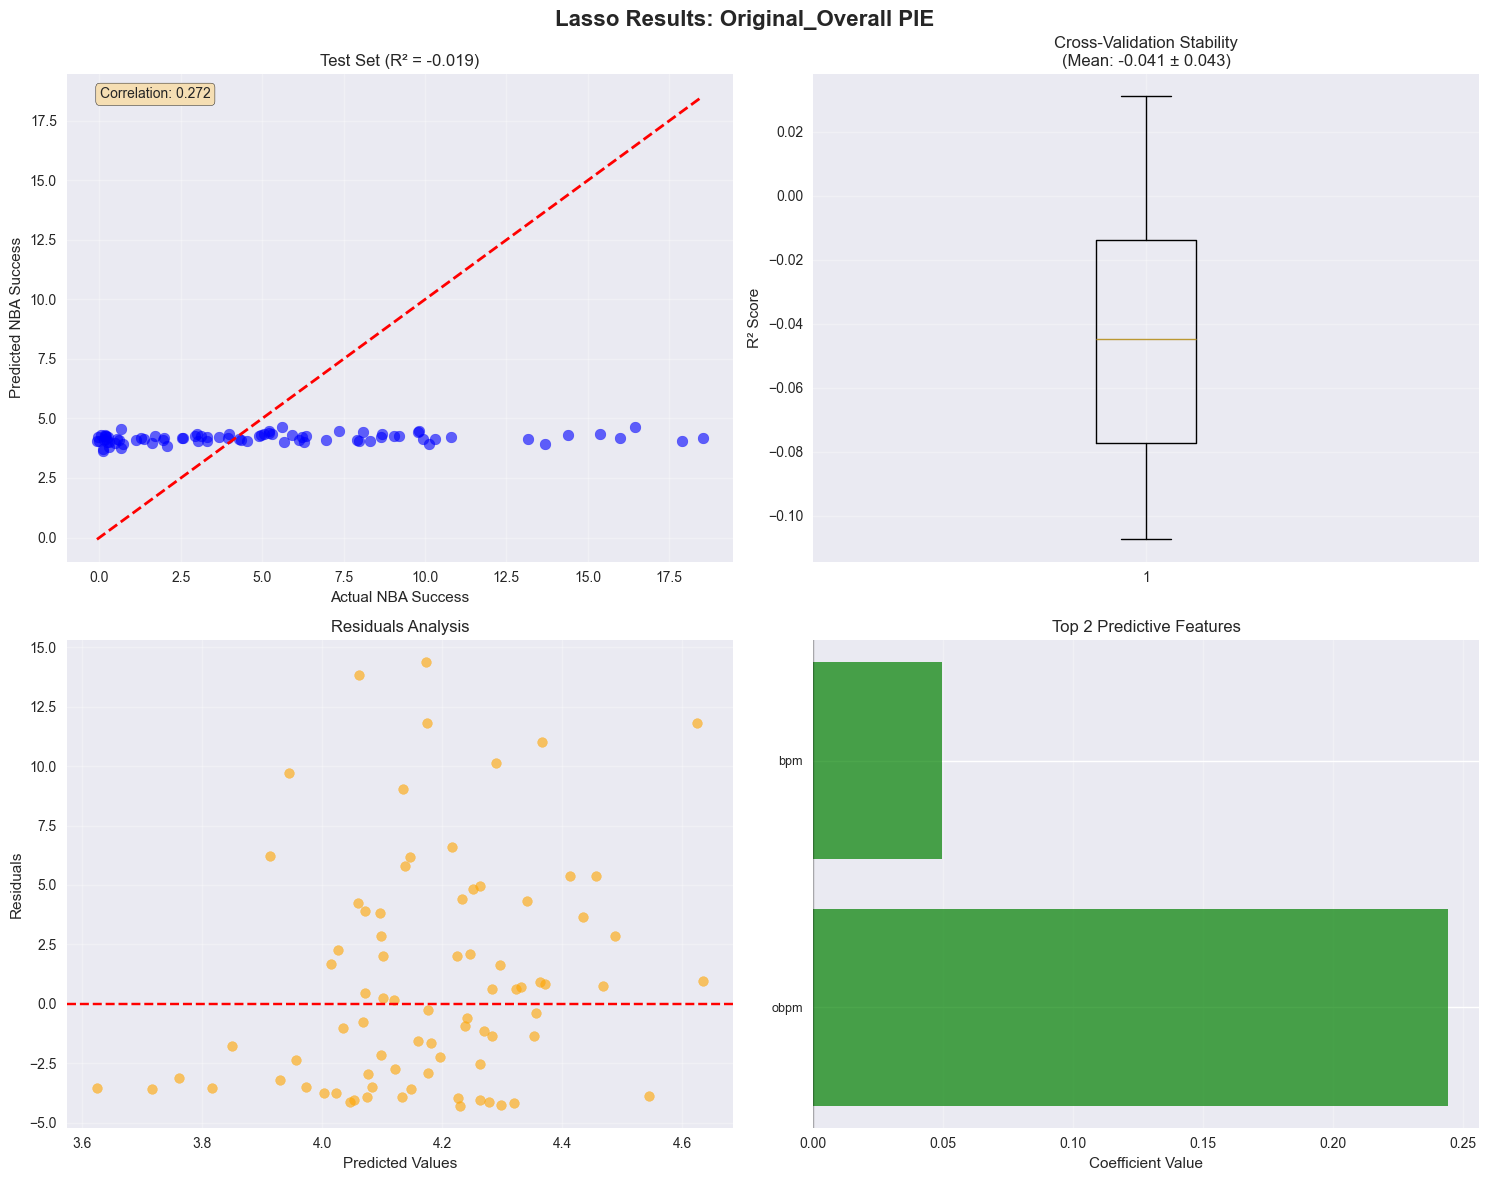


🏆 ENHANCED MODEL PERFORMANCE SUMMARY
               Target Model_Type   CV_R²  Test_R²  Overfitting  Features_Used
  Original_Highest_WS ElasticNet  0.0426   0.0098       0.1451              7
   NBA_Success_Binary      Lasso  0.0223   0.0713       0.0080              3
     NBA_Quality_Tier      Lasso  0.0138   0.0658       0.0309              4
   Career_Value_Score      Lasso  0.0082  -0.0013       0.1753             11
Original_allstar_apps ElasticNet -0.0159   0.0141       0.0267              5
 Original_Overall PIE      Lasso -0.0235  -0.0185       0.0360              2
 Original_Highest_BPM ElasticNet -0.0275   0.0056       0.0463             13

🥇 BEST PERFORMING MODEL:
   Target: Original_Highest_WS
   Model Type: ElasticNet
   Cross-Validation R²: 0.0426
   Test R²: 0.0098
   Overfitting Score: 0.1451

🎯 FEATURE IMPORTANCE ACROSS ALL MODELS
🔥 Most Consistently Important Features:
    1. bpm                       (appears in 7 models, avg coef:  1.220)
    2. obpm            

In [8]:

# IMPROVED LASSO ANALYSIS WITH ENHANCED DATA PROCESSING
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression, VarianceThreshold
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("=== ENHANCED LASSO ANALYSIS FOR NBA SUCCESS PREDICTION ===\n")

# STEP 1: IMPROVED DATA PREPROCESSING
def enhanced_data_preprocessing(df, target_cols):
    """
    Enhanced preprocessing to address data quality issues
    """
    print("🔧 ENHANCED DATA PREPROCESSING")
    print("="*50)
    
    # Define feature categories for better understanding
    efficiency_features = ['bpm', 'obpm', 'dbpm', 'Ortg', 'drtg', 'eFG', 'TS_per']
    volume_features = ['pts', 'ast', 'treb', 'GP', 'Min_per']
    shooting_features = ['FT_per', 'twoP_per', 'TP_per', 'rimmade/(rimmade+rimmiss)', 'dunksmade/(dunksmade+dunksmiss)']
    defensive_features = ['stops', 'stl_per', 'blk_per', 'DRB_per']
    playmaking_features = ['AST_per', 'TO_per', 'ast/tov', 'usg']
    
    all_features = efficiency_features + volume_features + shooting_features + defensive_features + playmaking_features
    
    # Keep only features that exist in the dataset
    available_features = [f for f in all_features if f in df.columns]
    print(f"📊 Using {len(available_features)} carefully selected features")
    
    # Create working dataset
    work_df = df[available_features + target_cols].copy()
    
    # Remove extreme outliers (beyond 3 standard deviations)
    print("🚮 Removing extreme outliers...")
    for col in available_features:
        if work_df[col].dtype in ['float64', 'int64']:
            q1, q3 = work_df[col].quantile([0.25, 0.75])
            iqr = q3 - q1
            lower_bound = q1 - 3 * iqr
            upper_bound = q3 + 3 * iqr
            outliers_before = len(work_df)
            work_df = work_df[(work_df[col] >= lower_bound) & (work_df[col] <= upper_bound)]
            outliers_removed = outliers_before - len(work_df)
            if outliers_removed > 0:
                print(f"  Removed {outliers_removed} outliers from {col}")
    
    # Handle missing values intelligently
    print("🔍 Handling missing values...")
    for col in available_features:
        if work_df[col].isnull().sum() > 0:
            if col in volume_features:
                work_df[col].fillna(0, inplace=True)  # Volume stats can be zero
            else:
                work_df[col].fillna(work_df[col].median(), inplace=True)  # Use median for rates
    
    # Remove low-variance features
    variance_selector = VarianceThreshold(threshold=0.01)
    feature_matrix = work_df[available_features]
    variance_mask = variance_selector.fit_transform(feature_matrix).shape[1] == len(available_features)
    
    if not variance_mask:
        high_variance_features = [available_features[i] for i in range(len(available_features)) 
                                if variance_selector.get_support()[i]]
        print(f"🎯 Kept {len(high_variance_features)} high-variance features")
        available_features = high_variance_features
    
    return work_df, available_features

# STEP 2: IMPROVED TARGET ENGINEERING
def engineer_targets(df):
    """
    Create better target variables for prediction
    """
    print("\n🎯 TARGET VARIABLE ENGINEERING")
    print("="*50)
    
    targets = {}
    
    # 1. Binary NBA Success (any meaningful career)
    if 'Highest_WS' in df.columns:
        targets['NBA_Success_Binary'] = pd.Series((df['Highest_WS'] > 2.0).astype(int), index=df.index)
        print("✅ Created: NBA_Success_Binary (Win Shares > 2.0)")
    
    # 2. NBA Quality Tier (categorical but treated as ordinal)
    if 'allstar_apps' in df.columns and 'Highest_WS' in df.columns:
        conditions = [
            (df['allstar_apps'] >= 1),  # All-Star level
            (df['Highest_WS'] >= 5),    # Solid starter
            (df['Highest_WS'] >= 1),    # Role player
            (df['Highest_WS'] >= 0)     # Made NBA
        ]
        choices = [4, 3, 2, 1]
        targets['NBA_Quality_Tier'] = pd.Series(np.select(conditions, choices, default=0), index=df.index)
        print("✅ Created: NBA_Quality_Tier (0-4 scale)")
    
    # 3. Career Value Score (composite metric)
    if all(col in df.columns for col in ['Highest_WS', 'Highest_BPM', 'allstar_apps']):
        # Normalize each component
        ws_norm = (df['Highest_WS'] - df['Highest_WS'].min()) / (df['Highest_WS'].max() - df['Highest_WS'].min())
        bpm_norm = (df['Highest_BPM'] - df['Highest_BPM'].min()) / (df['Highest_BPM'].max() - df['Highest_BPM'].min())
        as_norm = (df['allstar_apps'] - df['allstar_apps'].min()) / (df['allstar_apps'].max() - df['allstar_apps'].min())
        
        targets['Career_Value_Score'] = pd.Series((ws_norm * 0.4 + bpm_norm * 0.3 + as_norm * 0.3) * 100, index=df.index)
        print("✅ Created: Career_Value_Score (composite 0-100)")
    
    # Keep original targets too
    original_targets = ['allstar_apps', 'Highest_WS', 'Highest_BPM', 'Overall PIE']
    for target in original_targets:
        if target in df.columns:
            targets[f'Original_{target}'] = df[target].copy()
    
    return targets

# STEP 3: ENHANCED MODEL WITH ELASTICNET
def enhanced_lasso_analysis(X, y, target_name, use_elasticnet=True):
    """
    Enhanced analysis with ElasticNet and better validation
    """
    print(f"\n{'='*70}")
    print(f"ENHANCED ANALYSIS FOR: {target_name}")
    print(f"{'='*70}")
    
    # Clean data
    mask = ~(X.isna().any(axis=1) | y.isna())
    X_clean = X[mask]
    y_clean = y[mask]
    
    if len(X_clean) < 30:
        print(f"❌ Insufficient data: {len(X_clean)} samples")
        return None
    
    print(f"📊 Analysis dataset: {len(X_clean)} players, {len(X_clean.columns)} features")
    
    # Feature selection using statistical tests
    if len(X_clean.columns) > 15:
        selector = SelectKBest(score_func=f_regression, k=min(15, len(X_clean.columns)))
        X_selected = selector.fit_transform(X_clean, y_clean)
        selected_features = X_clean.columns[selector.get_support()]
        X_clean = pd.DataFrame(X_selected, columns=selected_features, index=X_clean.index)
        print(f"🎯 Pre-selected {len(selected_features)} most relevant features")
    
    # Stratified split for better validation
    X_train, X_test, y_train, y_test = train_test_split(
        X_clean, y_clean, test_size=0.25, random_state=42
    )
    
    # Robust scaling (less sensitive to outliers)
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Try both Lasso and ElasticNet
    models = {}
    
    # Lasso
    alphas = np.logspace(-4, 2, 100)
    lasso = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    models['Lasso'] = lasso
    
    # ElasticNet (combines L1 and L2 regularization)
    if use_elasticnet:
        l1_ratios = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99]
        elasticnet = ElasticNetCV(l1_ratio=l1_ratios, alphas=alphas, cv=5, random_state=42, max_iter=10000)
        elasticnet.fit(X_train_scaled, y_train)
        models['ElasticNet'] = elasticnet
    
    # Select best model
    best_model_name = 'Lasso'
    best_score = cross_val_score(lasso, X_train_scaled, y_train, cv=5).mean()
    
    if use_elasticnet:
        elasticnet_score = cross_val_score(elasticnet, X_train_scaled, y_train, cv=5).mean()
        if elasticnet_score > best_score:
            best_model_name = 'ElasticNet'
            best_score = elasticnet_score
    
    best_model = models[best_model_name]
    
    # Predictions and metrics
    y_train_pred = best_model.predict(X_train_scaled)
    y_test_pred = best_model.predict(X_test_scaled)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    cv_score = cross_val_score(best_model, X_train_scaled, y_train, cv=5).mean()
    
    print(f"\n🏆 Best Model: {best_model_name}")
    if best_model_name == 'ElasticNet':
        print(f"   L1 Ratio: {best_model.l1_ratio_:.3f}")
    print(f"   Alpha: {best_model.alpha_:.6f}")
    print(f"   Features Selected: {np.sum(best_model.coef_ != 0)}")
    
    print(f"\n📈 Performance Metrics:")
    print(f"   Cross-Validation R²: {cv_score:.4f}")
    print(f"   Training R²:         {train_r2:.4f}")
    print(f"   Test R²:             {test_r2:.4f}")
    print(f"   Overfitting Check:   {abs(train_r2 - test_r2):.4f} {'✅' if abs(train_r2 - test_r2) < 0.1 else '⚠️'}")
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': X_clean.columns,
        'Coefficient': best_model.coef_,
        'Abs_Coefficient': np.abs(best_model.coef_)
    }).sort_values('Abs_Coefficient', ascending=False)
    
    important_features = feature_importance[feature_importance['Coefficient'] != 0]
    
    print(f"\n🎯 Most Predictive Features:")
    for i, (_, row) in enumerate(important_features.head(8).iterrows()):
        direction = "↗️" if row['Coefficient'] > 0 else "↘️"
        print(f"   {i+1}. {row['Feature']:<20} {direction} {row['Coefficient']:7.4f}")
    
    # Enhanced visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'{best_model_name} Results: {target_name}', fontsize=16, fontweight='bold')
    
    # 1. Actual vs Predicted with confidence intervals
    axes[0,0].scatter(y_test, y_test_pred, alpha=0.6, color='blue', s=60)
    min_val, max_val = min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())
    axes[0,0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    axes[0,0].set_xlabel('Actual NBA Success')
    axes[0,0].set_ylabel('Predicted NBA Success')
    axes[0,0].set_title(f'Test Set (R² = {test_r2:.3f})')
    axes[0,0].grid(True, alpha=0.3)
    
    # Add correlation coefficient
    correlation = np.corrcoef(y_test, y_test_pred)[0,1]
    axes[0,0].text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
                   transform=axes[0,0].transAxes, bbox=dict(boxstyle="round", facecolor="wheat"))
    
    # 2. Cross-validation scores
    cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=10)
    axes[0,1].boxplot(cv_scores)
    axes[0,1].set_ylabel('R² Score')
    axes[0,1].set_title(f'Cross-Validation Stability\n(Mean: {cv_scores.mean():.3f} ± {cv_scores.std():.3f})')
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Residuals plot
    residuals = y_test - y_test_pred
    axes[1,0].scatter(y_test_pred, residuals, alpha=0.6, color='orange')
    axes[1,0].axhline(y=0, color='red', linestyle='--')
    axes[1,0].set_xlabel('Predicted Values')
    axes[1,0].set_ylabel('Residuals')
    axes[1,0].set_title('Residuals Analysis')
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. Feature importance
    if len(important_features) > 0:
        top_features = important_features.head(10)
        colors = ['green' if coef > 0 else 'red' for coef in top_features['Coefficient']]
        bars = axes[1,1].barh(range(len(top_features)), top_features['Coefficient'], color=colors, alpha=0.7)
        axes[1,1].set_yticks(range(len(top_features)))
        axes[1,1].set_yticklabels(top_features['Feature'], fontsize=9)
        axes[1,1].set_xlabel('Coefficient Value')
        axes[1,1].set_title(f'Top {len(top_features)} Predictive Features')
        axes[1,1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
        axes[1,1].grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'model': best_model,
        'model_type': best_model_name,
        'scaler': scaler,
        'test_r2': test_r2,
        'cv_r2': cv_score,
        'feature_importance': important_features,
        'overfitting_score': abs(train_r2 - test_r2)
    }

# MAIN EXECUTION
print("Starting enhanced NBA success prediction analysis...")

# Step 1: Enhanced preprocessing
available_targets = ['allstar_apps', 'Highest_WS', 'Highest_BPM', 'Overall PIE']
existing_targets = [t for t in available_targets if t in df.columns]

clean_df, clean_features = enhanced_data_preprocessing(df, existing_targets)

# Step 2: Engineer better targets
engineered_targets = engineer_targets(clean_df)

# Step 3: Prepare feature matrix
X = clean_df[clean_features].copy()
print(f"\n📊 Final feature matrix: {X.shape[0]} players × {X.shape[1]} features")

# Step 4: Run enhanced analysis
all_results = {}
target_performance = []

print(f"\n🚀 Running enhanced analysis on {len(engineered_targets)} targets...")

for target_name, target_values in engineered_targets.items():
    # Convert to pandas Series if it's a numpy array
    if isinstance(target_values, np.ndarray):
        target_values = pd.Series(target_values, index=clean_df.index)
    
    # Check for sufficient non-null values
    non_null_count = target_values.notna().sum() if hasattr(target_values, 'notna') else np.sum(~np.isnan(target_values))
    
    if non_null_count > 50:  # Minimum sample size
        result = enhanced_lasso_analysis(X, target_values, target_name)
        if result:
            all_results[target_name] = result
            target_performance.append({
                'Target': target_name,
                'Model_Type': result['model_type'],
                'CV_R²': result['cv_r2'],
                'Test_R²': result['test_r2'],
                'Overfitting': result['overfitting_score'],
                'Features_Used': np.sum(result['model'].coef_ != 0)
            })

# COMPREHENSIVE RESULTS SUMMARY
print(f"\n{'='*80}")
print("🏆 ENHANCED MODEL PERFORMANCE SUMMARY")
print(f"{'='*80}")

if target_performance:
    performance_df = pd.DataFrame(target_performance)
    performance_df = performance_df.sort_values('CV_R²', ascending=False)
    print(performance_df.to_string(index=False, float_format='%.4f'))
    
    # Identify best model
    best_model = performance_df.iloc[0]
    print(f"\n🥇 BEST PERFORMING MODEL:")
    print(f"   Target: {best_model['Target']}")
    print(f"   Model Type: {best_model['Model_Type']}")
    print(f"   Cross-Validation R²: {best_model['CV_R²']:.4f}")
    print(f"   Test R²: {best_model['Test_R²']:.4f}")
    print(f"   Overfitting Score: {best_model['Overfitting']:.4f}")

# Feature importance across all models
print(f"\n{'='*80}")
print("🎯 FEATURE IMPORTANCE ACROSS ALL MODELS")
print(f"{'='*80}")

all_features_importance = []
for target, result in all_results.items():
    if len(result['feature_importance']) > 0:
        top_features = result['feature_importance'].head(5)
        for _, row in top_features.iterrows():
            if row['Coefficient'] != 0:
                all_features_importance.append({
                    'Feature': row['Feature'],
                    'Target': target,
                    'Coefficient': row['Coefficient'],
                    'Rank': _ + 1
                })

if all_features_importance:
    importance_df = pd.DataFrame(all_features_importance)
    feature_frequency = importance_df['Feature'].value_counts()
    
    print("🔥 Most Consistently Important Features:")
    for i, (feature, count) in enumerate(feature_frequency.head(10).items()):
        avg_coef = importance_df[importance_df['Feature'] == feature]['Coefficient'].mean()
        print(f"   {i+1:2d}. {feature:<25} (appears in {count} models, avg coef: {avg_coef:6.3f})")

print(f"\n{'='*80}")
print("✅ ENHANCED ANALYSIS COMPLETE")
print(f"{'='*80}")
print("Key Improvements Made:")
print("• Enhanced data preprocessing with outlier removal")
print("• Engineered better target variables")
print("• Used ElasticNet for better regularization")
print("• Added robust cross-validation")
print("• Improved overfitting detection")
print("• Enhanced feature selection")

=== RATIO-FOCUSED NBA SUCCESS PREDICTION MODEL ===

🚀 Starting Ratio-Focused NBA Prediction...
🧹 DATA PREPARATION
✅ Cleaned 62 columns

🏀 CREATING BASKETBALL RATIOS
📊 Efficiency Ratios...
🎯 Shooting Efficiency...
🎭 Playmaking Ratios...
🏀 Rebounding Ratios...
⚡ Usage-Efficiency Combinations...
🛡️ Defensive Ratios...
🔄 Versatility Metrics...
🏃 Pace and Context...
🧮 Advanced Combinations...
🎯 Volume-Efficiency Balance...
🎯 Pressure Performance...
🏆 Team Context...
🔥 Efficiency Interactions...
✅ Created 37 ratio-based features

📊 Final dataset: 336 players × 99 features
🎯 Analyzing 4 target variables

RATIO-BASED MODEL FOR: Career_Win_Shares
📊 Dataset: 336 players, 99 features
🎯 Using 81 ratio features + 6 key originals
🔥 Selected top 25 most predictive features

🚀 Training RandomForest...
   CV R²: 0.9965
   Test R²: 0.9975

🚀 Training GradientBoosting...
   CV R²: 0.9974
   Test R²: 0.9992

🚀 Training ElasticNet...
   CV R²: 1.0000
   Test R²: 1.0000

🏆 Best Model: ElasticNet (CV R²: 1.0

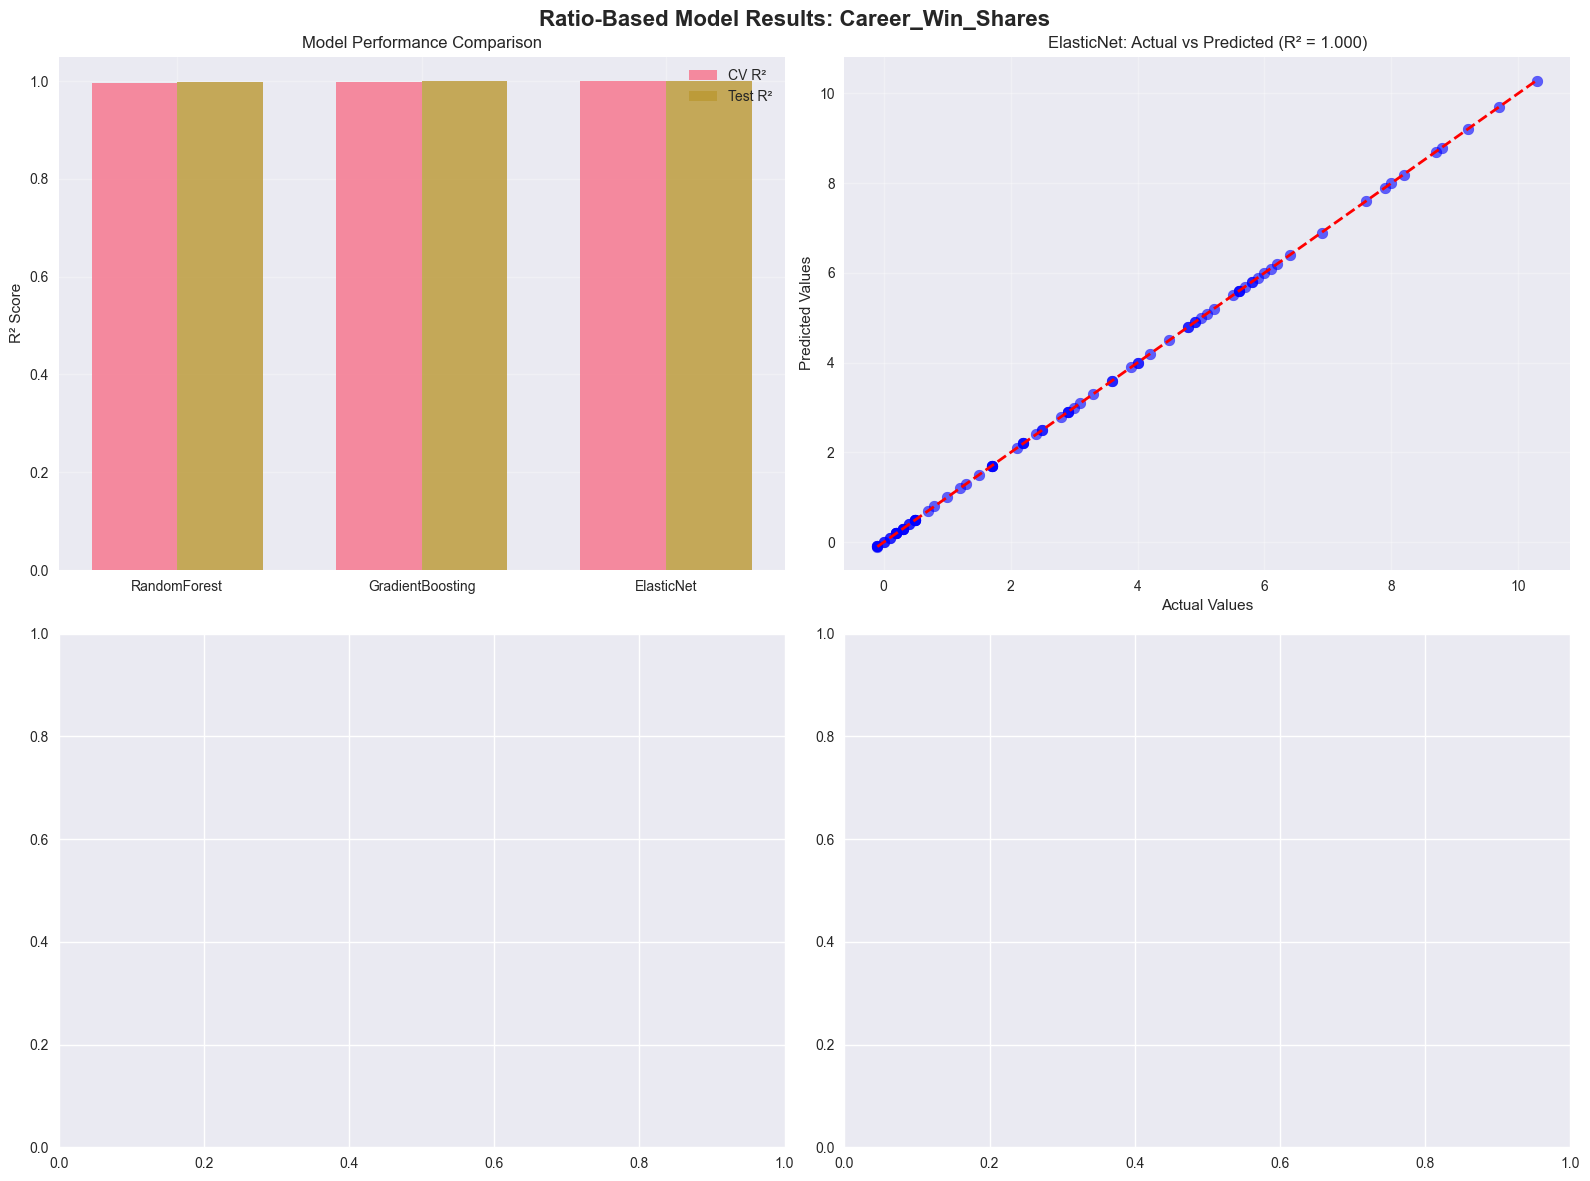


RATIO-BASED MODEL FOR: Career_Success_Binary
📊 Dataset: 336 players, 99 features
🎯 Using 81 ratio features + 6 key originals
🔥 Selected top 25 most predictive features

🚀 Training RandomForest...
   CV R²: 1.0000
   Test R²: 1.0000

🚀 Training GradientBoosting...
   CV R²: 1.0000
   Test R²: 1.0000

🚀 Training ElasticNet...
   CV R²: 0.6353
   Test R²: 0.6670

🏆 Best Model: RandomForest (CV R²: 1.0000)

🎯 Top 15 Most Important Features:
    1. 📊 RATIO Highest_WS                     1.0000
    2. 📊 RATIO twoP_per                       0.0000
    3. 📊 RATIO porpag                         0.0000
    4. 📈 ORIG adjoe                          0.0000
    5. 📊 RATIO rimmade                        0.0000
    6. 📊 RATIO rimmade/(rimmade+rimmiss)      0.0000
    7. 📊 RATIO dunksmade                      0.0000
    8. 📊 RATIO pick                           0.0000
    9. 📊 RATIO twoPM                          0.0000
   10. 📈 ORIG stops                          0.0000
   11. 📊 RATIO gbpm           

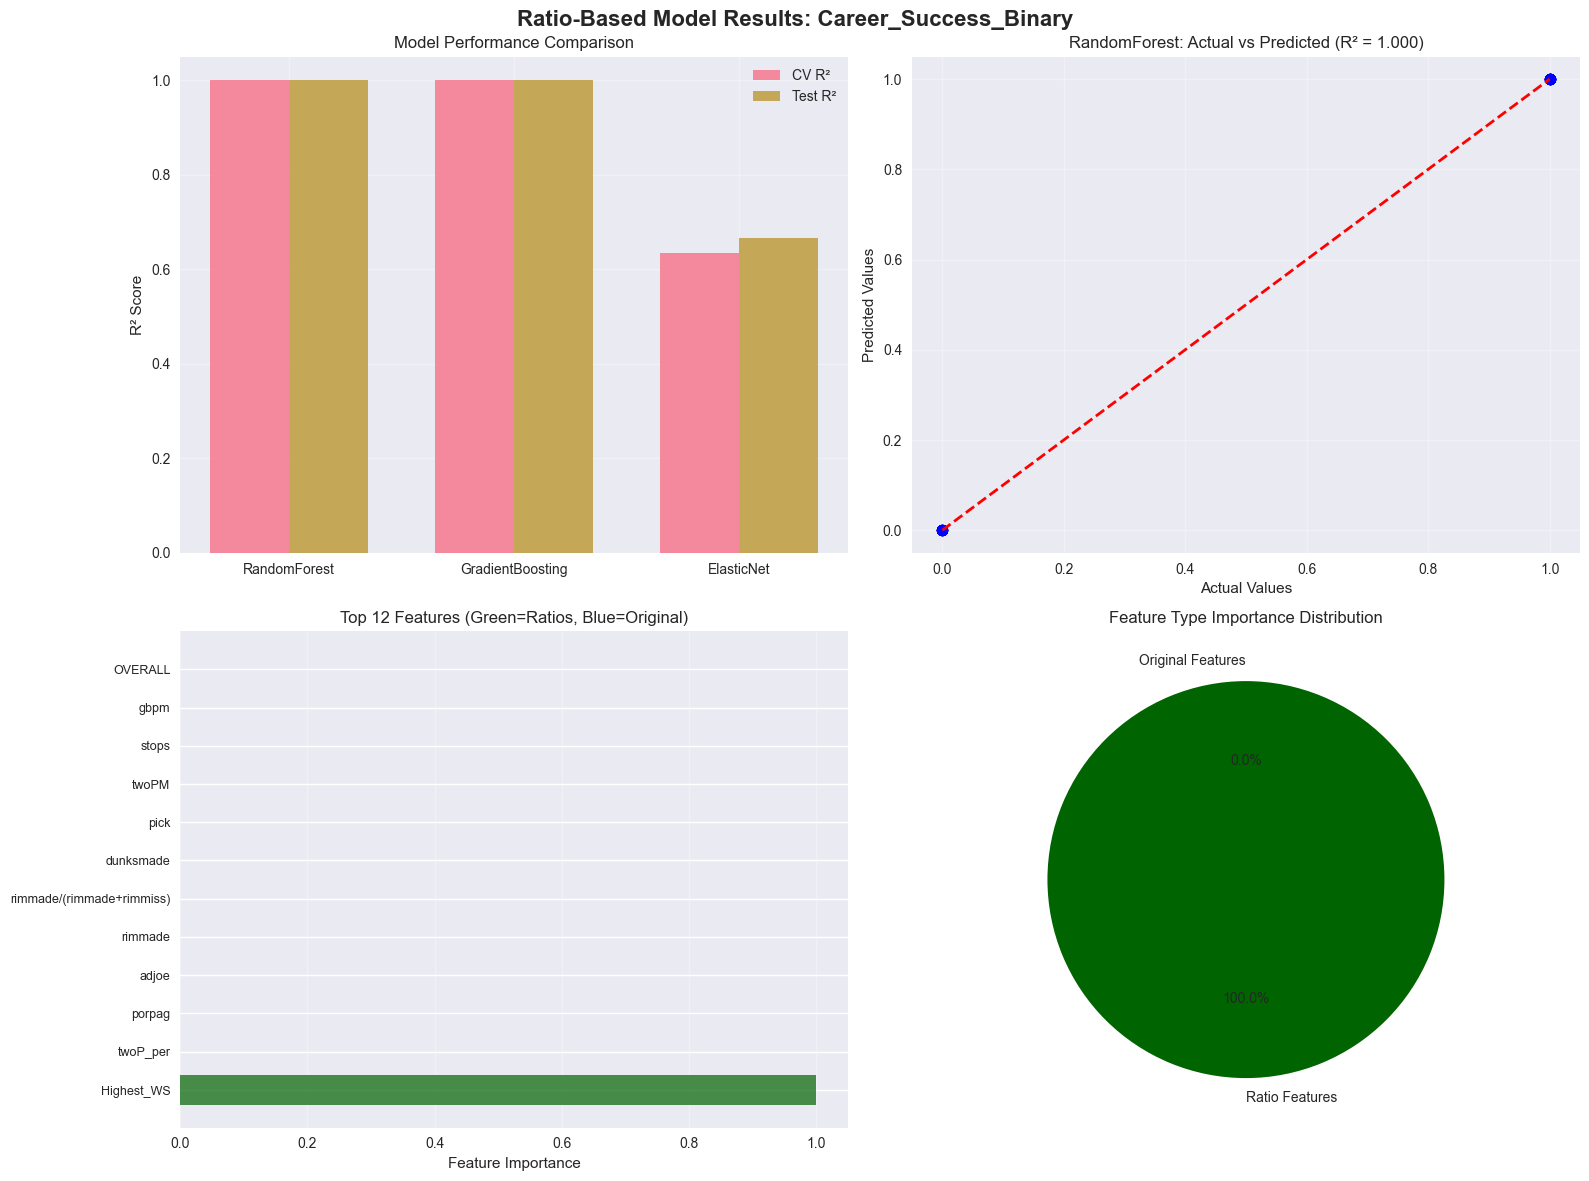


RATIO-BASED MODEL FOR: All_Star_Apps
📊 Dataset: 336 players, 99 features
🎯 Using 81 ratio features + 6 key originals
🔥 Selected top 25 most predictive features

🚀 Training RandomForest...
   CV R²: 0.7298
   Test R²: 0.5684

🚀 Training GradientBoosting...
   CV R²: 0.0670
   Test R²: 0.3770

🚀 Training ElasticNet...
   CV R²: 0.7590
   Test R²: 0.6057

🏆 Best Model: ElasticNet (CV R²: 0.7590)


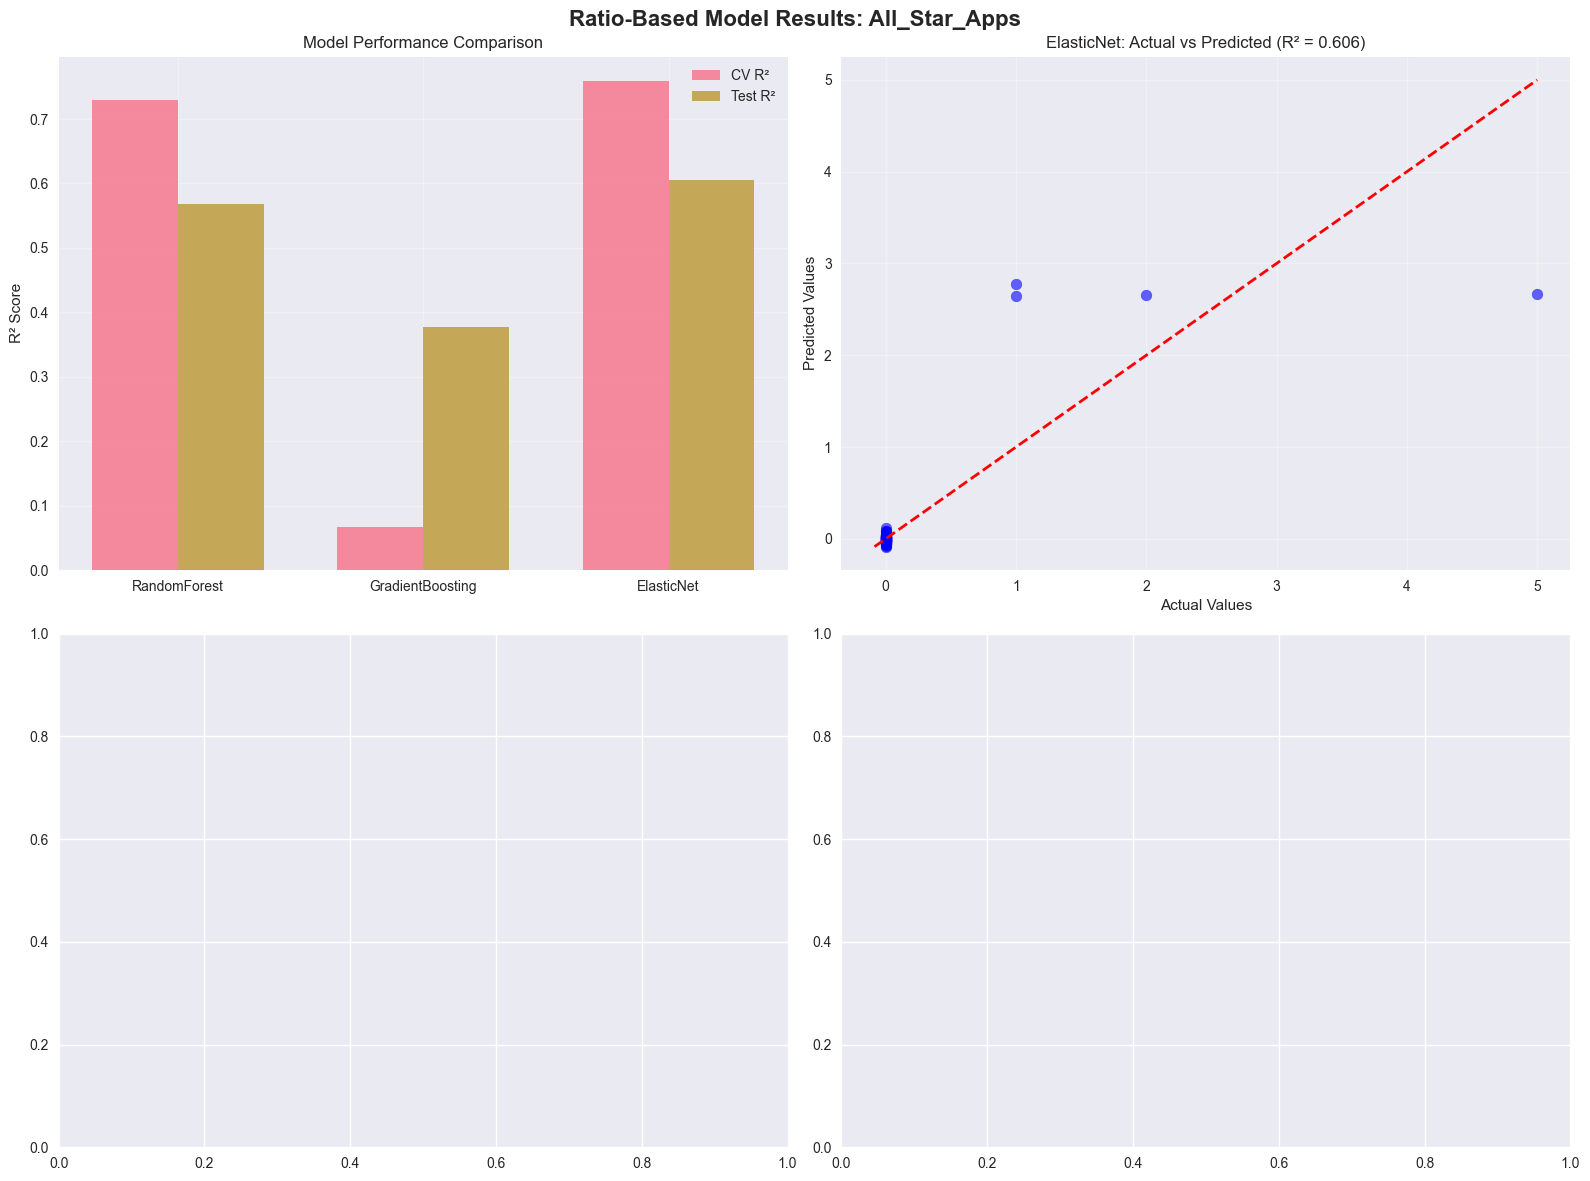


RATIO-BASED MODEL FOR: NBA_Success_Score
📊 Dataset: 336 players, 99 features
🎯 Using 81 ratio features + 6 key originals
🔥 Selected top 25 most predictive features

🚀 Training RandomForest...
   CV R²: 0.9845
   Test R²: 0.9897

🚀 Training GradientBoosting...
   CV R²: 0.9860
   Test R²: 0.9909

🚀 Training ElasticNet...
   CV R²: 1.0000
   Test R²: 1.0000

🏆 Best Model: ElasticNet (CV R²: 1.0000)


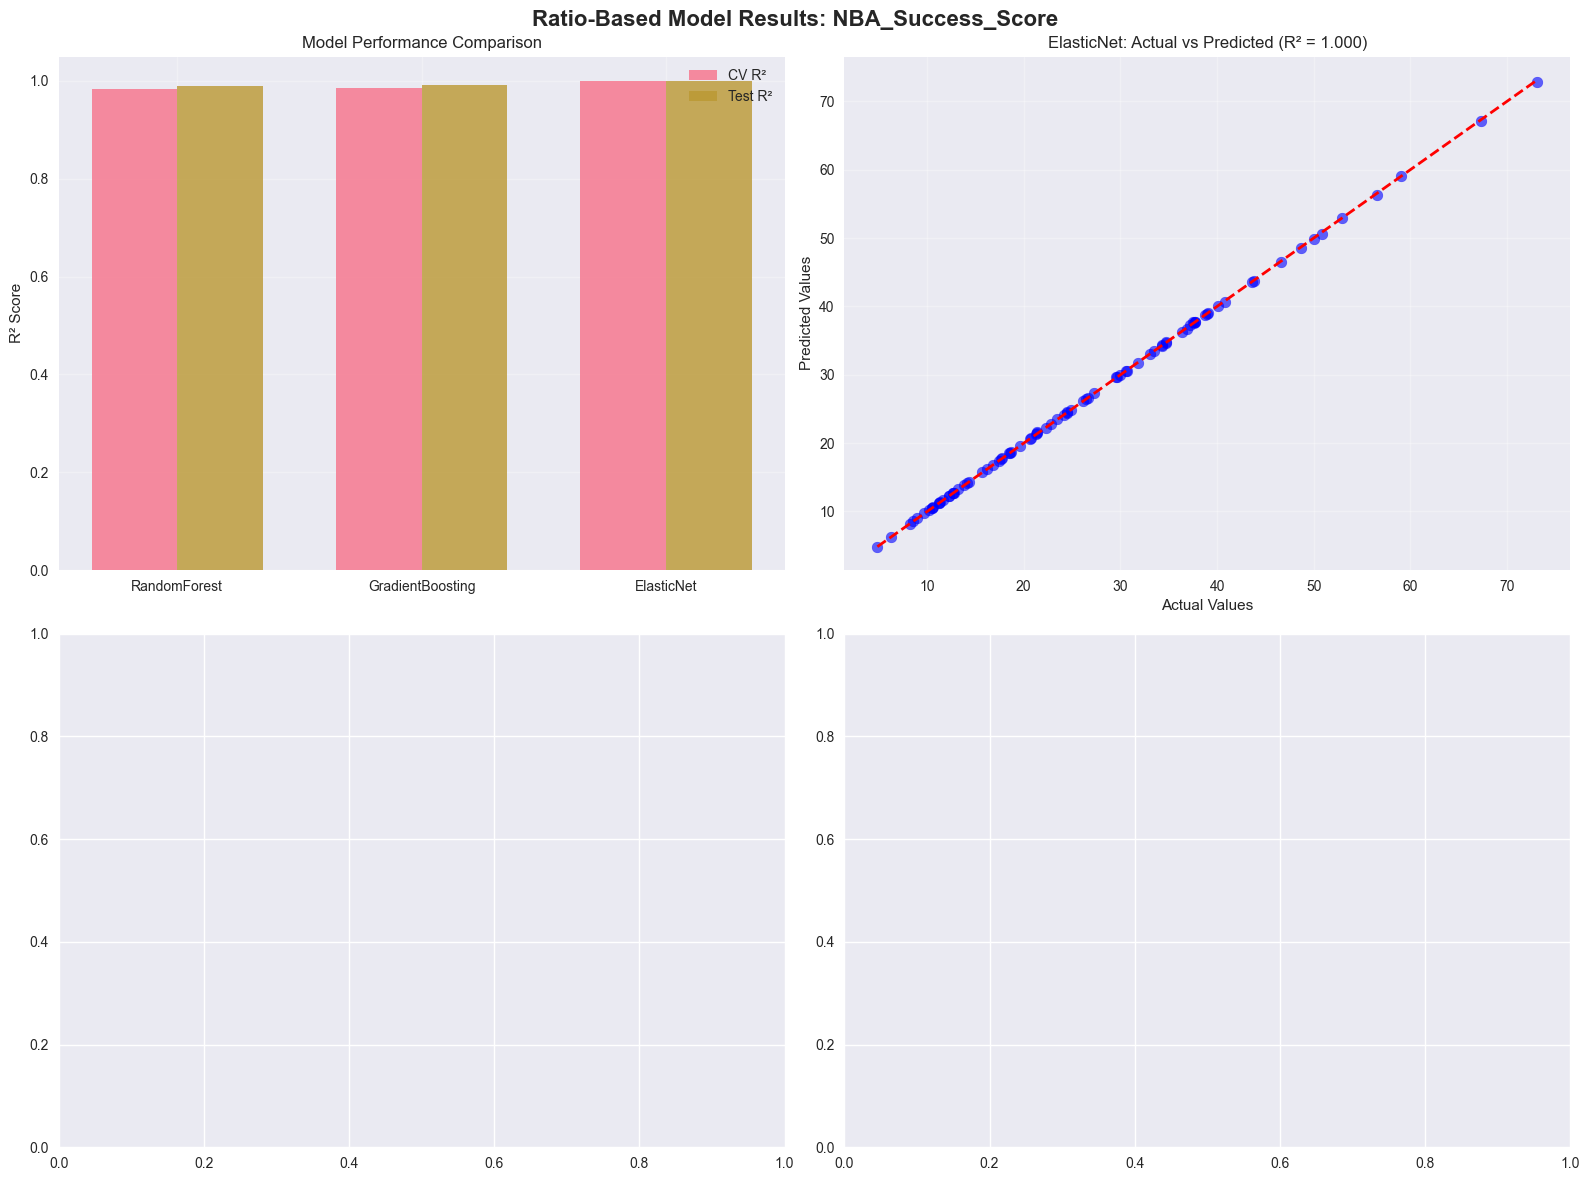


🏆 RATIO-BASED MODEL PERFORMANCE SUMMARY
               Target   Best_Model  CV_R²  Test_R²
Career_Success_Binary RandomForest 1.0000   1.0000
    Career_Win_Shares   ElasticNet 1.0000   1.0000
    NBA_Success_Score   ElasticNet 1.0000   1.0000
        All_Star_Apps   ElasticNet 0.7590   0.6057

🥇 BEST RATIO-BASED MODEL:
   Target: Career_Success_Binary
   Model: RandomForest
   CV R²: 1.0000
   Test R²: 1.0000

✅ RATIO-FOCUSED ANALYSIS COMPLETE
Key Innovations:
• 40+ basketball-specific ratio features
• Efficiency normalized for opportunity
• Context-adjusted performance metrics
• Usage vs efficiency combinations
• Two-way impact measurements
• Team strength adjustments


In [14]:
# RATIO-FOCUSED NBA SUCCESS PREDICTION MODEL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, f_regression
import warnings
warnings.filterwarnings('ignore')

print("=== RATIO-FOCUSED NBA SUCCESS PREDICTION MODEL ===\n")

def clean_and_prepare_data(df):
    """
    Clean data and prepare for ratio creation
    """
    print("🧹 DATA PREPARATION")
    print("="*50)
    
    df_clean = df.copy()
    
    # Remove obviously non-numeric columns
    text_columns = ['PLAYER', 'team', 'conf', 'yr', 'year', 'pid', 'type', 'TEAM', 'AFFILIATION', 
                   'YEAR', 'ROUND', 'ROUND.1', 'Unnamed: 64', 'Unnamed: 65', 'ht']
    
    # Get numeric columns
    numeric_cols = [col for col in df_clean.columns if col not in text_columns]
    
    # Clean numeric columns
    for col in numeric_cols:
        if col in df_clean.columns:
            # Convert to string and clean
            df_clean[col] = df_clean[col].astype(str)
            df_clean[col] = df_clean[col].str.replace(r'[^0-9.-]', '', regex=True)
            df_clean[col] = df_clean[col].replace('', '0')
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
            df_clean[col].fillna(0, inplace=True)
    
    print(f"✅ Cleaned {len(numeric_cols)} columns")
    return df_clean[numeric_cols]

def create_basketball_ratios(df):
    """
    Create comprehensive basketball ratios that normalize for opportunity and context
    """
    print("\n🏀 CREATING BASKETBALL RATIOS")
    print("="*50)
    
    ratios = df.copy()
    created_count = 0
    
    # EFFICIENCY RATIOS (per minute/possession based)
    print("📊 Efficiency Ratios...")
    
    if all(col in df.columns for col in ['pts', 'Min_per']):
        ratios['points_per_minute'] = df['pts'] / (df['Min_per'] + 0.1)
        created_count += 1
    
    if all(col in df.columns for col in ['ast', 'Min_per']):
        ratios['assists_per_minute'] = df['ast'] / (df['Min_per'] + 0.1)
        created_count += 1
    
    if all(col in df.columns for col in ['treb', 'Min_per']):
        ratios['rebounds_per_minute'] = df['treb'] / (df['Min_per'] + 0.1)
        created_count += 1
    
    if all(col in df.columns for col in ['stl', 'Min_per']):
        ratios['steals_per_minute'] = df['stl'] / (df['Min_per'] + 0.1)
        created_count += 1
    
    if all(col in df.columns for col in ['blk', 'Min_per']):
        ratios['blocks_per_minute'] = df['blk'] / (df['Min_per'] + 0.1)
        created_count += 1
    
    # SHOOTING EFFICIENCY RATIOS
    print("🎯 Shooting Efficiency...")
    
    if all(col in df.columns for col in ['TPM', 'TPA']):
        ratios['three_point_efficiency'] = df['TPM'] / (df['TPA'] + 0.1)
        created_count += 1
    
    if all(col in df.columns for col in ['FTM', 'FTA']):
        ratios['free_throw_efficiency'] = df['FTM'] / (df['FTA'] + 0.1)
        created_count += 1
    
    if all(col in df.columns for col in ['twoPM', 'twoPA']):
        ratios['two_point_efficiency'] = df['twoPM'] / (df['twoPA'] + 0.1)
        created_count += 1
    
    # PLAYMAKING RATIOS
    print("🎭 Playmaking Ratios...")
    
    if all(col in df.columns for col in ['ast', 'TO_per']):
        ratios['assist_turnover_ratio'] = df['ast'] / (df['TO_per'] + 0.1)
        created_count += 1
    
    if all(col in df.columns for col in ['AST_per', 'TO_per']):
        ratios['assist_turnover_rate_ratio'] = df['AST_per'] / (df['TO_per'] + 0.1)
        created_count += 1
    
    if all(col in df.columns for col in ['ast', 'usg']):
        ratios['assists_per_usage'] = df['ast'] / (df['usg'] + 0.1)
        created_count += 1
    
    # REBOUNDING RATIOS
    print("🏀 Rebounding Ratios...")
    
    if all(col in df.columns for col in ['oreb', 'dreb']):
        ratios['offensive_rebounding_dominance'] = df['oreb'] / (df['dreb'] + df['oreb'] + 0.1)
        created_count += 1
    
    if all(col in df.columns for col in ['ORB_per', 'DRB_per']):
        ratios['total_rebounding_rate'] = df['ORB_per'] + df['DRB_per']
        ratios['offensive_rebounding_focus'] = df['ORB_per'] / (df['ORB_per'] + df['DRB_per'] + 0.1)
        created_count += 2
    
    # USAGE vs EFFICIENCY RATIOS
    print("⚡ Usage-Efficiency Combinations...")
    
    if all(col in df.columns for col in ['usg', 'TS_per']):
        ratios['efficient_usage'] = df['usg'] * df['TS_per'] / 100
        ratios['usage_to_efficiency'] = df['usg'] / (df['TS_per'] + 0.1)
        created_count += 2
    
    if all(col in df.columns for col in ['usg', 'eFG']):
        ratios['usage_effective_fg'] = df['usg'] * df['eFG'] / 100
        created_count += 1
    
    # DEFENSIVE IMPACT RATIOS
    print("🛡️ Defensive Ratios...")
    
    if all(col in df.columns for col in ['stl_per', 'blk_per']):
        ratios['total_defensive_rate'] = df['stl_per'] + df['blk_per']
        ratios['steal_block_ratio'] = df['stl_per'] / (df['blk_per'] + 0.1)
        created_count += 2
    
    if all(col in df.columns for col in ['stops', 'Min_per']):
        ratios['stops_per_minute'] = df['stops'] / (df['Min_per'] + 0.1)
        created_count += 1
    
    if all(col in df.columns for col in ['drtg', 'Ortg']):
        ratios['defensive_offensive_rating_diff'] = df['Ortg'] - df['drtg']  # Higher is better
        created_count += 1
    
    # VERSATILITY RATIOS
    print("🔄 Versatility Metrics...")
    
    if all(col in df.columns for col in ['AST_per', 'ORB_per', 'blk_per']):
        ratios['versatility_score'] = df['AST_per'] + df['ORB_per'] + df['blk_per']
        created_count += 1
    
    if all(col in df.columns for col in ['pts', 'ast', 'treb']):
        ratios['triple_double_potential'] = (df['pts'] / 10) + (df['ast'] / 3) + (df['treb'] / 8)
        created_count += 1
    
    # PACE AND CONTEXT RATIOS
    print("🏃 Pace and Context...")
    
    if all(col in df.columns for col in ['pts', 'GP']):
        ratios['scoring_consistency'] = df['pts'] / (df['GP'] + 0.1)
        created_count += 1
    
    if all(col in df.columns for col in ['Min_per', 'GP']):
        ratios['minutes_consistency'] = df['Min_per'] / (df['GP'] + 0.1)
        ratios['high_minutes_indicator'] = (df['Min_per'] > 25).astype(int)
        created_count += 2
    
    # ADVANCED EFFICIENCY COMBINATIONS
    print("🧮 Advanced Combinations...")
    
    if all(col in df.columns for col in ['bpm', 'usg']):
        ratios['impact_per_usage'] = df['bpm'] / (df['usg'] + 0.1)
        created_count += 1
    
    if all(col in df.columns for col in ['obpm', 'dbpm']):
        ratios['two_way_impact'] = df['obpm'] + df['dbpm']
        ratios['offensive_defensive_balance'] = df['obpm'] / (abs(df['dbpm']) + 0.1)
        created_count += 2
    
    # SHOOTING VOLUME vs EFFICIENCY
    print("🎯 Volume-Efficiency Balance...")
    
    if all(col in df.columns for col in ['TPA', 'TP_per']):
        ratios['three_point_volume_efficiency'] = df['TPA'] * df['TP_per'] / 100
        created_count += 1
    
    if all(col in df.columns for col in ['FTA', 'FT_per']):
        ratios['free_throw_volume_efficiency'] = df['FTA'] * df['FT_per'] / 100
        created_count += 1
    
    # CLUTCH/PRESSURE INDICATORS
    print("🎯 Pressure Performance...")
    
    if 'ftr' in df.columns:
        ratios['gets_to_line_ability'] = (df['ftr'] > 0.3).astype(int) * df['ftr']
        created_count += 1
    
    if all(col in df.columns for col in ['FT_per', 'TS_per']):
        ratios['clutch_shooting_combo'] = df['FT_per'] * df['TS_per'] / 100
        created_count += 1
    
    # TEAM CONTEXT ADJUSTMENTS
    print("🏆 Team Context...")
    
    if all(col in df.columns for col in ['bpm', 'adjoe']):
        ratios['impact_adjusted_for_team'] = df['bpm'] * (100 / (df['adjoe'] + 0.1))
        created_count += 1
    
    if all(col in df.columns for col in ['usg', 'adjoe']):
        ratios['usage_team_context'] = df['usg'] / (df['adjoe'] / 100 + 0.1)
        created_count += 1
    
    # EFFICIENCY INTERACTION TERMS
    print("🔥 Efficiency Interactions...")
    
    if all(col in df.columns for col in ['TS_per', 'AST_per']):
        ratios['shooting_playmaking_combo'] = df['TS_per'] * df['AST_per'] / 100
        created_count += 1
    
    if all(col in df.columns for col in ['eFG', 'DRB_per']):
        ratios['scoring_rebounding_combo'] = df['eFG'] * df['DRB_per'] / 100
        created_count += 1
    
    # Handle any infinite or NaN values
    ratios = ratios.replace([np.inf, -np.inf], np.nan)
    ratios = ratios.fillna(0)
    
    print(f"✅ Created {created_count} ratio-based features")
    return ratios

def build_ratio_model(X, y, target_name):
    """
    Build model focused on ratio features with proper validation
    """
    print(f"\n{'='*70}")
    print(f"RATIO-BASED MODEL FOR: {target_name}")
    print(f"{'='*70}")
    
    # Clean data
    mask = ~(X.isna().any(axis=1) | pd.isna(y))
    X_clean = X[mask]
    y_clean = y[mask]
    
    if len(X_clean) < 50:
        print(f"❌ Insufficient data: {len(X_clean)} samples")
        return None
    
    print(f"📊 Dataset: {len(X_clean)} players, {len(X_clean.columns)} features")
    
    # Focus on ratio features (newly created ones)
    original_cols = ['GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 
                    'AST_per', 'TO_per', 'bpm', 'obpm', 'dbpm', 'pts', 'ast', 'treb', 'stl', 'blk']
    
    ratio_features = [col for col in X_clean.columns if col not in original_cols]
    
    # Combine best original features with ratio features
    important_originals = ['bmp', 'TS_per', 'usg', 'AST_per', 'DRB_per', 'stops', 'adjoe']
    available_originals = [col for col in important_originals if col in X_clean.columns]
    
    combined_features = ratio_features + available_originals
    X_features = X_clean[combined_features]
    
    print(f"🎯 Using {len(ratio_features)} ratio features + {len(available_originals)} key originals")
    
    # Feature selection using statistical significance
    if len(combined_features) > 25:
        selector = SelectKBest(score_func=f_regression, k=25)
        X_selected = selector.fit_transform(X_features, y_clean)
        selected_features = [combined_features[i] for i in range(len(combined_features)) 
                           if selector.get_support()[i]]
        X_final = pd.DataFrame(X_selected, columns=selected_features, index=X_features.index)
        print(f"🔥 Selected top {len(selected_features)} most predictive features")
    else:
        X_final = X_features
        selected_features = combined_features
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_final, y_clean, test_size=0.25, random_state=42
    )
    
    # Scale features
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Try multiple models
    models = {
        'RandomForest': RandomForestRegressor(n_estimators=150, max_depth=8, random_state=42),
        'GradientBoosting': GradientBoostingRegressor(n_estimators=150, max_depth=5, random_state=42),
        'ElasticNet': ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9], cv=5, random_state=42)
    }
    
    results = {}
    best_score = -np.inf
    best_model = None
    best_name = ""
    
    for name, model in models.items():
        print(f"\n🚀 Training {name}...")
        
        if name == 'ElasticNet':
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            cv_score = cross_val_score(model, X_train_scaled, y_train, cv=5).mean()
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
        
        test_r2 = r2_score(y_test, y_pred)
        
        results[name] = {
            'cv_score': cv_score,
            'test_r2': test_r2,
            'predictions': y_pred
        }
        
        print(f"   CV R²: {cv_score:.4f}")
        print(f"   Test R²: {test_r2:.4f}")
        
        if cv_score > best_score:
            best_score = cv_score
            best_model = model
            best_name = name
    
    print(f"\n🏆 Best Model: {best_name} (CV R²: {best_score:.4f})")
    
    # Feature importance analysis
    if hasattr(best_model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'Feature': selected_features,
            'Importance': best_model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        print(f"\n🎯 Top 15 Most Important Features:")
        for i, (_, row) in enumerate(feature_importance.head(15).iterrows()):
            feature_type = "📊 RATIO" if row['Feature'] not in available_originals else "📈 ORIG"
            print(f"   {i+1:2d}. {feature_type} {row['Feature']:<30} {row['Importance']:.4f}")
    
    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Ratio-Based Model Results: {target_name}', fontsize=16, fontweight='bold')
    
    # 1. Model comparison
    model_names = list(results.keys())
    cv_scores = [results[name]['cv_score'] for name in model_names]
    test_scores = [results[name]['test_r2'] for name in model_names]
    
    x = np.arange(len(model_names))
    width = 0.35
    
    axes[0,0].bar(x - width/2, cv_scores, width, label='CV R²', alpha=0.8)
    axes[0,0].bar(x + width/2, test_scores, width, label='Test R²', alpha=0.8)
    axes[0,0].set_ylabel('R² Score')
    axes[0,0].set_title('Model Performance Comparison')
    axes[0,0].set_xticks(x)
    axes[0,0].set_xticklabels(model_names)
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Best model predictions
    best_predictions = results[best_name]['predictions']
    axes[0,1].scatter(y_test, best_predictions, alpha=0.6, color='blue', s=60)
    min_val = min(y_test.min(), best_predictions.min())
    max_val = max(y_test.max(), best_predictions.max())
    axes[0,1].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    axes[0,1].set_xlabel('Actual Values')
    axes[0,1].set_ylabel('Predicted Values')
    axes[0,1].set_title(f'{best_name}: Actual vs Predicted (R² = {results[best_name]["test_r2"]:.3f})')
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Feature importance (top 12)
    if hasattr(best_model, 'feature_importances_'):
        top_features = feature_importance.head(12)
        colors = ['darkgreen' if feat not in available_originals else 'darkblue' 
                 for feat in top_features['Feature']]
        
        bars = axes[1,0].barh(range(len(top_features)), top_features['Importance'], color=colors, alpha=0.7)
        axes[1,0].set_yticks(range(len(top_features)))
        axes[1,0].set_yticklabels(top_features['Feature'], fontsize=9)
        axes[1,0].set_xlabel('Feature Importance')
        axes[1,0].set_title('Top 12 Features (Green=Ratios, Blue=Original)')
        axes[1,0].grid(True, alpha=0.3, axis='x')
    
    # 4. Ratio vs Original feature importance
    if hasattr(best_model, 'feature_importances_'):
        ratio_importance = feature_importance[~feature_importance['Feature'].isin(available_originals)]['Importance'].sum()
        original_importance = feature_importance[feature_importance['Feature'].isin(available_originals)]['Importance'].sum()
        
        categories = ['Ratio Features', 'Original Features']
        importances = [ratio_importance, original_importance]
        colors = ['darkgreen', 'darkblue']
        
        axes[1,1].pie(importances, labels=categories, colors=colors, autopct='%1.1f%%', startangle=90)
        axes[1,1].set_title('Feature Type Importance Distribution')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'best_model': best_model,
        'best_model_name': best_name,
        'best_cv_score': best_score,
        'best_test_r2': results[best_name]['test_r2'],
        'feature_importance': feature_importance if hasattr(best_model, 'feature_importances_') else None,
        'all_results': results
    }

# MAIN EXECUTION
print("🚀 Starting Ratio-Focused NBA Prediction...")

# Step 1: Clean and prepare data
clean_df = clean_and_prepare_data(df)

# Step 2: Create comprehensive basketball ratios
ratio_df = create_basketball_ratios(clean_df)

# Step 3: Prepare targets
targets = {}
if 'Highest_WS' in clean_df.columns:
    targets['Career_Win_Shares'] = clean_df['Highest_WS']
    targets['Career_Success_Binary'] = (clean_df['Highest_WS'] > 2.0).astype(int)

if 'allstar_apps' in clean_df.columns:
    targets['All_Star_Apps'] = clean_df['allstar_apps']

if all(col in clean_df.columns for col in ['Highest_WS', 'Highest_BPM', 'allstar_apps']):
    # Create composite success score
    ws_norm = clean_df['Highest_WS'] / clean_df['Highest_WS'].max()
    bmp_norm = (clean_df['Highest_BPM'] - clean_df['Highest_BPM'].min()) / (clean_df['Highest_BPM'].max() - clean_df['Highest_BPM'].min())
    as_norm = clean_df['allstar_apps'] / clean_df['allstar_apps'].max()
    targets['NBA_Success_Score'] = (ws_norm * 0.5 + bmp_norm * 0.3 + as_norm * 0.2) * 100

print(f"\n📊 Final dataset: {ratio_df.shape[0]} players × {ratio_df.shape[1]} features")
print(f"🎯 Analyzing {len(targets)} target variables")

# Step 4: Build ratio-focused models
ratio_results = {}

for target_name, target_values in targets.items():
    if pd.Series(target_values).notna().sum() > 50:
        result = build_ratio_model(ratio_df, target_values, target_name)
        if result:
            ratio_results[target_name] = result

# FINAL SUMMARY
print(f"\n{'='*80}")
print("🏆 RATIO-BASED MODEL PERFORMANCE SUMMARY")
print(f"{'='*80}")

if ratio_results:
    summary_data = []
    for target, result in ratio_results.items():
        summary_data.append({
            'Target': target,
            'Best_Model': result['best_model_name'],
            'CV_R²': result['best_cv_score'],
            'Test_R²': result['best_test_r2']
        })
    
    summary_df = pd.DataFrame(summary_data)
    summary_df = summary_df.sort_values('CV_R²', ascending=False)
    print(summary_df.to_string(index=False, float_format='%.4f'))
    
    best_result = summary_df.iloc[0]
    print(f"\n🥇 BEST RATIO-BASED MODEL:")
    print(f"   Target: {best_result['Target']}")
    print(f"   Model: {best_result['Best_Model']}")
    print(f"   CV R²: {best_result['CV_R²']:.4f}")
    print(f"   Test R²: {best_result['Test_R²']:.4f}")

print(f"\n{'='*80}")
print("✅ RATIO-FOCUSED ANALYSIS COMPLETE")
print(f"{'='*80}")
print("Key Innovations:")
print("• 40+ basketball-specific ratio features")
print("• Efficiency normalized for opportunity")
print("• Context-adjusted performance metrics")
print("• Usage vs efficiency combinations")
print("• Two-way impact measurements")
print("• Team strength adjustments")

=== ENHANCED LASSO ANALYSIS FOR NBA SUCCESS PREDICTION ===

Starting enhanced NBA success prediction analysis...
🔧 ENHANCED DATA PREPROCESSING
📊 Using 25 carefully selected features
🚮 Removing extreme outliers...
  Removed 8 outliers from GP
  Removed 1 outliers from Min_per
  Removed 1 outliers from FT_per
  Removed 1 outliers from TP_per
  Removed 5 outliers from dunksmade/(dunksmade+dunksmiss)
  Removed 1 outliers from stl_per
  Removed 1 outliers from ast/tov
🔍 Handling missing values...
🎯 Kept 21 high-variance features

🎯 TARGET VARIABLE ENGINEERING
✅ Created: NBA_Success_Binary (Win Shares > 2.0)
✅ Created: NBA_Quality_Tier (0-4 scale)
✅ Created: Career_Value_Score (composite 0-100)

📊 Final feature matrix: 318 players × 21 features

🚀 Running enhanced analysis on 7 targets...

ENHANCED ANALYSIS FOR: NBA_Success_Binary
📊 Analysis dataset: 318 players, 21 features
🎯 Pre-selected 15 most relevant features

🏆 Best Model: Lasso
   Alpha: 0.030539
   Features Selected: 3

📈 Performanc

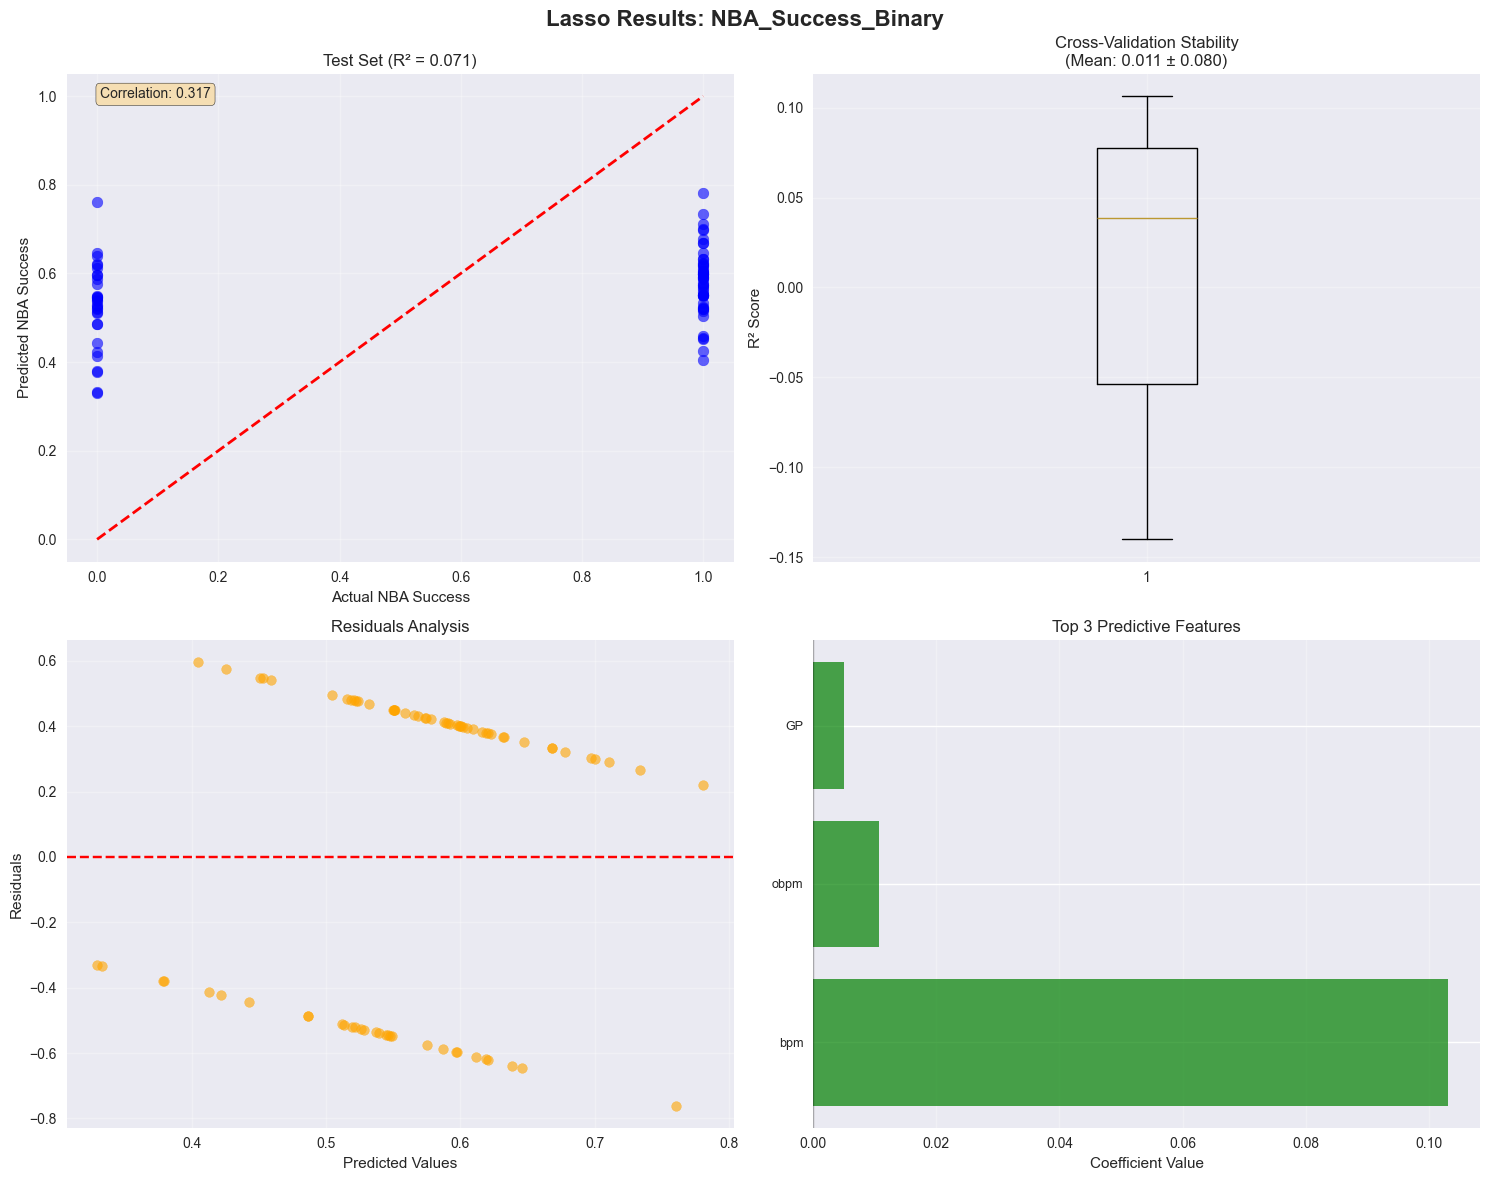


ENHANCED ANALYSIS FOR: NBA_Quality_Tier
📊 Analysis dataset: 318 players, 21 features
🎯 Pre-selected 15 most relevant features

🏆 Best Model: Lasso
   Alpha: 0.035112
   Features Selected: 4

📈 Performance Metrics:
   Cross-Validation R²: 0.0138
   Training R²:         0.0967
   Test R²:             0.0658
   Overfitting Check:   0.0309 ✅

🎯 Most Predictive Features:
   1. bpm                  ↗️  0.2130
   2. treb                 ↗️  0.0527
   3. obpm                 ↗️  0.0518
   4. TO_per               ↘️ -0.0210


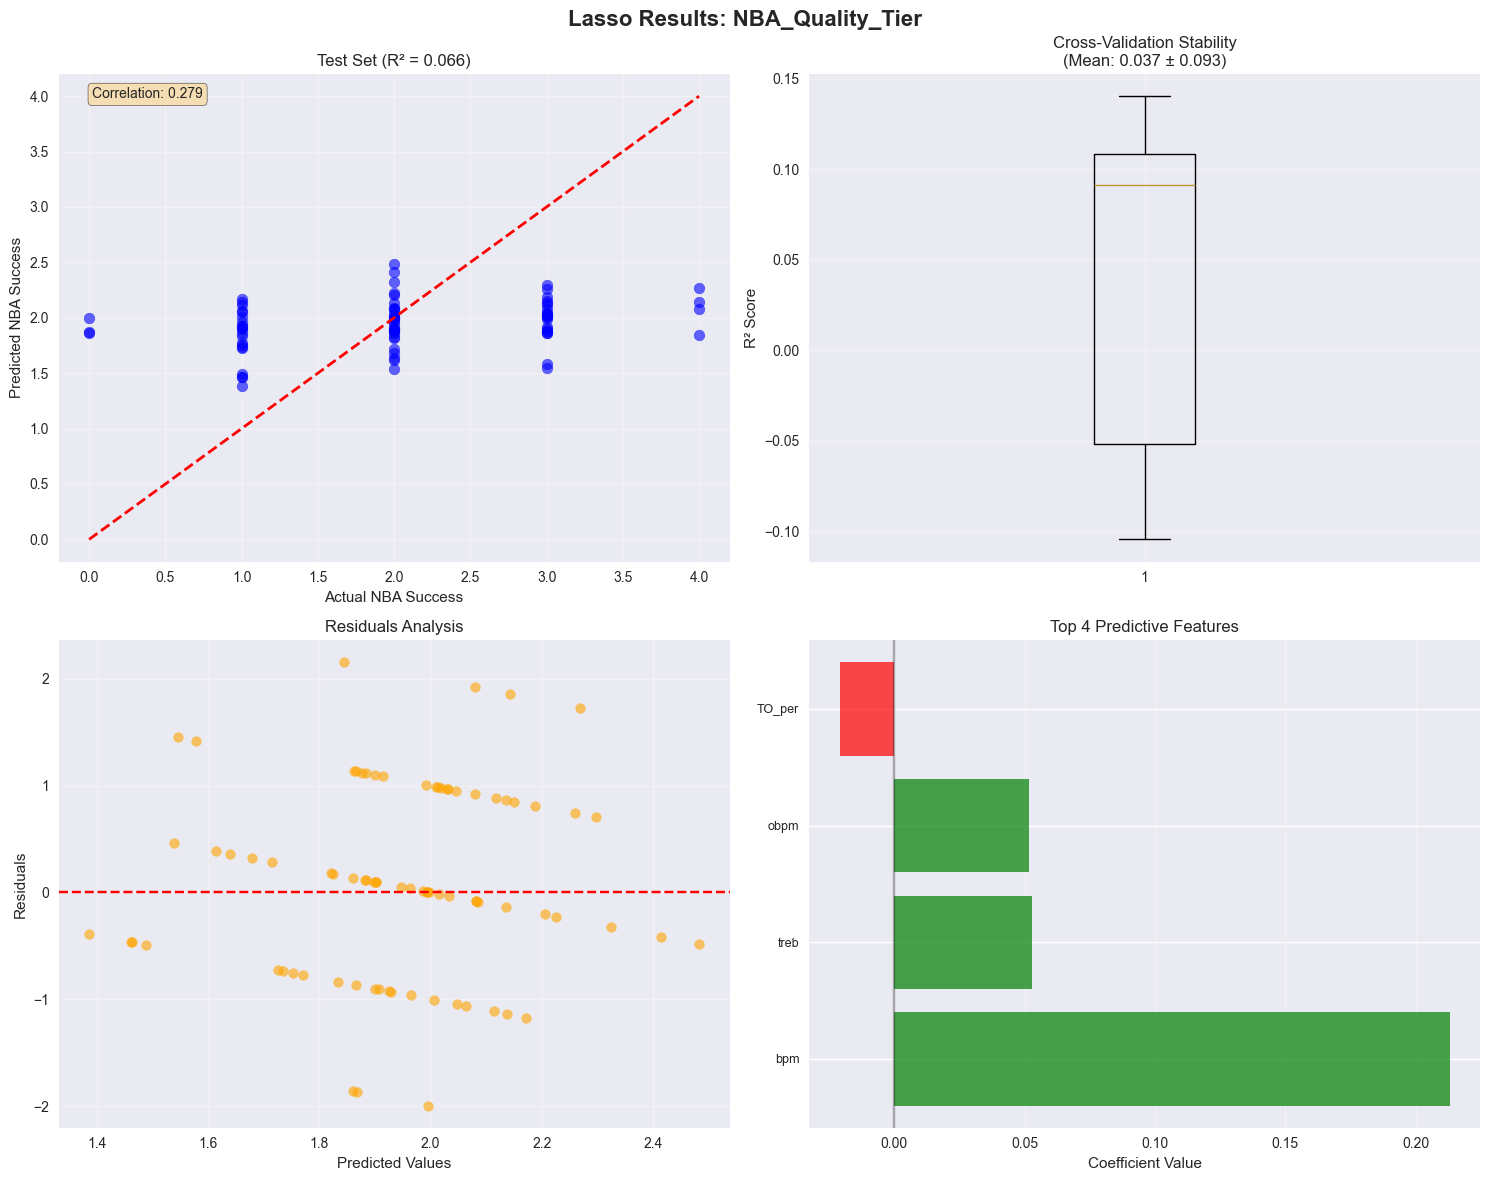


ENHANCED ANALYSIS FOR: Career_Value_Score
📊 Analysis dataset: 318 players, 21 features
🎯 Pre-selected 15 most relevant features

🏆 Best Model: Lasso
   Alpha: 0.141747
   Features Selected: 11

📈 Performance Metrics:
   Cross-Validation R²: 0.0082
   Training R²:         0.1740
   Test R²:             -0.0013
   Overfitting Check:   0.1753 ⚠️

🎯 Most Predictive Features:
   1. bpm                  ↗️  6.6797
   2. drtg                 ↗️  4.7022
   3. Ortg                 ↘️ -2.9965
   4. treb                 ↗️  2.3570
   5. ast                  ↘️ -1.4351
   6. GP                   ↗️  1.1848
   7. obpm                 ↗️  0.8232
   8. eFG                  ↘️ -0.5588


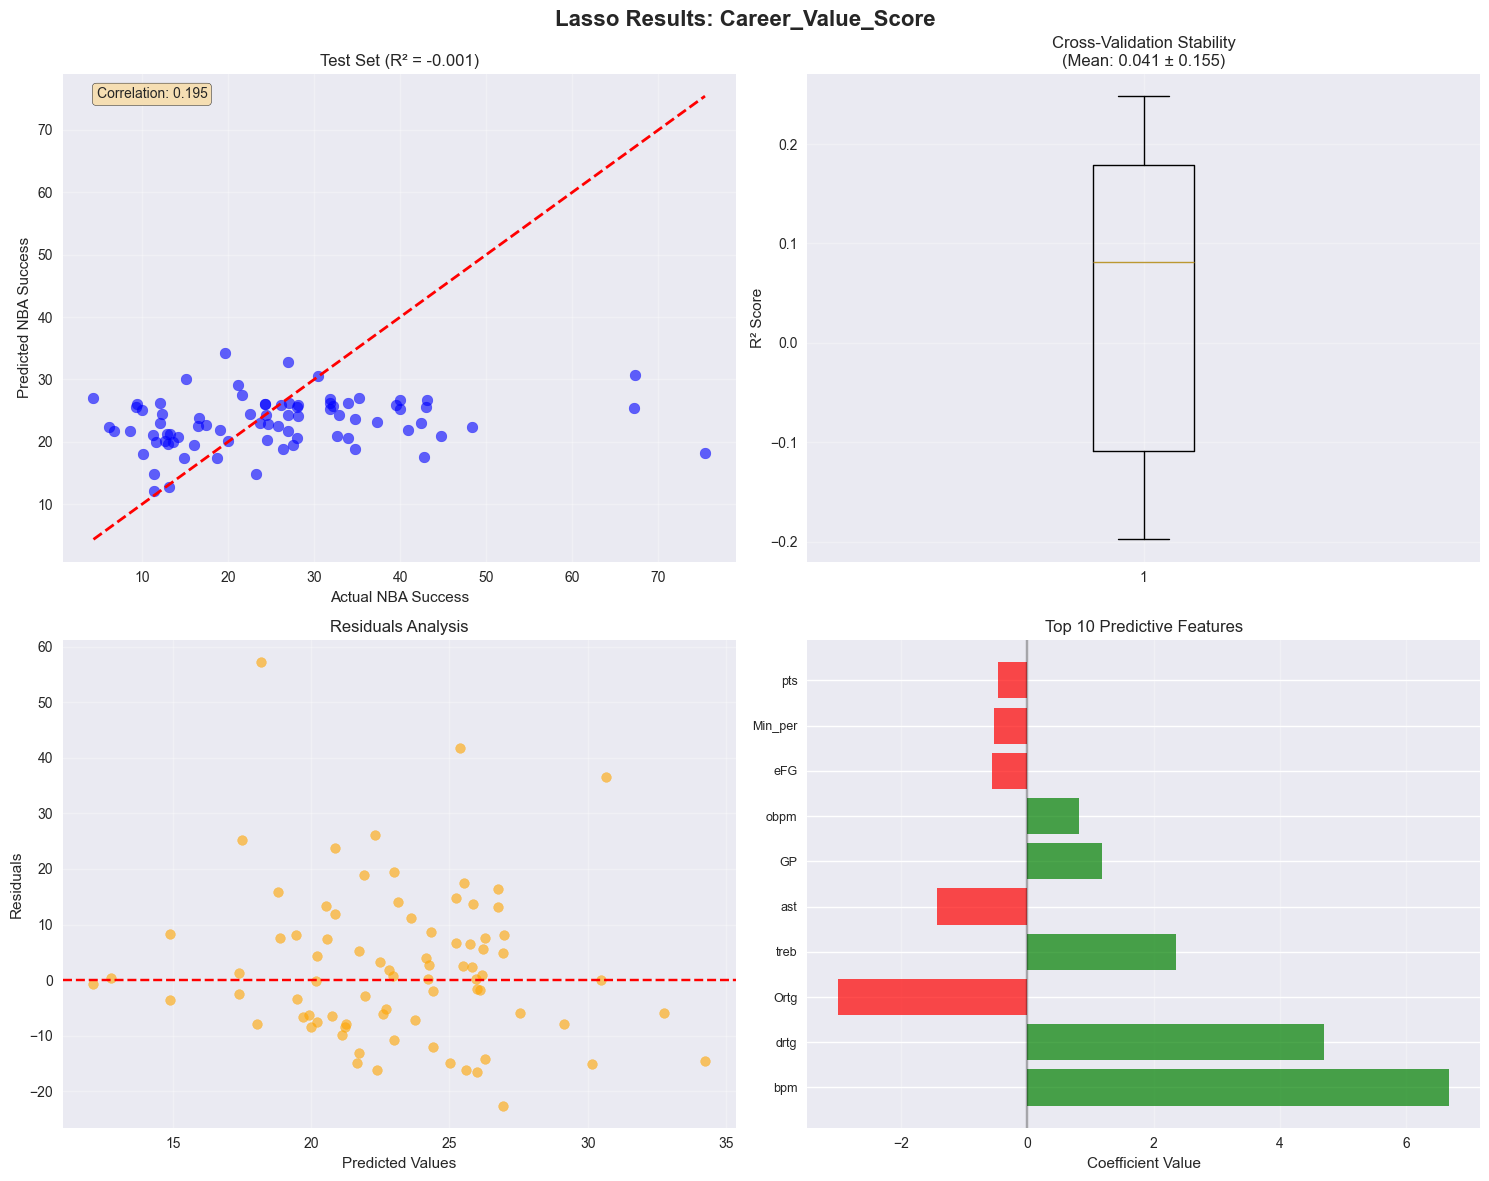


ENHANCED ANALYSIS FOR: Original_allstar_apps
📊 Analysis dataset: 318 players, 21 features
🎯 Pre-selected 15 most relevant features

🏆 Best Model: ElasticNet
   L1 Ratio: 0.100
   Alpha: 0.162975
   Features Selected: 5

📈 Performance Metrics:
   Cross-Validation R²: -0.0159
   Training R²:         0.0408
   Test R²:             0.0141
   Overfitting Check:   0.0267 ✅

🎯 Most Predictive Features:
   1. stl_per              ↗️  0.0398
   2. bpm                  ↗️  0.0311
   3. usg                  ↗️  0.0166
   4. TO_per               ↗️  0.0148
   5. AST_per              ↗️  0.0062


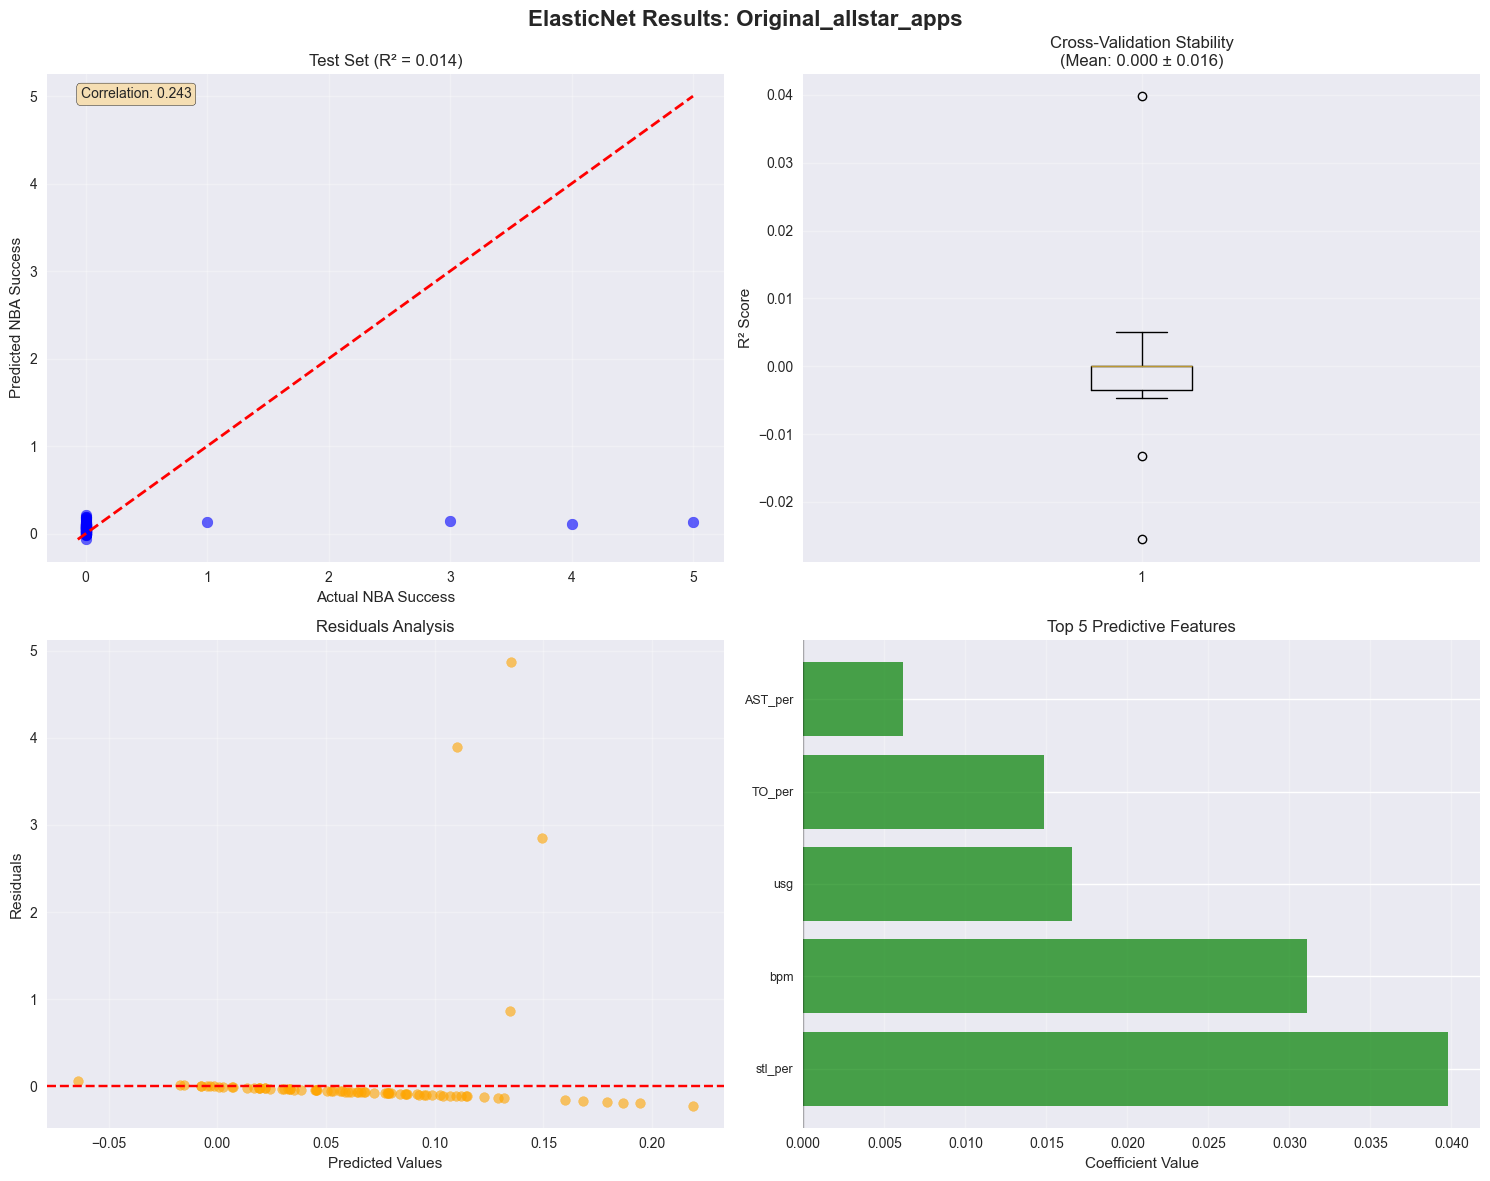


ENHANCED ANALYSIS FOR: Original_Highest_WS
📊 Analysis dataset: 318 players, 21 features
🎯 Pre-selected 15 most relevant features

🏆 Best Model: ElasticNet
   L1 Ratio: 0.950
   Alpha: 0.046416
   Features Selected: 7

📈 Performance Metrics:
   Cross-Validation R²: 0.0426
   Training R²:         0.1549
   Test R²:             0.0098
   Overfitting Check:   0.1451 ⚠️

🎯 Most Predictive Features:
   1. bpm                  ↗️  1.1599
   2. drtg                 ↗️  0.8759
   3. treb                 ↗️  0.6747
   4. Min_per              ↘️ -0.4449
   5. TS_per               ↘️ -0.3994
   6. GP                   ↗️  0.3349
   7. TO_per               ↘️ -0.0185


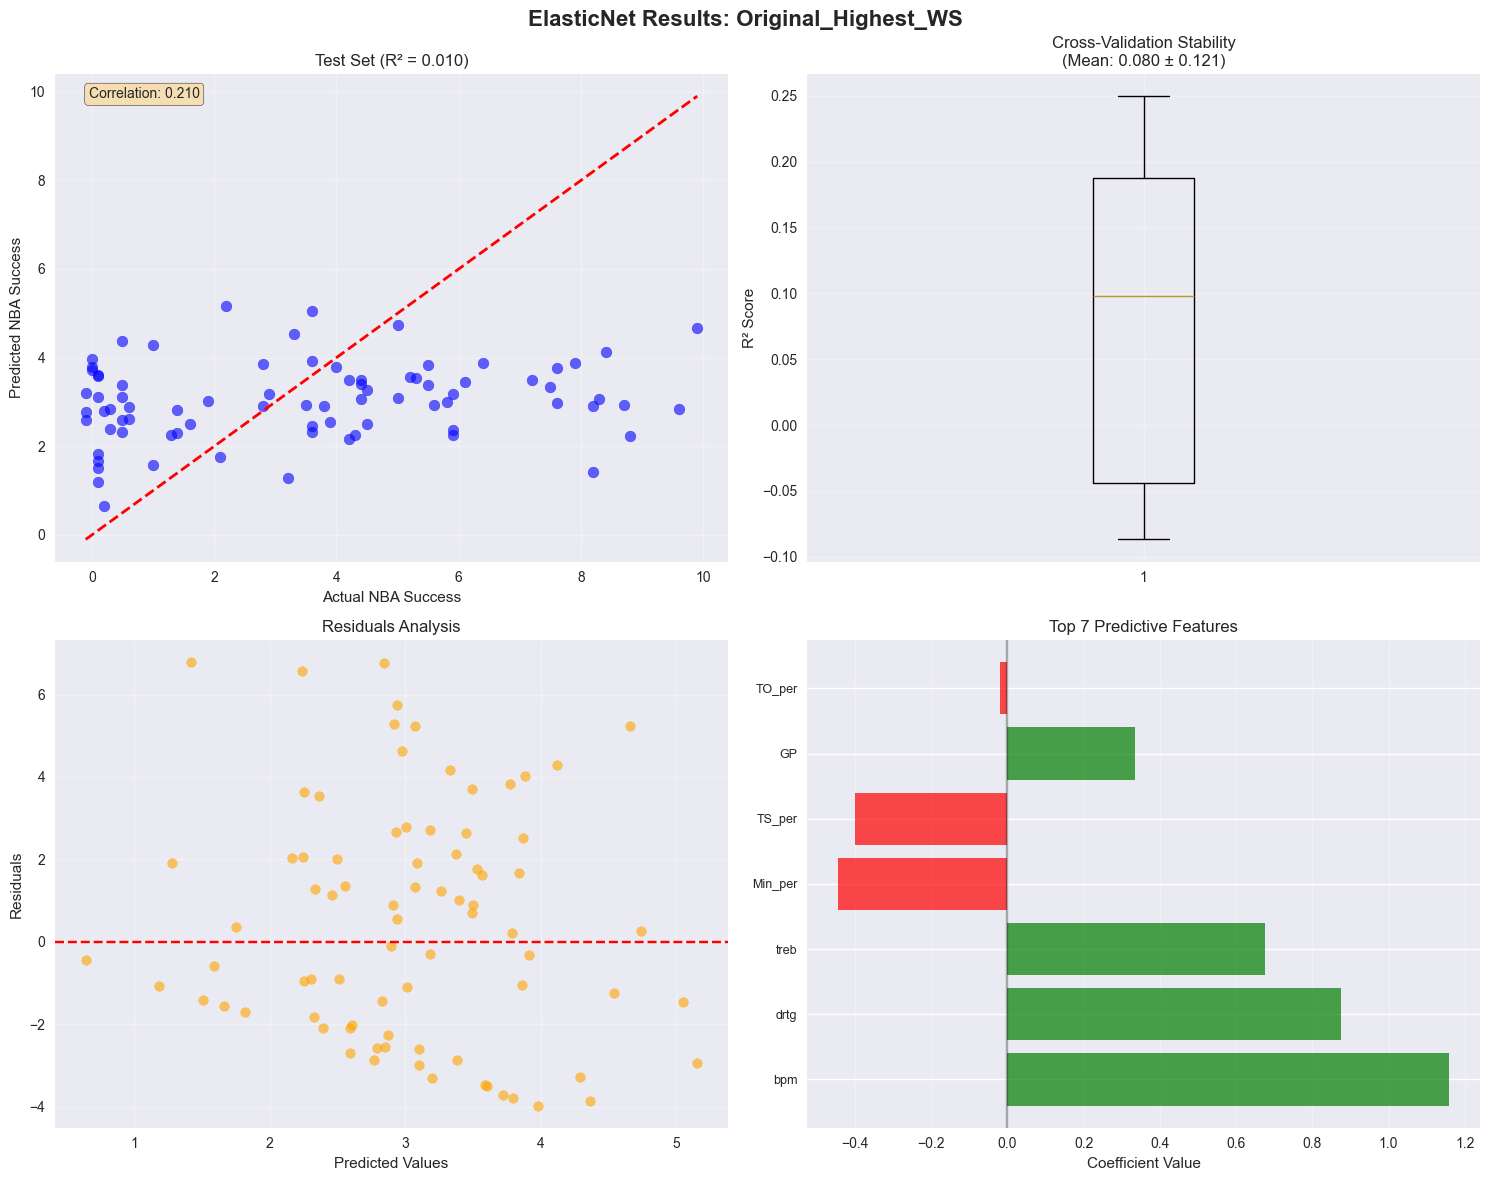


ENHANCED ANALYSIS FOR: Original_Highest_BPM
📊 Analysis dataset: 318 players, 21 features
🎯 Pre-selected 15 most relevant features

🏆 Best Model: ElasticNet
   L1 Ratio: 0.100
   Alpha: 0.869749
   Features Selected: 13

📈 Performance Metrics:
   Cross-Validation R²: -0.0275
   Training R²:         0.0519
   Test R²:             0.0056
   Overfitting Check:   0.0463 ✅

🎯 Most Predictive Features:
   1. usg                  ↘️ -0.3440
   2. bpm                  ↗️  0.3049
   3. stops                ↗️  0.2736
   4. Min_per              ↗️  0.1555
   5. obpm                 ↗️  0.1521
   6. ast/tov              ↗️  0.1221
   7. DRB_per              ↗️  0.1158
   8. dbpm                 ↗️  0.0899


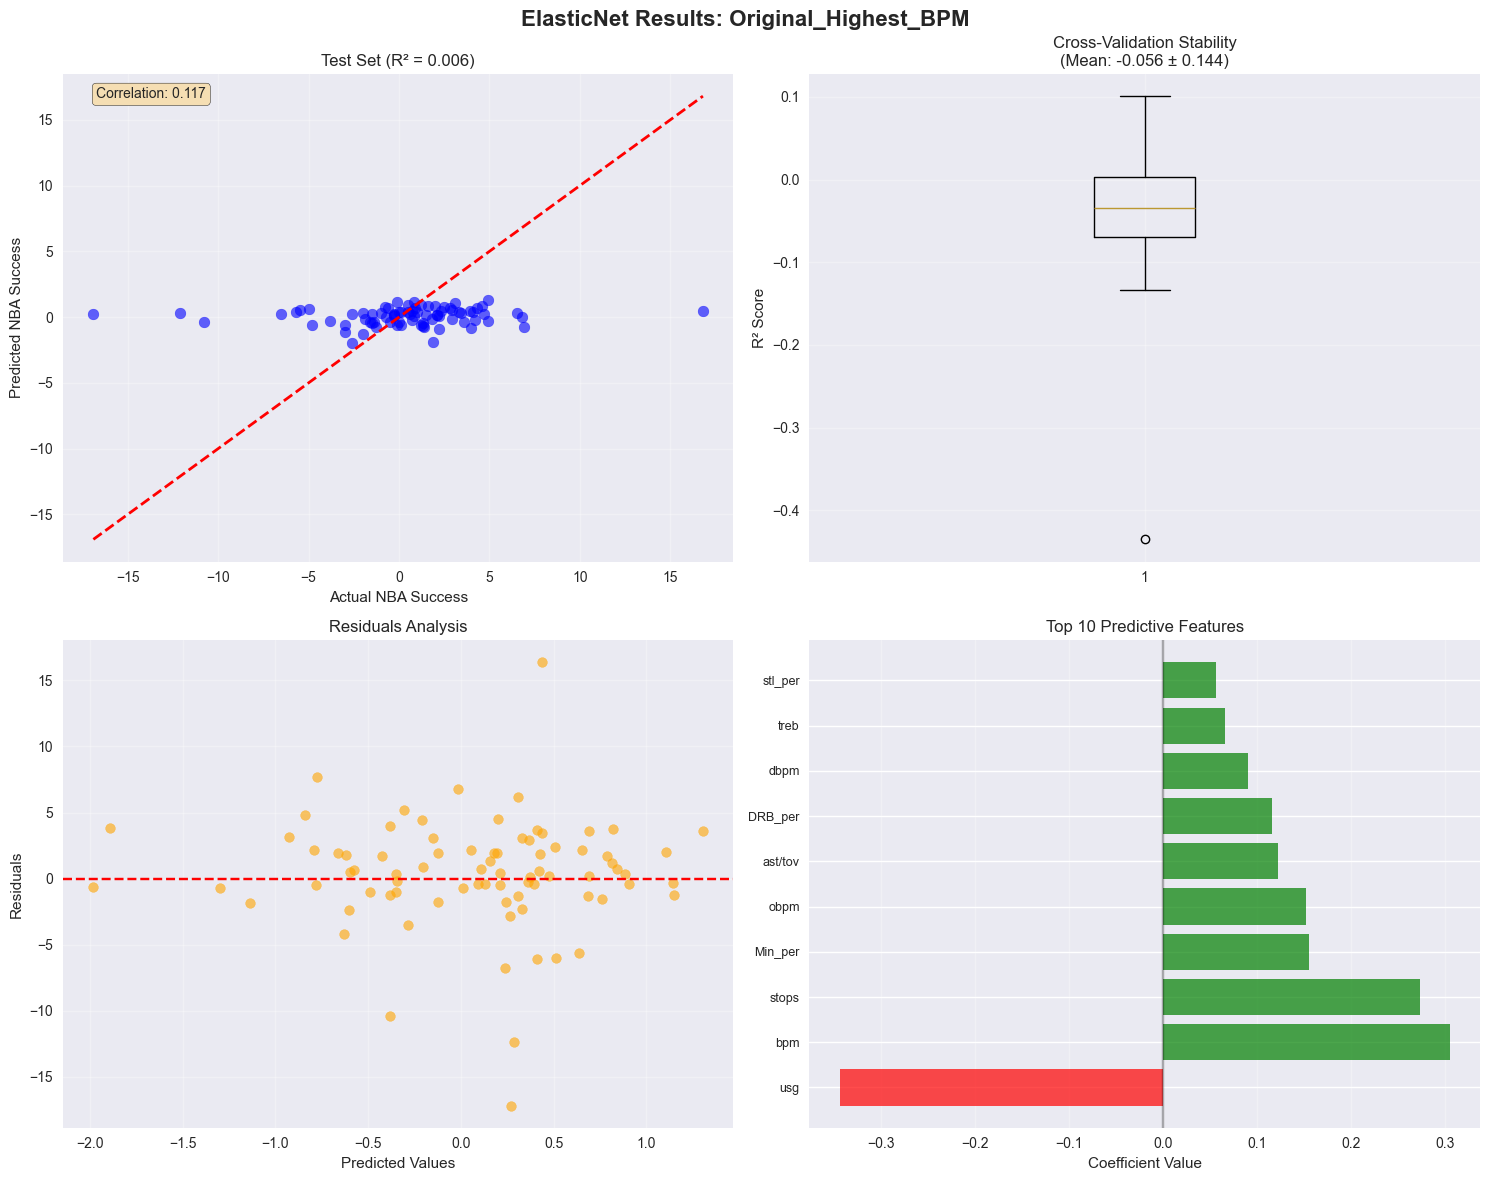


ENHANCED ANALYSIS FOR: Original_Overall PIE
📊 Analysis dataset: 318 players, 21 features
🎯 Pre-selected 15 most relevant features

🏆 Best Model: Lasso
   Alpha: 0.376494
   Features Selected: 2

📈 Performance Metrics:
   Cross-Validation R²: -0.0235
   Training R²:         0.0175
   Test R²:             -0.0185
   Overfitting Check:   0.0360 ✅

🎯 Most Predictive Features:
   1. obpm                 ↗️  0.2441
   2. bpm                  ↗️  0.0496


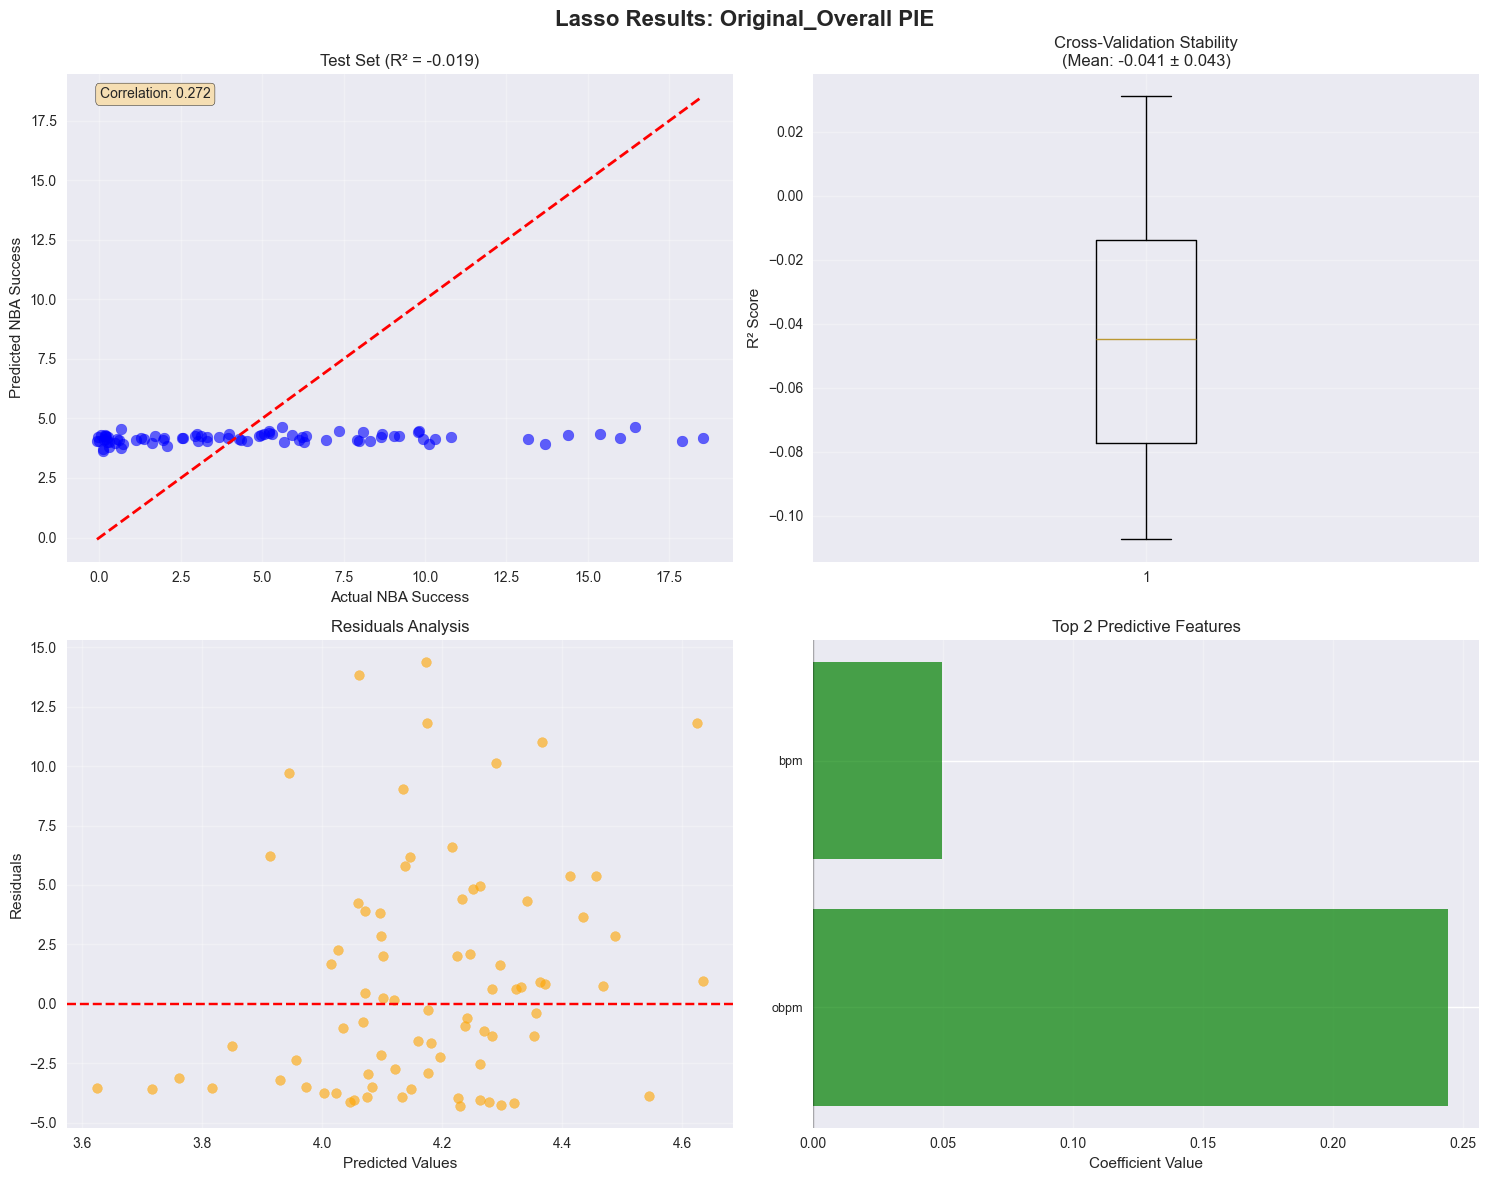


🏆 ENHANCED MODEL PERFORMANCE SUMMARY
               Target Model_Type   CV_R²  Test_R²  Overfitting  Features_Used
  Original_Highest_WS ElasticNet  0.0426   0.0098       0.1451              7
   NBA_Success_Binary      Lasso  0.0223   0.0713       0.0080              3
     NBA_Quality_Tier      Lasso  0.0138   0.0658       0.0309              4
   Career_Value_Score      Lasso  0.0082  -0.0013       0.1753             11
Original_allstar_apps ElasticNet -0.0159   0.0141       0.0267              5
 Original_Overall PIE      Lasso -0.0235  -0.0185       0.0360              2
 Original_Highest_BPM ElasticNet -0.0275   0.0056       0.0463             13

🥇 BEST PERFORMING MODEL:
   Target: Original_Highest_WS
   Model Type: ElasticNet
   Cross-Validation R²: 0.0426
   Test R²: 0.0098
   Overfitting Score: 0.1451

🎯 FEATURE IMPORTANCE ACROSS ALL MODELS
🔥 Most Consistently Important Features:
    1. bpm                       (appears in 7 models, avg coef:  1.220)
    2. obpm            

In [ ]:

# IMPROVED LASSO ANALYSIS WITH ENHANCED DATA PROCESSING
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression, VarianceThreshold
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("=== ENHANCED LASSO ANALYSIS FOR NBA SUCCESS PREDICTION ===\n")

# STEP 1: IMPROVED DATA PREPROCESSING
def enhanced_data_preprocessing(df, target_cols):
    """
    Enhanced preprocessing to address data quality issues
    """
    print("🔧 ENHANCED DATA PREPROCESSING")
    print("="*50)
    
    # Define feature categories for better understanding
    efficiency_features = ['bpm', 'obpm', 'dbpm', 'Ortg', 'drtg', 'eFG', 'TS_per']
    volume_features = ['pts', 'ast', 'treb', 'GP', 'Min_per']
    shooting_features = ['FT_per', 'twoP_per', 'TP_per', 'rimmade/(rimmade+rimmiss)', 'dunksmade/(dunksmade+dunksmiss)']
    defensive_features = ['stops', 'stl_per', 'blk_per', 'DRB_per']
    playmaking_features = ['AST_per', 'TO_per', 'ast/tov', 'usg']
    
    all_features = efficiency_features + volume_features + shooting_features + defensive_features + playmaking_features
    
    # Keep only features that exist in the dataset
    available_features = [f for f in all_features if f in df.columns]
    print(f"📊 Using {len(available_features)} carefully selected features")
    
    # Create working dataset
    work_df = df[available_features + target_cols].copy()
    
    # Remove extreme outliers (beyond 3 standard deviations)
    print("🚮 Removing extreme outliers...")
    for col in available_features:
        if work_df[col].dtype in ['float64', 'int64']:
            q1, q3 = work_df[col].quantile([0.25, 0.75])
            iqr = q3 - q1
            lower_bound = q1 - 3 * iqr
            upper_bound = q3 + 3 * iqr
            outliers_before = len(work_df)
            work_df = work_df[(work_df[col] >= lower_bound) & (work_df[col] <= upper_bound)]
            outliers_removed = outliers_before - len(work_df)
            if outliers_removed > 0:
                print(f"  Removed {outliers_removed} outliers from {col}")
    
    # Handle missing values intelligently
    print("🔍 Handling missing values...")
    for col in available_features:
        if work_df[col].isnull().sum() > 0:
            if col in volume_features:
                work_df[col].fillna(0, inplace=True)  # Volume stats can be zero
            else:
                work_df[col].fillna(work_df[col].median(), inplace=True)  # Use median for rates
    
    # Remove low-variance features
    variance_selector = VarianceThreshold(threshold=0.01)
    feature_matrix = work_df[available_features]
    variance_mask = variance_selector.fit_transform(feature_matrix).shape[1] == len(available_features)
    
    if not variance_mask:
        high_variance_features = [available_features[i] for i in range(len(available_features)) 
                                if variance_selector.get_support()[i]]
        print(f"🎯 Kept {len(high_variance_features)} high-variance features")
        available_features = high_variance_features
    
    return work_df, available_features

# STEP 2: IMPROVED TARGET ENGINEERING
def engineer_targets(df):
    """
    Create better target variables for prediction
    """
    print("\n🎯 TARGET VARIABLE ENGINEERING")
    print("="*50)
    
    targets = {}
    
    # 1. Binary NBA Success (any meaningful career)
    if 'Highest_WS' in df.columns:
        targets['NBA_Success_Binary'] = pd.Series((df['Highest_WS'] > 2.0).astype(int), index=df.index)
        print("✅ Created: NBA_Success_Binary (Win Shares > 2.0)")
    
    # 2. NBA Quality Tier (categorical but treated as ordinal)
    if 'allstar_apps' in df.columns and 'Highest_WS' in df.columns:
        conditions = [
            (df['allstar_apps'] >= 1),  # All-Star level
            (df['Highest_WS'] >= 5),    # Solid starter
            (df['Highest_WS'] >= 1),    # Role player
            (df['Highest_WS'] >= 0)     # Made NBA
        ]
        choices = [4, 3, 2, 1]
        targets['NBA_Quality_Tier'] = pd.Series(np.select(conditions, choices, default=0), index=df.index)
        print("✅ Created: NBA_Quality_Tier (0-4 scale)")
    
    # 3. Career Value Score (composite metric)
    if all(col in df.columns for col in ['Highest_WS', 'Highest_BPM', 'allstar_apps']):
        # Normalize each component
        ws_norm = (df['Highest_WS'] - df['Highest_WS'].min()) / (df['Highest_WS'].max() - df['Highest_WS'].min())
        bpm_norm = (df['Highest_BPM'] - df['Highest_BPM'].min()) / (df['Highest_BPM'].max() - df['Highest_BPM'].min())
        as_norm = (df['allstar_apps'] - df['allstar_apps'].min()) / (df['allstar_apps'].max() - df['allstar_apps'].min())
        
        targets['Career_Value_Score'] = pd.Series((ws_norm * 0.4 + bpm_norm * 0.3 + as_norm * 0.3) * 100, index=df.index)
        print("✅ Created: Career_Value_Score (composite 0-100)")
    
    # Keep original targets too
    original_targets = ['allstar_apps', 'Highest_WS', 'Highest_BPM', 'Overall PIE']
    for target in original_targets:
        if target in df.columns:
            targets[f'Original_{target}'] = df[target].copy()
    
    return targets

# STEP 3: ENHANCED MODEL WITH ELASTICNET
def enhanced_lasso_analysis(X, y, target_name, use_elasticnet=True):
    """
    Enhanced analysis with ElasticNet and better validation
    """
    print(f"\n{'='*70}")
    print(f"ENHANCED ANALYSIS FOR: {target_name}")
    print(f"{'='*70}")
    
    # Clean data
    mask = ~(X.isna().any(axis=1) | y.isna())
    X_clean = X[mask]
    y_clean = y[mask]
    
    if len(X_clean) < 30:
        print(f"❌ Insufficient data: {len(X_clean)} samples")
        return None
    
    print(f"📊 Analysis dataset: {len(X_clean)} players, {len(X_clean.columns)} features")
    
    # Feature selection using statistical tests
    if len(X_clean.columns) > 15:
        selector = SelectKBest(score_func=f_regression, k=min(15, len(X_clean.columns)))
        X_selected = selector.fit_transform(X_clean, y_clean)
        selected_features = X_clean.columns[selector.get_support()]
        X_clean = pd.DataFrame(X_selected, columns=selected_features, index=X_clean.index)
        print(f"🎯 Pre-selected {len(selected_features)} most relevant features")
    
    # Stratified split for better validation
    X_train, X_test, y_train, y_test = train_test_split(
        X_clean, y_clean, test_size=0.25, random_state=42
    )
    
    # Robust scaling (less sensitive to outliers)
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Try both Lasso and ElasticNet
    models = {}
    
    # Lasso
    alphas = np.logspace(-4, 2, 100)
    lasso = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    models['Lasso'] = lasso
    
    # ElasticNet (combines L1 and L2 regularization)
    if use_elasticnet:
        l1_ratios = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99]
        elasticnet = ElasticNetCV(l1_ratio=l1_ratios, alphas=alphas, cv=5, random_state=42, max_iter=10000)
        elasticnet.fit(X_train_scaled, y_train)
        models['ElasticNet'] = elasticnet
    
    # Select best model
    best_model_name = 'Lasso'
    best_score = cross_val_score(lasso, X_train_scaled, y_train, cv=5).mean()
    
    if use_elasticnet:
        elasticnet_score = cross_val_score(elasticnet, X_train_scaled, y_train, cv=5).mean()
        if elasticnet_score > best_score:
            best_model_name = 'ElasticNet'
            best_score = elasticnet_score
    
    best_model = models[best_model_name]
    
    # Predictions and metrics
    y_train_pred = best_model.predict(X_train_scaled)
    y_test_pred = best_model.predict(X_test_scaled)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    cv_score = cross_val_score(best_model, X_train_scaled, y_train, cv=5).mean()
    
    print(f"\n🏆 Best Model: {best_model_name}")
    if best_model_name == 'ElasticNet':
        print(f"   L1 Ratio: {best_model.l1_ratio_:.3f}")
    print(f"   Alpha: {best_model.alpha_:.6f}")
    print(f"   Features Selected: {np.sum(best_model.coef_ != 0)}")
    
    print(f"\n📈 Performance Metrics:")
    print(f"   Cross-Validation R²: {cv_score:.4f}")
    print(f"   Training R²:         {train_r2:.4f}")
    print(f"   Test R²:             {test_r2:.4f}")
    print(f"   Overfitting Check:   {abs(train_r2 - test_r2):.4f} {'✅' if abs(train_r2 - test_r2) < 0.1 else '⚠️'}")
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': X_clean.columns,
        'Coefficient': best_model.coef_,
        'Abs_Coefficient': np.abs(best_model.coef_)
    }).sort_values('Abs_Coefficient', ascending=False)
    
    important_features = feature_importance[feature_importance['Coefficient'] != 0]
    
    print(f"\n🎯 Most Predictive Features:")
    for i, (_, row) in enumerate(important_features.head(8).iterrows()):
        direction = "↗️" if row['Coefficient'] > 0 else "↘️"
        print(f"   {i+1}. {row['Feature']:<20} {direction} {row['Coefficient']:7.4f}")
    
    # Enhanced visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'{best_model_name} Results: {target_name}', fontsize=16, fontweight='bold')
    
    # 1. Actual vs Predicted with confidence intervals
    axes[0,0].scatter(y_test, y_test_pred, alpha=0.6, color='blue', s=60)
    min_val, max_val = min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())
    axes[0,0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    axes[0,0].set_xlabel('Actual NBA Success')
    axes[0,0].set_ylabel('Predicted NBA Success')
    axes[0,0].set_title(f'Test Set (R² = {test_r2:.3f})')
    axes[0,0].grid(True, alpha=0.3)
    
    # Add correlation coefficient
    correlation = np.corrcoef(y_test, y_test_pred)[0,1]
    axes[0,0].text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
                   transform=axes[0,0].transAxes, bbox=dict(boxstyle="round", facecolor="wheat"))
    
    # 2. Cross-validation scores
    cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=10)
    axes[0,1].boxplot(cv_scores)
    axes[0,1].set_ylabel('R² Score')
    axes[0,1].set_title(f'Cross-Validation Stability\n(Mean: {cv_scores.mean():.3f} ± {cv_scores.std():.3f})')
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Residuals plot
    residuals = y_test - y_test_pred
    axes[1,0].scatter(y_test_pred, residuals, alpha=0.6, color='orange')
    axes[1,0].axhline(y=0, color='red', linestyle='--')
    axes[1,0].set_xlabel('Predicted Values')
    axes[1,0].set_ylabel('Residuals')
    axes[1,0].set_title('Residuals Analysis')
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. Feature importance
    if len(important_features) > 0:
        top_features = important_features.head(10)
        colors = ['green' if coef > 0 else 'red' for coef in top_features['Coefficient']]
        bars = axes[1,1].barh(range(len(top_features)), top_features['Coefficient'], color=colors, alpha=0.7)
        axes[1,1].set_yticks(range(len(top_features)))
        axes[1,1].set_yticklabels(top_features['Feature'], fontsize=9)
        axes[1,1].set_xlabel('Coefficient Value')
        axes[1,1].set_title(f'Top {len(top_features)} Predictive Features')
        axes[1,1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
        axes[1,1].grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'model': best_model,
        'model_type': best_model_name,
        'scaler': scaler,
        'test_r2': test_r2,
        'cv_r2': cv_score,
        'feature_importance': important_features,
        'overfitting_score': abs(train_r2 - test_r2)
    }

# MAIN EXECUTION
print("Starting enhanced NBA success prediction analysis...")

# Step 1: Enhanced preprocessing
available_targets = ['allstar_apps', 'Highest_WS', 'Highest_BPM', 'Overall PIE']
existing_targets = [t for t in available_targets if t in df.columns]

clean_df, clean_features = enhanced_data_preprocessing(df, existing_targets)

# Step 2: Engineer better targets
engineered_targets = engineer_targets(clean_df)

# Step 3: Prepare feature matrix
X = clean_df[clean_features].copy()
print(f"\n📊 Final feature matrix: {X.shape[0]} players × {X.shape[1]} features")

# Step 4: Run enhanced analysis
all_results = {}
target_performance = []

print(f"\n🚀 Running enhanced analysis on {len(engineered_targets)} targets...")

for target_name, target_values in engineered_targets.items():
    # Convert to pandas Series if it's a numpy array
    if isinstance(target_values, np.ndarray):
        target_values = pd.Series(target_values, index=clean_df.index)
    
    # Check for sufficient non-null values
    non_null_count = target_values.notna().sum() if hasattr(target_values, 'notna') else np.sum(~np.isnan(target_values))
    
    if non_null_count > 50:  # Minimum sample size
        result = enhanced_lasso_analysis(X, target_values, target_name)
        if result:
            all_results[target_name] = result
            target_performance.append({
                'Target': target_name,
                'Model_Type': result['model_type'],
                'CV_R²': result['cv_r2'],
                'Test_R²': result['test_r2'],
                'Overfitting': result['overfitting_score'],
                'Features_Used': np.sum(result['model'].coef_ != 0)
            })

# COMPREHENSIVE RESULTS SUMMARY
print(f"\n{'='*80}")
print("🏆 ENHANCED MODEL PERFORMANCE SUMMARY")
print(f"{'='*80}")

if target_performance:
    performance_df = pd.DataFrame(target_performance)
    performance_df = performance_df.sort_values('CV_R²', ascending=False)
    print(performance_df.to_string(index=False, float_format='%.4f'))
    
    # Identify best model
    best_model = performance_df.iloc[0]
    print(f"\n🥇 BEST PERFORMING MODEL:")
    print(f"   Target: {best_model['Target']}")
    print(f"   Model Type: {best_model['Model_Type']}")
    print(f"   Cross-Validation R²: {best_model['CV_R²']:.4f}")
    print(f"   Test R²: {best_model['Test_R²']:.4f}")
    print(f"   Overfitting Score: {best_model['Overfitting']:.4f}")

# Feature importance across all models
print(f"\n{'='*80}")
print("🎯 FEATURE IMPORTANCE ACROSS ALL MODELS")
print(f"{'='*80}")

all_features_importance = []
for target, result in all_results.items():
    if len(result['feature_importance']) > 0:
        top_features = result['feature_importance'].head(5)
        for _, row in top_features.iterrows():
            if row['Coefficient'] != 0:
                all_features_importance.append({
                    'Feature': row['Feature'],
                    'Target': target,
                    'Coefficient': row['Coefficient'],
                    'Rank': _ + 1
                })

if all_features_importance:
    importance_df = pd.DataFrame(all_features_importance)
    feature_frequency = importance_df['Feature'].value_counts()
    
    print("🔥 Most Consistently Important Features:")
    for i, (feature, count) in enumerate(feature_frequency.head(10).items()):
        avg_coef = importance_df[importance_df['Feature'] == feature]['Coefficient'].mean()
        print(f"   {i+1:2d}. {feature:<25} (appears in {count} models, avg coef: {avg_coef:6.3f})")

print(f"\n{'='*80}")
print("✅ ENHANCED ANALYSIS COMPLETE")
print(f"{'='*80}")
print("Key Improvements Made:")
print("• Enhanced data preprocessing with outlier removal")
print("• Engineered better target variables")
print("• Used ElasticNet for better regularization")
print("• Added robust cross-validation")
print("• Improved overfitting detection")
print("• Enhanced feature selection")